In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[32,32,32,32,32,32] #liding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=16
Axis='AccX,AccY,AccZ' # Axis
PathAxis='AccXYZ'

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Optim/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [7]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 3)
(7957, 128, 3)
hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.2564 - val_loss: 0.2223
Epoch 2/50
1s - loss: 0.1957 - val_loss: 0.1695
Epoch 3/50
1s - loss: 0.1463 - val_loss: 0.1247
Epoch 4/50
1s - loss: 0.1075 - val_loss: 0.0921
Epoch 5/50
1s - loss: 0.0805 - val_loss: 0.0704
Epoch 6/50
1s - loss: 0.0629 - val_loss: 0.0565
Epoch 7/50
0s - loss: 0.0517 - val_loss: 0.0475
Epoch 8/50
0s - loss: 0.0444 - val_loss: 0.0415
Epoch 9/50
0s - loss: 0.0393 - val_loss: 0.0373
Epoch 10/50
1s - loss: 0.0357 - val_loss: 0.0342
Epoch 11/50
1s - loss: 0.0329 - val_loss: 0.0317
Epoch 12/50
1s - loss: 0.0307 - val_loss: 0.0298
Epoch 13/50
1s - loss: 0.0290 - val_loss: 0.0282
Epoch 14/50
1s - loss: 0.0275 - val_loss: 0.0269
Epoch 15/50
1s - loss: 0.0263 - val_loss: 0.0258
Epoch 16/50
1s - lo

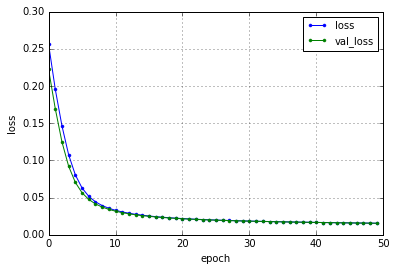

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.6066 - val_loss: 0.4427
Epoch 2/50
1s - loss: 0.3175 - val_loss: 0.2150
Epoch 3/50
1s - loss: 0.1560 - val_loss: 0.1121
Epoch 4/50
1s - loss: 0.0890 - val_loss: 0.0719
Epoch 5/50
1s - loss: 0.0625 - val_loss: 0.0552
Epoch 6/50
1s - loss: 0.0506 - val_loss: 0.0466
Epoch 7/50
0s - loss: 0.0437 - val_loss: 0.0411
Epoch 8/50
0s - loss: 0.0391 - val_loss: 0.0372
Epoch 9/50
0s - loss: 0.0357 - val_loss: 0.0342
Epoch 10/50
0s - loss: 0.0330 - val_loss: 0.0319
Epoch 11/50
0s - loss: 0.0310 - val_loss: 0.0301
Epoch 12/50
0s - loss: 0.0293 - val_loss: 0.0286
Epoch 13/50
0s - loss: 0.0279 - val_loss: 0.0273
Epoch 14/50
1s - loss: 0.0267 - val_loss: 0.0262
Epoch 15/50
1s - loss: 0.0257 - val_loss: 0.0253
Epoch 16/50
1s - loss: 0.0248 - val_loss: 0.0244
Epoch 17/50
1s - loss: 0.0241 - val_loss: 0.0237
Epoch 18/50
1s - loss: 0.0234 - val_loss: 0.0230
Epoch 19/50
1s - loss: 0.0227 - val_loss: 0.0224
Epoch 20/50
1s

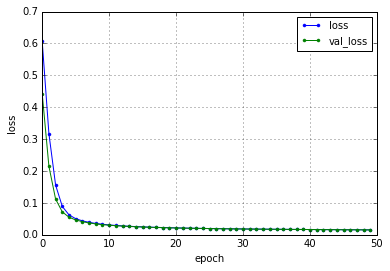

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0946 - val_loss: 0.0866
Epoch 2/50
1s - loss: 0.0810 - val_loss: 0.0761
Epoch 3/50
1s - loss: 0.0724 - val_loss: 0.0691
Epoch 4/50
1s - loss: 0.0665 - val_loss: 0.0641
Epoch 5/50
1s - loss: 0.0619 - val_loss: 0.0598
Epoch 6/50
1s - loss: 0.0577 - val_loss: 0.0556
Epoch 7/50
0s - loss: 0.0535 - val_loss: 0.0514
Epoch 8/50
0s - loss: 0.0494 - val_loss: 0.0473
Epoch 9/50
0s - loss: 0.0453 - val_loss: 0.0434
Epoch 10/50
1s - loss: 0.0415 - val_loss: 0.0397
Epoch 11/50
1s - loss: 0.0380 - val_loss: 0.0363
Epoch 12/50
1s - loss: 0.0347 - val_loss: 0.0332
Epoch 13/50
1s - loss: 0.0318 - val_loss: 0.0304
Epoch 14/50
0s - loss: 0.0292 - val_loss: 0.0280
Epoch 15/50
0s - loss: 0.0269 - val_loss: 0.0258
Epoch 16/50
0s - loss: 0.0249 - val_loss: 0.0240
Epoch 17/50
0s - loss: 0.0232 - val_loss: 0.0224
Epoch 18/50
1s - loss: 0.0217 - val_loss: 0.0210
Epoch 19/50
0s - loss: 0.0204 - val_loss: 0.0198
Epoch 20/50
0s

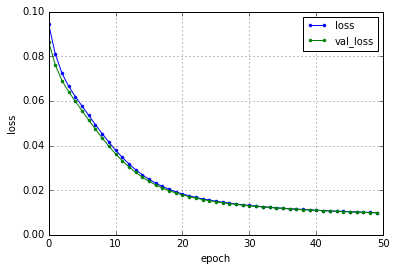

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0949 - val_loss: 0.0217
Epoch 2/50
0s - loss: 0.0166 - val_loss: 0.0135
Epoch 3/50
0s - loss: 0.0119 - val_loss: 0.0111
Epoch 4/50
0s - loss: 0.0090 - val_loss: 0.0076
Epoch 5/50
0s - loss: 0.0071 - val_loss: 0.0068
Epoch 6/50
0s - loss: 0.0061 - val_loss: 0.0061
Epoch 7/50
0s - loss: 0.0055 - val_loss: 0.0050
Epoch 8/50
0s - loss: 0.0049 - val_loss: 0.0045
Epoch 9/50
0s - loss: 0.0046 - val_loss: 0.0042
Epoch 10/50
0s - loss: 0.0043 - val_loss: 0.0039
Epoch 11/50
0s - loss: 0.0040 - val_loss: 0.0037
Epoch 12/50
0s - loss: 0.0038 - val_loss: 0.0039
Epoch 13/50
0s - loss: 0.0037 - val_loss: 0.0035
Epoch 14/50
0s - loss: 0.0036 - val_loss: 0.0035
Epoch 15/50
0s - loss: 0.0034 - val_loss: 0.0039
Epoch 16/50
0s - loss: 0.0032 - val_loss: 0.0030
Epoch 17/50
0s - loss: 0.0031 - val_loss: 0.0028
Epoch 18/50
0s - loss: 0.0030 - val_loss: 0.0026
Epoch 19/50
0s - loss: 0.0029 - val_loss: 0.0025
Epoch 20/50
0s

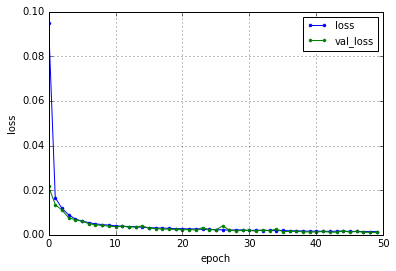

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.1851 - val_loss: 0.0282
Epoch 2/50
1s - loss: 0.0201 - val_loss: 0.0159
Epoch 3/50
1s - loss: 0.0149 - val_loss: 0.0122
Epoch 4/50
0s - loss: 0.0123 - val_loss: 0.0114
Epoch 5/50
1s - loss: 0.0095 - val_loss: 0.0072
Epoch 6/50
1s - loss: 0.0077 - val_loss: 0.0065
Epoch 7/50
1s - loss: 0.0067 - val_loss: 0.0055
Epoch 8/50
0s - loss: 0.0069 - val_loss: 0.0107
Epoch 9/50
1s - loss: 0.0064 - val_loss: 0.0063
Epoch 10/50
1s - loss: 0.0060 - val_loss: 0.0055
Epoch 11/50
1s - loss: 0.0055 - val_loss: 0.0104
Epoch 12/50
1s - loss: 0.0059 - val_loss: 0.0104
Epoch 13/50
1s - loss: 0.0056 - val_loss: 0.0044
Epoch 14/50
1s - loss: 0.0052 - val_loss: 0.0040
Epoch 15/50
1s - loss: 0.0058 - val_loss: 0.0083
Epoch 16/50
0s - loss: 0.0050 - val_loss: 0.0035
Epoch 17/50
0s - loss: 0.0046 - val_loss: 0.0052
Epoch 18/50
0s - loss: 0.0050 - val_loss: 0.0115
Epoch 19/50
0s - loss: 0.0046 - val_loss: 0.0031
Epoch 20/50
0s

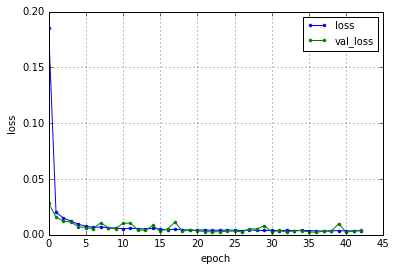

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0282 - val_loss: 0.0096
Epoch 2/50
0s - loss: 0.0078 - val_loss: 0.0064
Epoch 3/50
0s - loss: 0.0055 - val_loss: 0.0046
Epoch 4/50
0s - loss: 0.0041 - val_loss: 0.0036
Epoch 5/50
0s - loss: 0.0034 - val_loss: 0.0031
Epoch 6/50
0s - loss: 0.0030 - val_loss: 0.0028
Epoch 7/50
0s - loss: 0.0027 - val_loss: 0.0025
Epoch 8/50
0s - loss: 0.0025 - val_loss: 0.0023
Epoch 9/50
0s - loss: 0.0023 - val_loss: 0.0022
Epoch 10/50
0s - loss: 0.0021 - val_loss: 0.0022
Epoch 11/50
0s - loss: 0.0020 - val_loss: 0.0020
Epoch 12/50
0s - loss: 0.0019 - val_loss: 0.0019
Epoch 13/50
0s - loss: 0.0018 - val_loss: 0.0019
Epoch 14/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 15/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 16/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 17/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 18/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 19/50
0s - loss: 0.0015 - val_loss: 0.0017
Epoch 20/50
0s

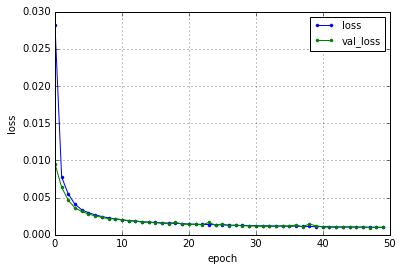

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0524 - val_loss: 0.0157
Epoch 2/50
0s - loss: 0.0133 - val_loss: 0.0110
Epoch 3/50
0s - loss: 0.0094 - val_loss: 0.0079
Epoch 4/50
0s - loss: 0.0071 - val_loss: 0.0064
Epoch 5/50
0s - loss: 0.0058 - val_loss: 0.0052
Epoch 6/50
0s - loss: 0.0048 - val_loss: 0.0043
Epoch 7/50
1s - loss: 0.0040 - val_loss: 0.0036
Epoch 8/50
1s - loss: 0.0035 - val_loss: 0.0031
Epoch 9/50
1s - loss: 0.0030 - val_loss: 0.0026
Epoch 10/50
1s - loss: 0.0026 - val_loss: 0.0022
Epoch 11/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 12/50
1s - loss: 0.0018 - val_loss: 0.0019
Epoch 13/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 14/50
1s - loss: 0.0013 - val_loss: 0.0011
Epoch 15/50
1s - loss: 0.0012 - val_loss: 9.7474e-04
Epoch 16/50
1s - loss: 9.7442e-04 - val_loss: 8.6323e-04
Epoch 17/50
1s - loss: 9.2940e-04 - val_loss: 7.9545e-04
Epoch 18/50
1s - loss: 7.8139e-04 - val_loss: 6.7885e-04
Epoch 19/50
1s - loss: 7.5373e-04 -

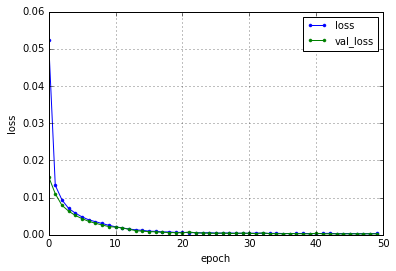

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0984 - val_loss: 0.0204
Epoch 2/50
1s - loss: 0.0171 - val_loss: 0.0149
Epoch 3/50
1s - loss: 0.0137 - val_loss: 0.0127
Epoch 4/50
1s - loss: 0.0113 - val_loss: 0.0106
Epoch 5/50
1s - loss: 0.0092 - val_loss: 0.0081
Epoch 6/50
1s - loss: 0.0072 - val_loss: 0.0063
Epoch 7/50
0s - loss: 0.0059 - val_loss: 0.0051
Epoch 8/50
0s - loss: 0.0049 - val_loss: 0.0050
Epoch 9/50
1s - loss: 0.0042 - val_loss: 0.0037
Epoch 10/50
1s - loss: 0.0035 - val_loss: 0.0033
Epoch 11/50
1s - loss: 0.0031 - val_loss: 0.0027
Epoch 12/50
1s - loss: 0.0027 - val_loss: 0.0024
Epoch 13/50
1s - loss: 0.0025 - val_loss: 0.0028
Epoch 14/50
1s - loss: 0.0021 - val_loss: 0.0019
Epoch 15/50
1s - loss: 0.0020 - val_loss: 0.0017
Epoch 16/50
1s - loss: 0.0016 - val_loss: 0.0014
Epoch 17/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 18/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 19/50
1s - loss: 0.0012 - val_loss: 0.0010
Epoch 20/50
1s

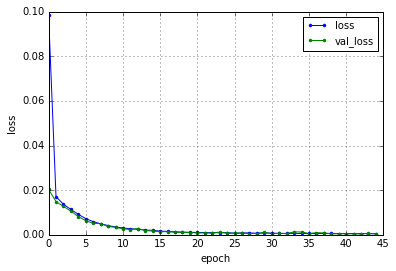

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0154 - val_loss: 0.0054
Epoch 2/50
1s - loss: 0.0041 - val_loss: 0.0033
Epoch 3/50
1s - loss: 0.0030 - val_loss: 0.0026
Epoch 4/50
1s - loss: 0.0024 - val_loss: 0.0023
Epoch 5/50
1s - loss: 0.0020 - val_loss: 0.0018
Epoch 6/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 7/50
1s - loss: 0.0015 - val_loss: 0.0015
Epoch 8/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 9/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 11/50
1s - loss: 0.0011 - val_loss: 0.0010
Epoch 12/50
1s - loss: 9.6275e-04 - val_loss: 0.0011
Epoch 13/50
1s - loss: 9.1195e-04 - val_loss: 8.3493e-04
Epoch 14/50
1s - loss: 8.5131e-04 - val_loss: 8.6961e-04
Epoch 15/50
1s - loss: 7.8656e-04 - val_loss: 7.1652e-04
Epoch 16/50
1s - loss: 7.2844e-04 - val_loss: 6.7791e-04
Epoch 17/50
1s - loss: 7.0709e-04 - val_loss: 6.5059e-04
Epoch 18/50
1s - loss: 6.5867e-04 - val_loss: 6.0326e-04
Epoch 19/50

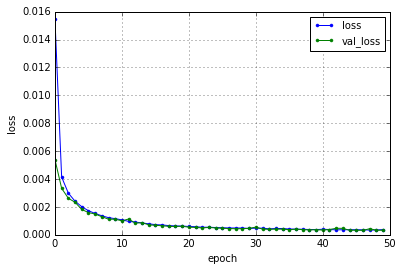

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0474 - val_loss: 0.0132
Epoch 2/50
1s - loss: 0.0105 - val_loss: 0.0083
Epoch 3/50
1s - loss: 0.0072 - val_loss: 0.0061
Epoch 4/50
1s - loss: 0.0054 - val_loss: 0.0044
Epoch 5/50
1s - loss: 0.0042 - val_loss: 0.0036
Epoch 6/50
1s - loss: 0.0034 - val_loss: 0.0029
Epoch 7/50
1s - loss: 0.0028 - val_loss: 0.0025
Epoch 8/50
0s - loss: 0.0024 - val_loss: 0.0020
Epoch 9/50
0s - loss: 0.0021 - val_loss: 0.0022
Epoch 10/50
0s - loss: 0.0018 - val_loss: 0.0015
Epoch 11/50
1s - loss: 0.0017 - val_loss: 0.0013
Epoch 12/50
1s - loss: 0.0013 - val_loss: 0.0016
Epoch 13/50
1s - loss: 0.0013 - val_loss: 0.0011
Epoch 14/50
1s - loss: 0.0011 - val_loss: 9.0602e-04
Epoch 15/50
1s - loss: 0.0012 - val_loss: 8.3294e-04
Epoch 16/50
1s - loss: 9.2374e-04 - val_loss: 7.6084e-04
Epoch 17/50
1s - loss: 8.4567e-04 - val_loss: 6.8857e-04
Epoch 18/50
1s - loss: 8.6926e-04 - val_loss: 0.0016
Epoch 19/50
1s - loss: 7.7522e-04 -

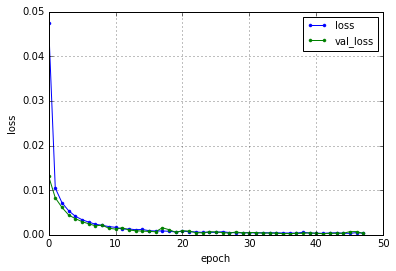

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.1126 - val_loss: 0.0188
Epoch 2/50
1s - loss: 0.0156 - val_loss: 0.0132
Epoch 3/50
1s - loss: 0.0117 - val_loss: 0.0099
Epoch 4/50
1s - loss: 0.0088 - val_loss: 0.0073
Epoch 5/50
1s - loss: 0.0068 - val_loss: 0.0068
Epoch 6/50
1s - loss: 0.0053 - val_loss: 0.0046
Epoch 7/50
1s - loss: 0.0046 - val_loss: 0.0040
Epoch 8/50
0s - loss: 0.0040 - val_loss: 0.0034
Epoch 9/50
0s - loss: 0.0035 - val_loss: 0.0031
Epoch 10/50
0s - loss: 0.0031 - val_loss: 0.0027
Epoch 11/50
0s - loss: 0.0028 - val_loss: 0.0026
Epoch 12/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 13/50
0s - loss: 0.0023 - val_loss: 0.0021
Epoch 14/50
0s - loss: 0.0024 - val_loss: 0.0025
Epoch 15/50
0s - loss: 0.0020 - val_loss: 0.0022
Epoch 16/50
0s - loss: 0.0019 - val_loss: 0.0021
Epoch 17/50
0s - loss: 0.0017 - val_loss: 0.0024
Epoch 18/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 19/50
0s - loss: 0.0017 - val_loss: 0.0015
Epoch 20/50
0s

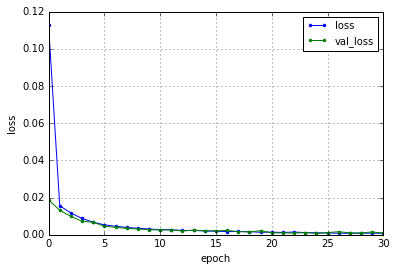

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0179 - val_loss: 0.0046
Epoch 2/50
0s - loss: 0.0034 - val_loss: 0.0027
Epoch 3/50
0s - loss: 0.0024 - val_loss: 0.0020
Epoch 4/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 5/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 6/50
0s - loss: 0.0014 - val_loss: 0.0013
Epoch 7/50
0s - loss: 0.0013 - val_loss: 0.0011
Epoch 8/50
0s - loss: 0.0012 - val_loss: 0.0010
Epoch 9/50
0s - loss: 0.0010 - val_loss: 9.5540e-04
Epoch 10/50
0s - loss: 0.0010 - val_loss: 8.8120e-04
Epoch 11/50
0s - loss: 0.0010 - val_loss: 9.7606e-04
Epoch 12/50
0s - loss: 8.3585e-04 - val_loss: 7.3446e-04
Epoch 13/50
0s - loss: 7.9018e-04 - val_loss: 8.0215e-04
Epoch 14/50
0s - loss: 7.1599e-04 - val_loss: 7.4312e-04
Epoch 15/50
0s - loss: 6.5629e-04 - val_loss: 5.8959e-04
Epoch 16/50
0s - loss: 6.5812e-04 - val_loss: 5.6039e-04
Epoch 17/50
0s - loss: 6.4297e-04 - val_loss: 5.4009e-04
Epoch 18/50
0s - loss: 5.9926e-04 - val_loss: 5.4736

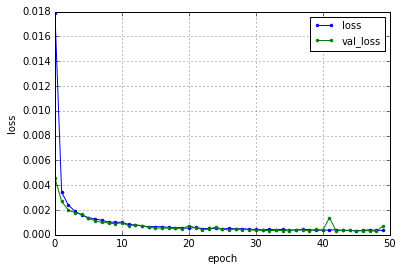

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0313 - val_loss: 0.0154
Epoch 2/50
0s - loss: 0.0117 - val_loss: 0.0097
Epoch 3/50
0s - loss: 0.0090 - val_loss: 0.0079
Epoch 4/50
0s - loss: 0.0075 - val_loss: 0.0069
Epoch 5/50
0s - loss: 0.0066 - val_loss: 0.0061
Epoch 6/50
0s - loss: 0.0060 - val_loss: 0.0060
Epoch 7/50
0s - loss: 0.0054 - val_loss: 0.0054
Epoch 8/50
0s - loss: 0.0050 - val_loss: 0.0047
Epoch 9/50
0s - loss: 0.0046 - val_loss: 0.0043
Epoch 10/50
0s - loss: 0.0043 - val_loss: 0.0044
Epoch 11/50
0s - loss: 0.0041 - val_loss: 0.0042
Epoch 12/50
0s - loss: 0.0039 - val_loss: 0.0037
Epoch 13/50
0s - loss: 0.0036 - val_loss: 0.0035
Epoch 14/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 15/50
0s - loss: 0.0033 - val_loss: 0.0032
Epoch 16/50
0s - loss: 0.0032 - val_loss: 0.0031
Epoch 17/50
0s - loss: 0.0030 - val_loss: 0.0030
Epoch 18/50
0s - loss: 0.0029 - val_loss: 0.0028
Epoch 19/50
0s - loss: 0.0028 - val_loss: 0.0027
Epoch 20/50
0s

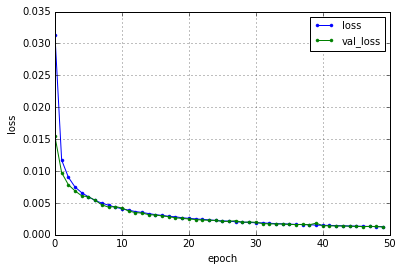

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0490 - val_loss: 0.0231
Epoch 2/50
0s - loss: 0.0149 - val_loss: 0.0127
Epoch 3/50
0s - loss: 0.0123 - val_loss: 0.0110
Epoch 4/50
0s - loss: 0.0106 - val_loss: 0.0094
Epoch 5/50
0s - loss: 0.0093 - val_loss: 0.0082
Epoch 6/50
0s - loss: 0.0082 - val_loss: 0.0075
Epoch 7/50
0s - loss: 0.0074 - val_loss: 0.0071
Epoch 8/50
0s - loss: 0.0069 - val_loss: 0.0063
Epoch 9/50
0s - loss: 0.0065 - val_loss: 0.0062
Epoch 10/50
0s - loss: 0.0060 - val_loss: 0.0057
Epoch 11/50
0s - loss: 0.0058 - val_loss: 0.0054
Epoch 12/50
0s - loss: 0.0055 - val_loss: 0.0054
Epoch 13/50
0s - loss: 0.0053 - val_loss: 0.0050
Epoch 14/50
0s - loss: 0.0050 - val_loss: 0.0052
Epoch 15/50
0s - loss: 0.0049 - val_loss: 0.0062
Epoch 16/50
0s - loss: 0.0047 - val_loss: 0.0044
Epoch 17/50
0s - loss: 0.0046 - val_loss: 0.0043
Epoch 18/50
0s - loss: 0.0045 - val_loss: 0.0041
Epoch 19/50
0s - loss: 0.0043 - val_loss: 0.0041
Epoch 20/50
0s

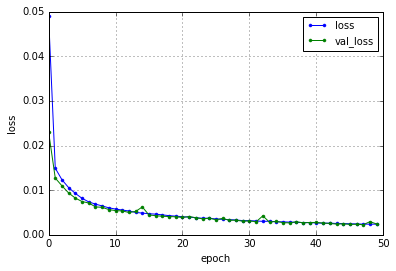

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0076 - val_loss: 0.0036
Epoch 2/50
0s - loss: 0.0031 - val_loss: 0.0025
Epoch 3/50
0s - loss: 0.0024 - val_loss: 0.0022
Epoch 4/50
0s - loss: 0.0021 - val_loss: 0.0019
Epoch 5/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 6/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 7/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 8/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 9/50
0s - loss: 0.0015 - val_loss: 0.0014
Epoch 10/50
0s - loss: 0.0014 - val_loss: 0.0014
Epoch 11/50
0s - loss: 0.0014 - val_loss: 0.0014
Epoch 12/50
0s - loss: 0.0013 - val_loss: 0.0014
Epoch 13/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 14/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 15/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 16/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 17/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 18/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 19/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 20/50
0s

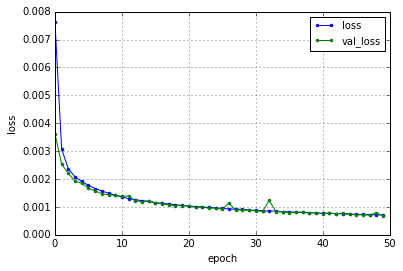

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0412 - val_loss: 0.0097
Epoch 2/50
0s - loss: 0.0088 - val_loss: 0.0092
Epoch 3/50
0s - loss: 0.0067 - val_loss: 0.0047
Epoch 4/50
0s - loss: 0.0055 - val_loss: 0.0040
Epoch 5/50
0s - loss: 0.0049 - val_loss: 0.0084
Epoch 6/50
0s - loss: 0.0043 - val_loss: 0.0026
Epoch 7/50
0s - loss: 0.0040 - val_loss: 0.0060
Epoch 8/50
0s - loss: 0.0037 - val_loss: 0.0026
Epoch 9/50
0s - loss: 0.0035 - val_loss: 0.0097
Epoch 10/50
0s - loss: 0.0033 - val_loss: 0.0022
Epoch 11/50
0s - loss: 0.0032 - val_loss: 0.0025
Epoch 12/50
0s - loss: 0.0030 - val_loss: 0.0025
Epoch 13/50
0s - loss: 0.0030 - val_loss: 0.0026
Epoch 14/50
0s - loss: 0.0028 - val_loss: 0.0049
Epoch 15/50
0s - loss: 0.0029 - val_loss: 0.0014
Epoch 16/50
0s - loss: 0.0027 - val_loss: 0.0022
Epoch 17/50
0s - loss: 0.0028 - val_loss: 0.0037
Epoch 18/50
0s - loss: 0.0027 - val_loss: 0.0021
Epoch 19/50
0s - loss: 0.0027 - val_loss: 0.0014
Epoch 20/50
0s

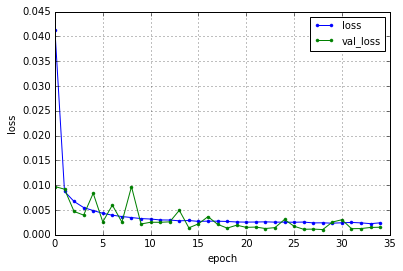

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0947 - val_loss: 0.0158
Epoch 2/50
0s - loss: 0.0128 - val_loss: 0.0079
Epoch 3/50
0s - loss: 0.0106 - val_loss: 0.0072
Epoch 4/50
1s - loss: 0.0098 - val_loss: 0.0078
Epoch 5/50
0s - loss: 0.0094 - val_loss: 0.0116
Epoch 6/50
0s - loss: 0.0094 - val_loss: 0.0101
Epoch 7/50
0s - loss: 0.0087 - val_loss: 0.0064
Epoch 8/50
1s - loss: 0.0086 - val_loss: 0.0063
Epoch 9/50
0s - loss: 0.0083 - val_loss: 0.0047
Epoch 10/50
0s - loss: 0.0080 - val_loss: 0.0052
Epoch 11/50
1s - loss: 0.0077 - val_loss: 0.0043
Epoch 12/50
0s - loss: 0.0078 - val_loss: 0.0110
Epoch 13/50
0s - loss: 0.0073 - val_loss: 0.0057
Epoch 14/50
0s - loss: 0.0075 - val_loss: 0.0062
Epoch 15/50
0s - loss: 0.0073 - val_loss: 0.0062
Epoch 16/50
0s - loss: 0.0072 - val_loss: 0.0098
Epoch 17/50
0s - loss: 0.0072 - val_loss: 0.0077


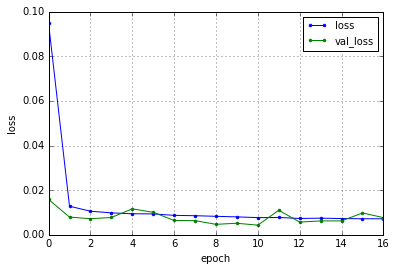

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0125 - val_loss: 0.0030
Epoch 2/50
0s - loss: 0.0027 - val_loss: 0.0023
Epoch 3/50
0s - loss: 0.0021 - val_loss: 0.0049
Epoch 4/50
0s - loss: 0.0019 - val_loss: 0.0016
Epoch 5/50
0s - loss: 0.0018 - val_loss: 0.0020
Epoch 6/50
0s - loss: 0.0017 - val_loss: 0.0012
Epoch 7/50
0s - loss: 0.0016 - val_loss: 0.0012
Epoch 8/50
0s - loss: 0.0015 - val_loss: 0.0010
Epoch 9/50
0s - loss: 0.0015 - val_loss: 0.0013
Epoch 10/50
0s - loss: 0.0014 - val_loss: 0.0016
Epoch 11/50
0s - loss: 0.0014 - val_loss: 9.9124e-04
Epoch 12/50
0s - loss: 0.0014 - val_loss: 0.0023
Epoch 13/50
0s - loss: 0.0013 - val_loss: 8.4322e-04
Epoch 14/50
0s - loss: 0.0013 - val_loss: 0.0011
Epoch 15/50
0s - loss: 0.0013 - val_loss: 0.0011
Epoch 16/50
0s - loss: 0.0013 - val_loss: 8.6613e-04
Epoch 17/50
0s - loss: 0.0012 - val_loss: 8.0027e-04
Epoch 18/50
0s - loss: 0.0012 - val_loss: 9.0869e-04
Epoch 19/50
0s - loss: 0.0012 - val_loss: 7

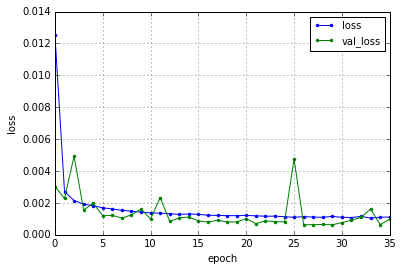

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0363 - val_loss: 0.0104
Epoch 2/50
0s - loss: 0.0095 - val_loss: 0.0063
Epoch 3/50
0s - loss: 0.0071 - val_loss: 0.0047
Epoch 4/50
0s - loss: 0.0058 - val_loss: 0.0040
Epoch 5/50
1s - loss: 0.0046 - val_loss: 0.0046
Epoch 6/50
1s - loss: 0.0039 - val_loss: 0.0024
Epoch 7/50
0s - loss: 0.0039 - val_loss: 0.0022
Epoch 8/50
0s - loss: 0.0030 - val_loss: 0.0019
Epoch 9/50
1s - loss: 0.0028 - val_loss: 0.0019
Epoch 10/50
1s - loss: 0.0026 - val_loss: 0.0020
Epoch 11/50
0s - loss: 0.0024 - val_loss: 0.0015
Epoch 12/50
1s - loss: 0.0022 - val_loss: 0.0030
Epoch 13/50
1s - loss: 0.0021 - val_loss: 0.0013
Epoch 14/50
1s - loss: 0.0020 - val_loss: 0.0011
Epoch 15/50
1s - loss: 0.0021 - val_loss: 0.0048
Epoch 16/50
0s - loss: 0.0020 - val_loss: 0.0011
Epoch 17/50
0s - loss: 0.0019 - val_loss: 0.0011
Epoch 18/50
0s - loss: 0.0019 - val_loss: 9.6158e-04
Epoch 19/50
1s - loss: 0.0016 - val_loss: 0.0012
Epoch 20/5

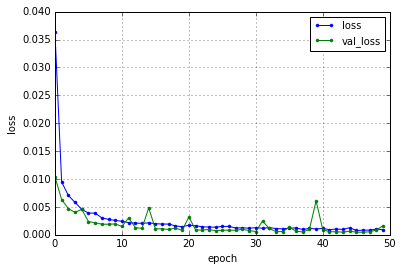

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0761 - val_loss: 0.0244
Epoch 2/50
1s - loss: 0.0162 - val_loss: 0.0107
Epoch 3/50
1s - loss: 0.0131 - val_loss: 0.0082
Epoch 4/50
1s - loss: 0.0108 - val_loss: 0.0077
Epoch 5/50
1s - loss: 0.0099 - val_loss: 0.0083
Epoch 6/50
0s - loss: 0.0093 - val_loss: 0.0108
Epoch 7/50
0s - loss: 0.0082 - val_loss: 0.0048
Epoch 8/50
0s - loss: 0.0079 - val_loss: 0.0072
Epoch 9/50
0s - loss: 0.0072 - val_loss: 0.0046
Epoch 10/50
0s - loss: 0.0072 - val_loss: 0.0039
Epoch 11/50
0s - loss: 0.0069 - val_loss: 0.0057
Epoch 12/50
0s - loss: 0.0059 - val_loss: 0.0044
Epoch 13/50
1s - loss: 0.0059 - val_loss: 0.0032
Epoch 14/50
1s - loss: 0.0055 - val_loss: 0.0030
Epoch 15/50
0s - loss: 0.0053 - val_loss: 0.0037
Epoch 16/50
0s - loss: 0.0052 - val_loss: 0.0035
Epoch 17/50
0s - loss: 0.0046 - val_loss: 0.0030
Epoch 18/50
1s - loss: 0.0046 - val_loss: 0.0035
Epoch 19/50
0s - loss: 0.0044 - val_loss: 0.0026
Epoch 20/50
1s

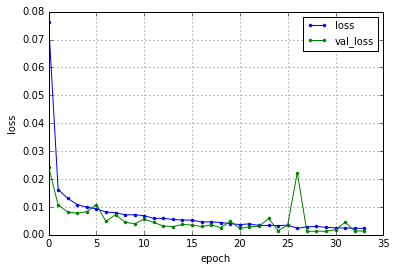

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0113 - val_loss: 0.0032
Epoch 2/50
1s - loss: 0.0029 - val_loss: 0.0021
Epoch 3/50
1s - loss: 0.0024 - val_loss: 0.0019
Epoch 4/50
1s - loss: 0.0020 - val_loss: 0.0017
Epoch 5/50
1s - loss: 0.0017 - val_loss: 0.0017
Epoch 6/50
1s - loss: 0.0017 - val_loss: 0.0013
Epoch 7/50
1s - loss: 0.0016 - val_loss: 9.9079e-04
Epoch 8/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 9/50
0s - loss: 0.0014 - val_loss: 9.9845e-04
Epoch 10/50
0s - loss: 0.0012 - val_loss: 0.0010
Epoch 11/50
0s - loss: 0.0012 - val_loss: 9.2747e-04
Epoch 12/50
0s - loss: 0.0012 - val_loss: 9.4212e-04
Epoch 13/50
1s - loss: 0.0011 - val_loss: 7.6801e-04
Epoch 14/50
1s - loss: 9.3552e-04 - val_loss: 8.9186e-04
Epoch 15/50
1s - loss: 0.0011 - val_loss: 9.0929e-04
Epoch 16/50
1s - loss: 9.7803e-04 - val_loss: 9.1719e-04
Epoch 17/50
1s - loss: 0.0010 - val_loss: 6.9912e-04
Epoch 18/50
1s - loss: 8.8224e-04 - val_loss: 9.1705e-04
Epoch 19/50

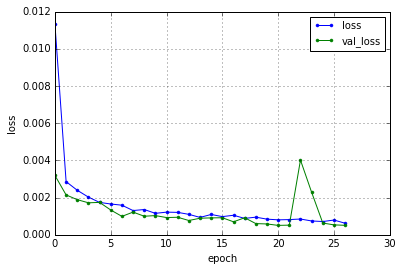

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =7953
SourceData's aborting data = 22
window shape is (7953, 256, 3)
(7953, 256, 3)
hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.3054 - val_loss: 0.2815
Epoch 2/50
0s - loss: 0.2630 - val_loss: 0.2443
Epoch 3/50
0s - loss: 0.2259 - val_loss: 0.2074
Epoch 4/50
0s - loss: 0.1900 - val_loss: 0.1732
Epoch 5/50
0s - loss: 0.1582 - val_loss: 0.1440
Epoch 6/50
0s - loss: 0.1319 - val_loss: 0.1205
Epoch 7/50
0s - loss: 0.1110 - val_loss: 0.1022
Epoch 8/50
0s - loss: 0.0949 - val_loss: 0.0882
Epoch 9/50
0s - loss: 0.0827 - val_loss: 0.0775
Epoch 10/50
0s - loss: 0.0733 - val_loss: 0.0693
Epoch 11/50
0s - loss: 0.0660 - val_loss: 0.0629
Epoch 12/50
0s - loss: 0.0603 - val_loss: 0.0578
Epoch 13/50
0s - loss: 0.0556 - val_loss: 0.0536
Epoch 14/50
0s - loss: 0.0518 - val_loss: 0.0501
Epoch 15/50
0s - loss: 0.0486 - val_loss: 0.0471
Epoch 16/50
0s - lo

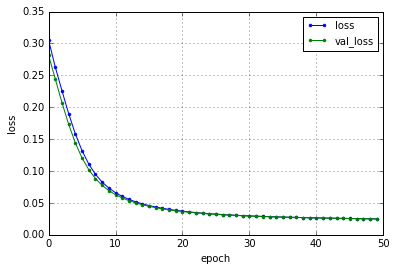

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.7053 - val_loss: 0.5894
Epoch 2/50
0s - loss: 0.4919 - val_loss: 0.3999
Epoch 3/50
0s - loss: 0.3277 - val_loss: 0.2646
Epoch 4/50
0s - loss: 0.2195 - val_loss: 0.1810
Epoch 5/50
0s - loss: 0.1542 - val_loss: 0.1315
Epoch 6/50
0s - loss: 0.1155 - val_loss: 0.1019
Epoch 7/50
0s - loss: 0.0921 - val_loss: 0.0835
Epoch 8/50
0s - loss: 0.0771 - val_loss: 0.0714
Epoch 9/50
0s - loss: 0.0669 - val_loss: 0.0629
Epoch 10/50
0s - loss: 0.0597 - val_loss: 0.0567
Epoch 11/50
0s - loss: 0.0543 - val_loss: 0.0521
Epoch 12/50
0s - loss: 0.0503 - val_loss: 0.0486
Epoch 13/50
0s - loss: 0.0472 - val_loss: 0.0459
Epoch 14/50
0s - loss: 0.0447 - val_loss: 0.0436
Epoch 15/50
0s - loss: 0.0427 - val_loss: 0.0418
Epoch 16/50
0s - loss: 0.0410 - val_loss: 0.0402
Epoch 17/50
0s - loss: 0.0395 - val_loss: 0.0389
Epoch 18/50
0s - loss: 0.0383 - val_loss: 0.0377
Epoch 19/50
0s - loss: 0.0372 - val_loss: 0.0367
Epoch 20/50
0s

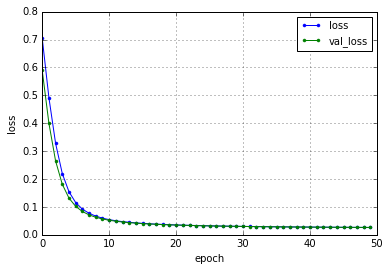

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0854 - val_loss: 0.0827
Epoch 2/50
0s - loss: 0.0807 - val_loss: 0.0789
Epoch 3/50
0s - loss: 0.0775 - val_loss: 0.0761
Epoch 4/50
0s - loss: 0.0748 - val_loss: 0.0736
Epoch 5/50
0s - loss: 0.0725 - val_loss: 0.0713
Epoch 6/50
0s - loss: 0.0701 - val_loss: 0.0688
Epoch 7/50
0s - loss: 0.0676 - val_loss: 0.0663
Epoch 8/50
0s - loss: 0.0649 - val_loss: 0.0635
Epoch 9/50
0s - loss: 0.0620 - val_loss: 0.0605
Epoch 10/50
0s - loss: 0.0590 - val_loss: 0.0575
Epoch 11/50
0s - loss: 0.0559 - val_loss: 0.0543
Epoch 12/50
0s - loss: 0.0528 - val_loss: 0.0512
Epoch 13/50
0s - loss: 0.0497 - val_loss: 0.0482
Epoch 14/50
0s - loss: 0.0467 - val_loss: 0.0452
Epoch 15/50
0s - loss: 0.0438 - val_loss: 0.0425
Epoch 16/50
0s - loss: 0.0412 - val_loss: 0.0399
Epoch 17/50
0s - loss: 0.0387 - val_loss: 0.0375
Epoch 18/50
0s - loss: 0.0364 - val_loss: 0.0353
Epoch 19/50
0s - loss: 0.0343 - val_loss: 0.0334
Epoch 20/50
0s

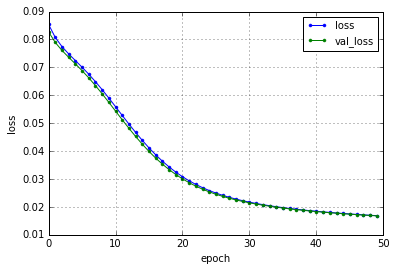

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0754 - val_loss: 0.0262
Epoch 2/50
0s - loss: 0.0224 - val_loss: 0.0201
Epoch 3/50
0s - loss: 0.0177 - val_loss: 0.0154
Epoch 4/50
0s - loss: 0.0141 - val_loss: 0.0125
Epoch 5/50
0s - loss: 0.0122 - val_loss: 0.0109
Epoch 6/50
0s - loss: 0.0112 - val_loss: 0.0112
Epoch 7/50
0s - loss: 0.0102 - val_loss: 0.0092
Epoch 8/50
0s - loss: 0.0095 - val_loss: 0.0086
Epoch 9/50
0s - loss: 0.0089 - val_loss: 0.0097
Epoch 10/50
0s - loss: 0.0087 - val_loss: 0.0080
Epoch 11/50
0s - loss: 0.0081 - val_loss: 0.0077
Epoch 12/50
0s - loss: 0.0077 - val_loss: 0.0090
Epoch 13/50
0s - loss: 0.0074 - val_loss: 0.0069
Epoch 14/50
0s - loss: 0.0069 - val_loss: 0.0063
Epoch 15/50
0s - loss: 0.0068 - val_loss: 0.0061
Epoch 16/50
0s - loss: 0.0069 - val_loss: 0.0062
Epoch 17/50
0s - loss: 0.0063 - val_loss: 0.0056
Epoch 18/50
0s - loss: 0.0064 - val_loss: 0.0066
Epoch 19/50
0s - loss: 0.0062 - val_loss: 0.0112
Epoch 20/50
0s

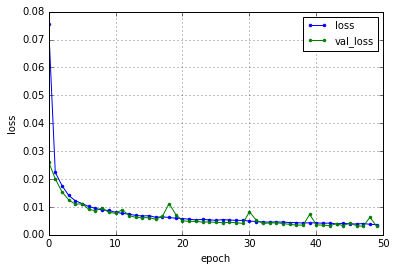

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.1779 - val_loss: 0.0344
Epoch 2/50
0s - loss: 0.0294 - val_loss: 0.0251
Epoch 3/50
0s - loss: 0.0266 - val_loss: 0.0229
Epoch 4/50
0s - loss: 0.0236 - val_loss: 0.0260
Epoch 5/50
0s - loss: 0.0191 - val_loss: 0.0165
Epoch 6/50
0s - loss: 0.0161 - val_loss: 0.0156
Epoch 7/50
0s - loss: 0.0146 - val_loss: 0.0114
Epoch 8/50
0s - loss: 0.0132 - val_loss: 0.0117
Epoch 9/50
0s - loss: 0.0117 - val_loss: 0.0092
Epoch 10/50
0s - loss: 0.0116 - val_loss: 0.0099
Epoch 11/50
0s - loss: 0.0109 - val_loss: 0.0133
Epoch 12/50
0s - loss: 0.0098 - val_loss: 0.0075
Epoch 13/50
0s - loss: 0.0103 - val_loss: 0.0158
Epoch 14/50
0s - loss: 0.0102 - val_loss: 0.0071
Epoch 15/50
0s - loss: 0.0097 - val_loss: 0.0087
Epoch 16/50
0s - loss: 0.0094 - val_loss: 0.0102
Epoch 17/50
0s - loss: 0.0095 - val_loss: 0.0115
Epoch 18/50
0s - loss: 0.0091 - val_loss: 0.0119
Epoch 19/50
0s - loss: 0.0092 - val_loss: 0.0066
Epoch 20/50
0s

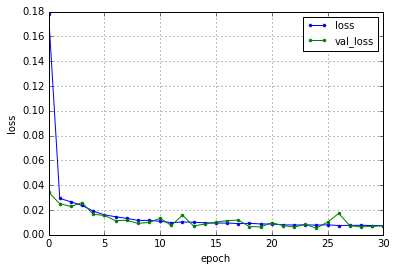

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0351 - val_loss: 0.0150
Epoch 2/50
0s - loss: 0.0123 - val_loss: 0.0102
Epoch 3/50
0s - loss: 0.0088 - val_loss: 0.0076
Epoch 4/50
0s - loss: 0.0069 - val_loss: 0.0063
Epoch 5/50
0s - loss: 0.0059 - val_loss: 0.0058
Epoch 6/50
0s - loss: 0.0053 - val_loss: 0.0050
Epoch 7/50
0s - loss: 0.0048 - val_loss: 0.0050
Epoch 8/50
0s - loss: 0.0044 - val_loss: 0.0043
Epoch 9/50
0s - loss: 0.0041 - val_loss: 0.0040
Epoch 10/50
0s - loss: 0.0039 - val_loss: 0.0037
Epoch 11/50
0s - loss: 0.0037 - val_loss: 0.0036
Epoch 12/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 13/50
0s - loss: 0.0034 - val_loss: 0.0032
Epoch 14/50
0s - loss: 0.0032 - val_loss: 0.0031
Epoch 15/50
0s - loss: 0.0031 - val_loss: 0.0031
Epoch 16/50
0s - loss: 0.0030 - val_loss: 0.0030
Epoch 17/50
0s - loss: 0.0029 - val_loss: 0.0031
Epoch 18/50
0s - loss: 0.0028 - val_loss: 0.0033
Epoch 19/50
0s - loss: 0.0028 - val_loss: 0.0028
Epoch 20/50
0s

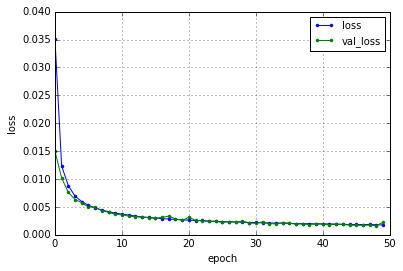

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0505 - val_loss: 0.0204
Epoch 2/50
0s - loss: 0.0171 - val_loss: 0.0145
Epoch 3/50
0s - loss: 0.0127 - val_loss: 0.0123
Epoch 4/50
0s - loss: 0.0099 - val_loss: 0.0086
Epoch 5/50
0s - loss: 0.0081 - val_loss: 0.0074
Epoch 6/50
0s - loss: 0.0069 - val_loss: 0.0065
Epoch 7/50
0s - loss: 0.0059 - val_loss: 0.0054
Epoch 8/50
0s - loss: 0.0054 - val_loss: 0.0056
Epoch 9/50
0s - loss: 0.0047 - val_loss: 0.0044
Epoch 10/50
0s - loss: 0.0042 - val_loss: 0.0038
Epoch 11/50
0s - loss: 0.0036 - val_loss: 0.0037
Epoch 12/50
0s - loss: 0.0034 - val_loss: 0.0029
Epoch 13/50
0s - loss: 0.0029 - val_loss: 0.0040
Epoch 14/50
0s - loss: 0.0028 - val_loss: 0.0026
Epoch 15/50
0s - loss: 0.0024 - val_loss: 0.0021
Epoch 16/50
0s - loss: 0.0023 - val_loss: 0.0019
Epoch 17/50
0s - loss: 0.0021 - val_loss: 0.0018
Epoch 18/50
0s - loss: 0.0018 - val_loss: 0.0016
Epoch 19/50
0s - loss: 0.0017 - val_loss: 0.0015
Epoch 20/50
0s

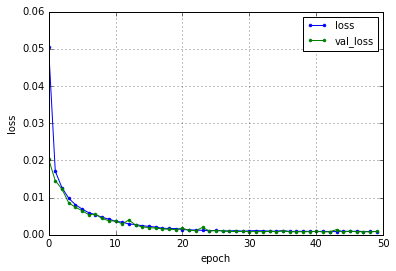

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0933 - val_loss: 0.0270
Epoch 2/50
0s - loss: 0.0245 - val_loss: 0.0222
Epoch 3/50
0s - loss: 0.0201 - val_loss: 0.0175
Epoch 4/50
0s - loss: 0.0153 - val_loss: 0.0157
Epoch 5/50
0s - loss: 0.0119 - val_loss: 0.0104
Epoch 6/50
0s - loss: 0.0095 - val_loss: 0.0084
Epoch 7/50
0s - loss: 0.0079 - val_loss: 0.0069
Epoch 8/50
0s - loss: 0.0067 - val_loss: 0.0063
Epoch 9/50
0s - loss: 0.0060 - val_loss: 0.0053
Epoch 10/50
0s - loss: 0.0053 - val_loss: 0.0046
Epoch 11/50
0s - loss: 0.0044 - val_loss: 0.0047
Epoch 12/50
0s - loss: 0.0039 - val_loss: 0.0033
Epoch 13/50
0s - loss: 0.0035 - val_loss: 0.0031
Epoch 14/50
0s - loss: 0.0029 - val_loss: 0.0040
Epoch 15/50
0s - loss: 0.0027 - val_loss: 0.0023
Epoch 16/50
0s - loss: 0.0024 - val_loss: 0.0024
Epoch 17/50
0s - loss: 0.0023 - val_loss: 0.0019
Epoch 18/50
0s - loss: 0.0021 - val_loss: 0.0018
Epoch 19/50
0s - loss: 0.0019 - val_loss: 0.0016
Epoch 20/50
0s

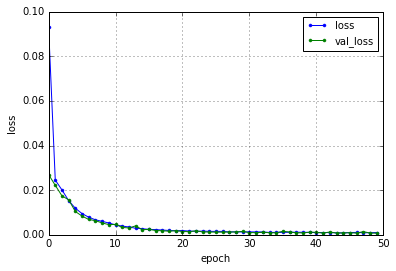

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0170 - val_loss: 0.0068
Epoch 2/50
0s - loss: 0.0056 - val_loss: 0.0044
Epoch 3/50
0s - loss: 0.0039 - val_loss: 0.0035
Epoch 4/50
0s - loss: 0.0032 - val_loss: 0.0030
Epoch 5/50
0s - loss: 0.0027 - val_loss: 0.0024
Epoch 6/50
0s - loss: 0.0023 - val_loss: 0.0021
Epoch 7/50
0s - loss: 0.0021 - val_loss: 0.0019
Epoch 8/50
0s - loss: 0.0019 - val_loss: 0.0019
Epoch 9/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 10/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 11/50
0s - loss: 0.0015 - val_loss: 0.0017
Epoch 12/50
0s - loss: 0.0014 - val_loss: 0.0013
Epoch 13/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 14/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 15/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 16/50
0s - loss: 0.0013 - val_loss: 0.0015
Epoch 17/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 18/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 19/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 20/50
0s

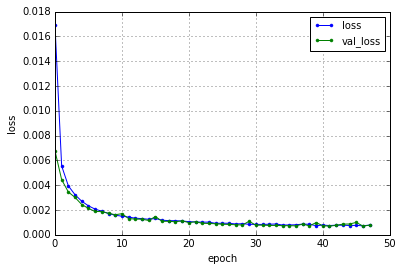

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0566 - val_loss: 0.0191
Epoch 2/50
0s - loss: 0.0147 - val_loss: 0.0114
Epoch 3/50
0s - loss: 0.0103 - val_loss: 0.0100
Epoch 4/50
0s - loss: 0.0081 - val_loss: 0.0074
Epoch 5/50
0s - loss: 0.0069 - val_loss: 0.0061
Epoch 6/50
0s - loss: 0.0060 - val_loss: 0.0065
Epoch 7/50
0s - loss: 0.0050 - val_loss: 0.0047
Epoch 8/50
0s - loss: 0.0043 - val_loss: 0.0038
Epoch 9/50
0s - loss: 0.0037 - val_loss: 0.0039
Epoch 10/50
0s - loss: 0.0035 - val_loss: 0.0032
Epoch 11/50
0s - loss: 0.0033 - val_loss: 0.0027
Epoch 12/50
0s - loss: 0.0028 - val_loss: 0.0026
Epoch 13/50
0s - loss: 0.0027 - val_loss: 0.0022
Epoch 14/50
0s - loss: 0.0023 - val_loss: 0.0024
Epoch 15/50
0s - loss: 0.0022 - val_loss: 0.0028
Epoch 16/50
0s - loss: 0.0020 - val_loss: 0.0017
Epoch 17/50
0s - loss: 0.0018 - val_loss: 0.0016
Epoch 18/50
0s - loss: 0.0018 - val_loss: 0.0015
Epoch 19/50
0s - loss: 0.0016 - val_loss: 0.0014
Epoch 20/50
0s

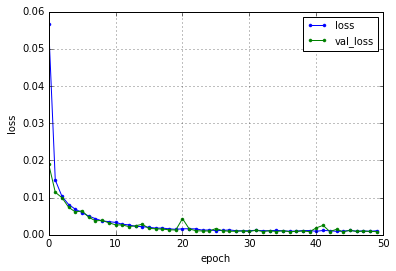

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.1214 - val_loss: 0.0265
Epoch 2/50
0s - loss: 0.0229 - val_loss: 0.0224
Epoch 3/50
0s - loss: 0.0168 - val_loss: 0.0138
Epoch 4/50
0s - loss: 0.0117 - val_loss: 0.0102
Epoch 5/50
0s - loss: 0.0091 - val_loss: 0.0082
Epoch 6/50
0s - loss: 0.0073 - val_loss: 0.0066
Epoch 7/50
0s - loss: 0.0065 - val_loss: 0.0056
Epoch 8/50
0s - loss: 0.0057 - val_loss: 0.0052
Epoch 9/50
0s - loss: 0.0054 - val_loss: 0.0043
Epoch 10/50
0s - loss: 0.0046 - val_loss: 0.0040
Epoch 11/50
0s - loss: 0.0041 - val_loss: 0.0044
Epoch 12/50
0s - loss: 0.0041 - val_loss: 0.0033
Epoch 13/50
0s - loss: 0.0034 - val_loss: 0.0030
Epoch 14/50
0s - loss: 0.0031 - val_loss: 0.0042
Epoch 15/50
0s - loss: 0.0032 - val_loss: 0.0026
Epoch 16/50
0s - loss: 0.0027 - val_loss: 0.0023
Epoch 17/50
0s - loss: 0.0026 - val_loss: 0.0022
Epoch 18/50
0s - loss: 0.0024 - val_loss: 0.0022
Epoch 19/50
0s - loss: 0.0026 - val_loss: 0.0019
Epoch 20/50
0s

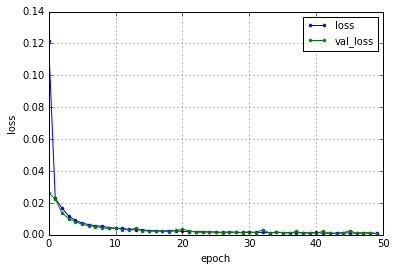

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0190 - val_loss: 0.0065
Epoch 2/50
0s - loss: 0.0052 - val_loss: 0.0043
Epoch 3/50
0s - loss: 0.0036 - val_loss: 0.0030
Epoch 4/50
0s - loss: 0.0028 - val_loss: 0.0024
Epoch 5/50
0s - loss: 0.0025 - val_loss: 0.0022
Epoch 6/50
0s - loss: 0.0021 - val_loss: 0.0019
Epoch 7/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 8/50
0s - loss: 0.0018 - val_loss: 0.0015
Epoch 9/50
0s - loss: 0.0016 - val_loss: 0.0027
Epoch 10/50
0s - loss: 0.0016 - val_loss: 0.0013
Epoch 11/50
0s - loss: 0.0014 - val_loss: 0.0015
Epoch 12/50
0s - loss: 0.0014 - val_loss: 0.0012
Epoch 13/50
0s - loss: 0.0012 - val_loss: 0.0017
Epoch 14/50
0s - loss: 0.0014 - val_loss: 0.0019
Epoch 15/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 16/50
0s - loss: 0.0013 - val_loss: 0.0014
Epoch 17/50
0s - loss: 0.0011 - val_loss: 9.6746e-04
Epoch 18/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 19/50
0s - loss: 0.0010 - val_loss: 8.9285e-04
Epoch 

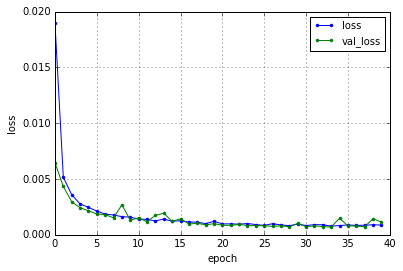

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0343 - val_loss: 0.0177
Epoch 2/50
0s - loss: 0.0161 - val_loss: 0.0149
Epoch 3/50
0s - loss: 0.0126 - val_loss: 0.0111
Epoch 4/50
0s - loss: 0.0109 - val_loss: 0.0121
Epoch 5/50
0s - loss: 0.0098 - val_loss: 0.0092
Epoch 6/50
0s - loss: 0.0088 - val_loss: 0.0088
Epoch 7/50
0s - loss: 0.0081 - val_loss: 0.0078
Epoch 8/50
0s - loss: 0.0076 - val_loss: 0.0071
Epoch 9/50
0s - loss: 0.0072 - val_loss: 0.0067
Epoch 10/50
0s - loss: 0.0068 - val_loss: 0.0064
Epoch 11/50
0s - loss: 0.0065 - val_loss: 0.0063
Epoch 12/50
0s - loss: 0.0062 - val_loss: 0.0062
Epoch 13/50
0s - loss: 0.0059 - val_loss: 0.0057
Epoch 14/50
0s - loss: 0.0056 - val_loss: 0.0055
Epoch 15/50
0s - loss: 0.0054 - val_loss: 0.0054
Epoch 16/50
0s - loss: 0.0052 - val_loss: 0.0072
Epoch 17/50
0s - loss: 0.0051 - val_loss: 0.0048
Epoch 18/50
0s - loss: 0.0049 - val_loss: 0.0048
Epoch 19/50
0s - loss: 0.0048 - val_loss: 0.0049
Epoch 20/50
0s

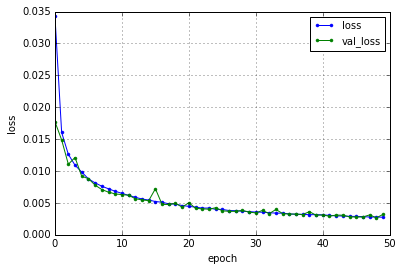

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0637 - val_loss: 0.0259
Epoch 2/50
0s - loss: 0.0253 - val_loss: 0.0215
Epoch 3/50
0s - loss: 0.0211 - val_loss: 0.0180
Epoch 4/50
0s - loss: 0.0175 - val_loss: 0.0155
Epoch 5/50
0s - loss: 0.0149 - val_loss: 0.0130
Epoch 6/50
0s - loss: 0.0136 - val_loss: 0.0154
Epoch 7/50
0s - loss: 0.0121 - val_loss: 0.0112
Epoch 8/50
0s - loss: 0.0114 - val_loss: 0.0107
Epoch 9/50
0s - loss: 0.0110 - val_loss: 0.0139
Epoch 10/50
0s - loss: 0.0103 - val_loss: 0.0094
Epoch 11/50
0s - loss: 0.0095 - val_loss: 0.0090
Epoch 12/50
0s - loss: 0.0090 - val_loss: 0.0084
Epoch 13/50
0s - loss: 0.0086 - val_loss: 0.0093
Epoch 14/50
0s - loss: 0.0083 - val_loss: 0.0076
Epoch 15/50
0s - loss: 0.0080 - val_loss: 0.0072
Epoch 16/50
0s - loss: 0.0076 - val_loss: 0.0069
Epoch 17/50
0s - loss: 0.0074 - val_loss: 0.0071
Epoch 18/50
0s - loss: 0.0069 - val_loss: 0.0064
Epoch 19/50
0s - loss: 0.0068 - val_loss: 0.0063
Epoch 20/50
0s

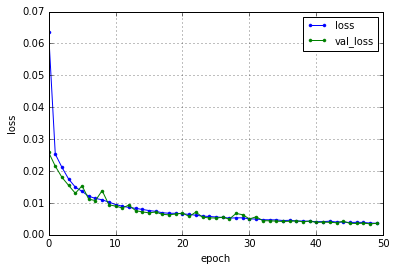

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0119 - val_loss: 0.0059
Epoch 2/50
0s - loss: 0.0051 - val_loss: 0.0043
Epoch 3/50
0s - loss: 0.0041 - val_loss: 0.0048
Epoch 4/50
0s - loss: 0.0035 - val_loss: 0.0032
Epoch 5/50
0s - loss: 0.0031 - val_loss: 0.0029
Epoch 6/50
0s - loss: 0.0029 - val_loss: 0.0027
Epoch 7/50
0s - loss: 0.0027 - val_loss: 0.0028
Epoch 8/50
0s - loss: 0.0025 - val_loss: 0.0032
Epoch 9/50
0s - loss: 0.0024 - val_loss: 0.0023
Epoch 10/50
0s - loss: 0.0023 - val_loss: 0.0029
Epoch 11/50
0s - loss: 0.0022 - val_loss: 0.0022
Epoch 12/50
0s - loss: 0.0021 - val_loss: 0.0022
Epoch 13/50
0s - loss: 0.0020 - val_loss: 0.0020
Epoch 14/50
0s - loss: 0.0020 - val_loss: 0.0020
Epoch 15/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 16/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 17/50
0s - loss: 0.0018 - val_loss: 0.0018
Epoch 18/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 19/50
0s - loss: 0.0017 - val_loss: 0.0018
Epoch 20/50
0s

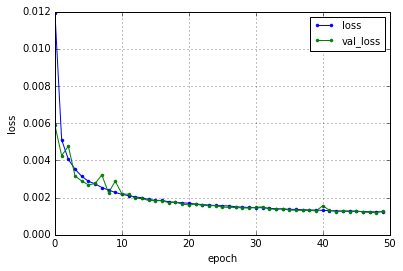

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0468 - val_loss: 0.0135
Epoch 2/50
0s - loss: 0.0134 - val_loss: 0.0098
Epoch 3/50
0s - loss: 0.0114 - val_loss: 0.0090
Epoch 4/50
0s - loss: 0.0099 - val_loss: 0.0104
Epoch 5/50
0s - loss: 0.0090 - val_loss: 0.0076
Epoch 6/50
0s - loss: 0.0084 - val_loss: 0.0098
Epoch 7/50
0s - loss: 0.0079 - val_loss: 0.0081
Epoch 8/50
0s - loss: 0.0075 - val_loss: 0.0045
Epoch 9/50
0s - loss: 0.0072 - val_loss: 0.0046
Epoch 10/50
0s - loss: 0.0070 - val_loss: 0.0041
Epoch 11/50
0s - loss: 0.0066 - val_loss: 0.0067
Epoch 12/50
0s - loss: 0.0065 - val_loss: 0.0054
Epoch 13/50
0s - loss: 0.0062 - val_loss: 0.0043
Epoch 14/50
0s - loss: 0.0061 - val_loss: 0.0045
Epoch 15/50
0s - loss: 0.0059 - val_loss: 0.0062
Epoch 16/50
0s - loss: 0.0058 - val_loss: 0.0053


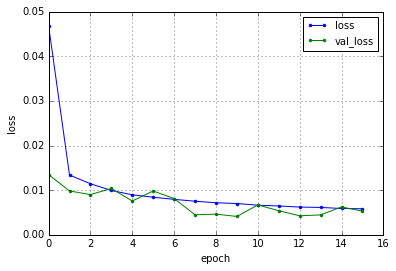

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0948 - val_loss: 0.0249
Epoch 2/50
0s - loss: 0.0214 - val_loss: 0.0187
Epoch 3/50
0s - loss: 0.0180 - val_loss: 0.0130
Epoch 4/50
0s - loss: 0.0163 - val_loss: 0.0138
Epoch 5/50
0s - loss: 0.0148 - val_loss: 0.0135
Epoch 6/50
0s - loss: 0.0143 - val_loss: 0.0104
Epoch 7/50
0s - loss: 0.0139 - val_loss: 0.0129
Epoch 8/50
0s - loss: 0.0137 - val_loss: 0.0249
Epoch 9/50
0s - loss: 0.0132 - val_loss: 0.0095
Epoch 10/50
0s - loss: 0.0131 - val_loss: 0.0127
Epoch 11/50
0s - loss: 0.0130 - val_loss: 0.0105
Epoch 12/50
0s - loss: 0.0125 - val_loss: 0.0097
Epoch 13/50
0s - loss: 0.0127 - val_loss: 0.0125
Epoch 14/50
0s - loss: 0.0123 - val_loss: 0.0077
Epoch 15/50
0s - loss: 0.0122 - val_loss: 0.0084
Epoch 16/50
0s - loss: 0.0121 - val_loss: 0.0133
Epoch 17/50
0s - loss: 0.0119 - val_loss: 0.0149
Epoch 18/50
0s - loss: 0.0118 - val_loss: 0.0081
Epoch 19/50
0s - loss: 0.0115 - val_loss: 0.0073
Epoch 20/50
0s

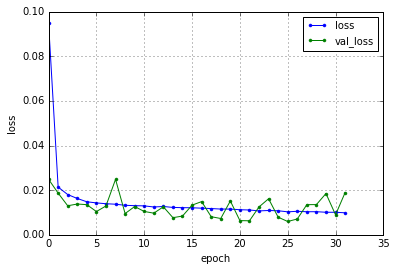

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0142 - val_loss: 0.0046
Epoch 2/50
0s - loss: 0.0045 - val_loss: 0.0038
Epoch 3/50
0s - loss: 0.0038 - val_loss: 0.0030
Epoch 4/50
0s - loss: 0.0035 - val_loss: 0.0026
Epoch 5/50
0s - loss: 0.0032 - val_loss: 0.0026
Epoch 6/50
0s - loss: 0.0030 - val_loss: 0.0021
Epoch 7/50
0s - loss: 0.0030 - val_loss: 0.0029
Epoch 8/50
0s - loss: 0.0028 - val_loss: 0.0019
Epoch 9/50
0s - loss: 0.0028 - val_loss: 0.0024
Epoch 10/50
0s - loss: 0.0027 - val_loss: 0.0018
Epoch 11/50
0s - loss: 0.0026 - val_loss: 0.0024
Epoch 12/50
0s - loss: 0.0026 - val_loss: 0.0017
Epoch 13/50
0s - loss: 0.0025 - val_loss: 0.0016
Epoch 14/50
0s - loss: 0.0025 - val_loss: 0.0017
Epoch 15/50
0s - loss: 0.0026 - val_loss: 0.0016
Epoch 16/50
0s - loss: 0.0025 - val_loss: 0.0056
Epoch 17/50
0s - loss: 0.0025 - val_loss: 0.0079
Epoch 18/50
0s - loss: 0.0025 - val_loss: 0.0021
Epoch 19/50
0s - loss: 0.0024 - val_loss: 0.0035


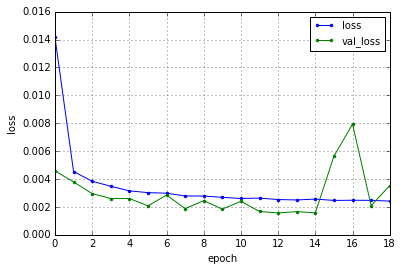

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0399 - val_loss: 0.0147
Epoch 2/50
0s - loss: 0.0145 - val_loss: 0.0215
Epoch 3/50
0s - loss: 0.0116 - val_loss: 0.0088
Epoch 4/50
0s - loss: 0.0097 - val_loss: 0.0067
Epoch 5/50
0s - loss: 0.0084 - val_loss: 0.0056
Epoch 6/50
0s - loss: 0.0076 - val_loss: 0.0067
Epoch 7/50
0s - loss: 0.0071 - val_loss: 0.0045
Epoch 8/50
0s - loss: 0.0063 - val_loss: 0.0047
Epoch 9/50
0s - loss: 0.0061 - val_loss: 0.0048
Epoch 10/50
0s - loss: 0.0055 - val_loss: 0.0034
Epoch 11/50
0s - loss: 0.0052 - val_loss: 0.0074
Epoch 12/50
0s - loss: 0.0050 - val_loss: 0.0042
Epoch 13/50
0s - loss: 0.0047 - val_loss: 0.0030
Epoch 14/50
0s - loss: 0.0043 - val_loss: 0.0027
Epoch 15/50
0s - loss: 0.0041 - val_loss: 0.0030
Epoch 16/50
0s - loss: 0.0041 - val_loss: 0.0027
Epoch 17/50
0s - loss: 0.0039 - val_loss: 0.0025
Epoch 18/50
0s - loss: 0.0035 - val_loss: 0.0028
Epoch 19/50
0s - loss: 0.0039 - val_loss: 0.0025
Epoch 20/50
0s

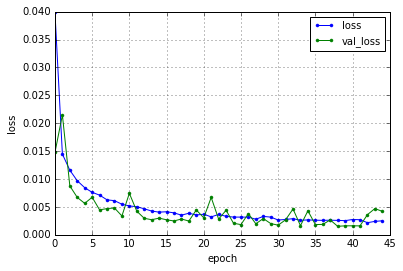

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0811 - val_loss: 0.0259
Epoch 2/50
0s - loss: 0.0267 - val_loss: 0.0337
Epoch 3/50
0s - loss: 0.0199 - val_loss: 0.0146
Epoch 4/50
0s - loss: 0.0175 - val_loss: 0.0142
Epoch 5/50
0s - loss: 0.0156 - val_loss: 0.0122
Epoch 6/50
0s - loss: 0.0146 - val_loss: 0.0298
Epoch 7/50
0s - loss: 0.0139 - val_loss: 0.0158
Epoch 8/50
0s - loss: 0.0128 - val_loss: 0.0120
Epoch 9/50
0s - loss: 0.0120 - val_loss: 0.0100
Epoch 10/50
0s - loss: 0.0115 - val_loss: 0.0153
Epoch 11/50
0s - loss: 0.0107 - val_loss: 0.0171
Epoch 12/50
0s - loss: 0.0103 - val_loss: 0.0111
Epoch 13/50
0s - loss: 0.0096 - val_loss: 0.0063
Epoch 14/50
0s - loss: 0.0093 - val_loss: 0.0111
Epoch 15/50
0s - loss: 0.0085 - val_loss: 0.0105
Epoch 16/50
0s - loss: 0.0080 - val_loss: 0.0055
Epoch 17/50
0s - loss: 0.0079 - val_loss: 0.0052
Epoch 18/50
0s - loss: 0.0076 - val_loss: 0.0075
Epoch 19/50
0s - loss: 0.0070 - val_loss: 0.0054
Epoch 20/50
0s

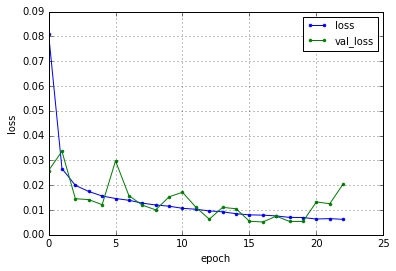

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0134 - val_loss: 0.0099
Epoch 2/50
0s - loss: 0.0048 - val_loss: 0.0035
Epoch 3/50
0s - loss: 0.0037 - val_loss: 0.0039
Epoch 4/50
0s - loss: 0.0033 - val_loss: 0.0060
Epoch 5/50
0s - loss: 0.0033 - val_loss: 0.0025
Epoch 6/50
0s - loss: 0.0029 - val_loss: 0.0077
Epoch 7/50
0s - loss: 0.0028 - val_loss: 0.0020
Epoch 8/50
0s - loss: 0.0025 - val_loss: 0.0017
Epoch 9/50
0s - loss: 0.0025 - val_loss: 0.0017
Epoch 10/50
0s - loss: 0.0024 - val_loss: 0.0019
Epoch 11/50
0s - loss: 0.0022 - val_loss: 0.0015
Epoch 12/50
0s - loss: 0.0022 - val_loss: 0.0016
Epoch 13/50
0s - loss: 0.0022 - val_loss: 0.0029
Epoch 14/50
0s - loss: 0.0022 - val_loss: 0.0047
Epoch 15/50
0s - loss: 0.0021 - val_loss: 0.0016
Epoch 16/50
0s - loss: 0.0020 - val_loss: 0.0014
Epoch 17/50
0s - loss: 0.0021 - val_loss: 0.0022
Epoch 18/50
0s - loss: 0.0018 - val_loss: 0.0012
Epoch 19/50
0s - loss: 0.0019 - val_loss: 0.0015
Epoch 20/50
0s

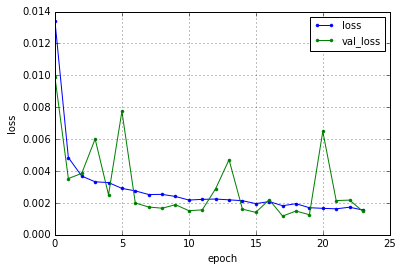

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =7945
SourceData's aborting data = 22
window shape is (7945, 512, 3)
(7945, 512, 3)
hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.3010 - val_loss: 0.2925
Epoch 2/50
0s - loss: 0.2843 - val_loss: 0.2753
Epoch 3/50
0s - loss: 0.2654 - val_loss: 0.2548
Epoch 4/50
0s - loss: 0.2437 - val_loss: 0.2323
Epoch 5/50
0s - loss: 0.2210 - val_loss: 0.2097
Epoch 6/50
0s - loss: 0.1991 - val_loss: 0.1886
Epoch 7/50
0s - loss: 0.1790 - val_loss: 0.1698
Epoch 8/50
0s - loss: 0.1615 - val_loss: 0.1534
Epoch 9/50
0s - loss: 0.1463 - val_loss: 0.1394
Epoch 10/50
0s - loss: 0.1333 - val_loss: 0.1274
Epoch 11/50
0s - loss: 0.1222 - val_loss: 0.1172
Epoch 12/50
0s - loss: 0.1128 - val_loss: 0.1085
Epoch 13/50
0s - loss: 0.1047 - val_loss: 0.1010
Epoch 14/50
0s - loss: 0.0977 - val_loss: 0.0945
Epoch 15/50
0s - loss: 0.0916 - val_loss: 0.0888
Epoch 16/50
0s - lo

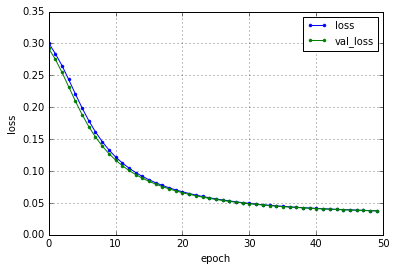

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.7241 - val_loss: 0.6772
Epoch 2/50
0s - loss: 0.6166 - val_loss: 0.5520
Epoch 3/50
0s - loss: 0.4924 - val_loss: 0.4364
Epoch 4/50
0s - loss: 0.3900 - val_loss: 0.3471
Epoch 5/50
0s - loss: 0.3121 - val_loss: 0.2798
Epoch 6/50
0s - loss: 0.2536 - val_loss: 0.2293
Epoch 7/50
0s - loss: 0.2096 - val_loss: 0.1914
Epoch 8/50
0s - loss: 0.1764 - val_loss: 0.1626
Epoch 9/50
0s - loss: 0.1511 - val_loss: 0.1405
Epoch 10/50
0s - loss: 0.1316 - val_loss: 0.1233
Epoch 11/50
0s - loss: 0.1163 - val_loss: 0.1097
Epoch 12/50
0s - loss: 0.1041 - val_loss: 0.0988
Epoch 13/50
0s - loss: 0.0943 - val_loss: 0.0901
Epoch 14/50
0s - loss: 0.0865 - val_loss: 0.0830
Epoch 15/50
0s - loss: 0.0801 - val_loss: 0.0773
Epoch 16/50
0s - loss: 0.0749 - val_loss: 0.0725
Epoch 17/50
0s - loss: 0.0705 - val_loss: 0.0686
Epoch 18/50
0s - loss: 0.0669 - val_loss: 0.0653
Epoch 19/50
0s - loss: 0.0638 - val_loss: 0.0624
Epoch 20/50
0s

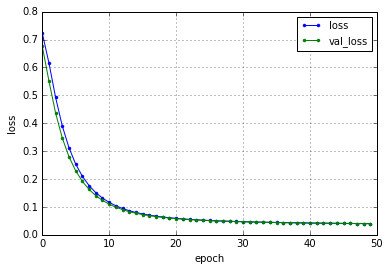

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0848 - val_loss: 0.0829
Epoch 2/50
0s - loss: 0.0815 - val_loss: 0.0803
Epoch 3/50
0s - loss: 0.0794 - val_loss: 0.0785
Epoch 4/50
0s - loss: 0.0777 - val_loss: 0.0769
Epoch 5/50
0s - loss: 0.0761 - val_loss: 0.0753
Epoch 6/50
0s - loss: 0.0744 - val_loss: 0.0736
Epoch 7/50
0s - loss: 0.0727 - val_loss: 0.0718
Epoch 8/50
0s - loss: 0.0709 - val_loss: 0.0700
Epoch 9/50
0s - loss: 0.0691 - val_loss: 0.0681
Epoch 10/50
0s - loss: 0.0671 - val_loss: 0.0661
Epoch 11/50
0s - loss: 0.0651 - val_loss: 0.0641
Epoch 12/50
0s - loss: 0.0631 - val_loss: 0.0621
Epoch 13/50
0s - loss: 0.0610 - val_loss: 0.0600
Epoch 14/50
0s - loss: 0.0590 - val_loss: 0.0580
Epoch 15/50
0s - loss: 0.0570 - val_loss: 0.0560
Epoch 16/50
0s - loss: 0.0550 - val_loss: 0.0540
Epoch 17/50
0s - loss: 0.0531 - val_loss: 0.0521
Epoch 18/50
0s - loss: 0.0512 - val_loss: 0.0503
Epoch 19/50
0s - loss: 0.0495 - val_loss: 0.0486
Epoch 20/50
0s

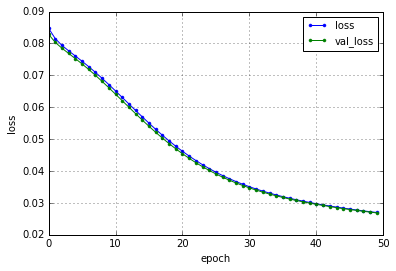

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0881 - val_loss: 0.0355
Epoch 2/50
0s - loss: 0.0305 - val_loss: 0.0338
Epoch 3/50
0s - loss: 0.0254 - val_loss: 0.0227
Epoch 4/50
0s - loss: 0.0221 - val_loss: 0.0218
Epoch 5/50
0s - loss: 0.0198 - val_loss: 0.0221
Epoch 6/50
0s - loss: 0.0188 - val_loss: 0.0171
Epoch 7/50
0s - loss: 0.0177 - val_loss: 0.0164
Epoch 8/50
0s - loss: 0.0168 - val_loss: 0.0215
Epoch 9/50
0s - loss: 0.0158 - val_loss: 0.0153
Epoch 10/50
0s - loss: 0.0153 - val_loss: 0.0146
Epoch 11/50
0s - loss: 0.0144 - val_loss: 0.0208
Epoch 12/50
0s - loss: 0.0142 - val_loss: 0.0251
Epoch 13/50
0s - loss: 0.0136 - val_loss: 0.0230
Epoch 14/50
0s - loss: 0.0130 - val_loss: 0.0125
Epoch 15/50
0s - loss: 0.0126 - val_loss: 0.0111
Epoch 16/50
0s - loss: 0.0126 - val_loss: 0.0113
Epoch 17/50
0s - loss: 0.0123 - val_loss: 0.0107
Epoch 18/50
0s - loss: 0.0121 - val_loss: 0.0167
Epoch 19/50
0s - loss: 0.0116 - val_loss: 0.0100
Epoch 20/50
0s

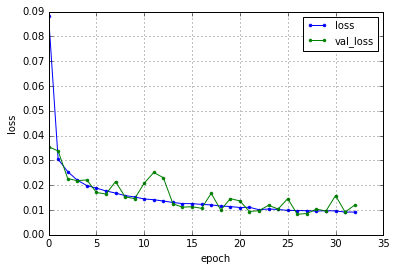

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.1832 - val_loss: 0.0527
Epoch 2/50
0s - loss: 0.0424 - val_loss: 0.0373
Epoch 3/50
0s - loss: 0.0389 - val_loss: 0.0363
Epoch 4/50
0s - loss: 0.0357 - val_loss: 0.0300
Epoch 5/50
0s - loss: 0.0298 - val_loss: 0.0290
Epoch 6/50
0s - loss: 0.0248 - val_loss: 0.0399
Epoch 7/50
0s - loss: 0.0218 - val_loss: 0.0176
Epoch 8/50
0s - loss: 0.0206 - val_loss: 0.0187
Epoch 9/50
0s - loss: 0.0195 - val_loss: 0.0164
Epoch 10/50
0s - loss: 0.0184 - val_loss: 0.0260
Epoch 11/50
0s - loss: 0.0180 - val_loss: 0.0141
Epoch 12/50
0s - loss: 0.0175 - val_loss: 0.0135
Epoch 13/50
0s - loss: 0.0165 - val_loss: 0.0149
Epoch 14/50
0s - loss: 0.0166 - val_loss: 0.0127
Epoch 15/50
0s - loss: 0.0156 - val_loss: 0.0163
Epoch 16/50
0s - loss: 0.0154 - val_loss: 0.0117
Epoch 17/50
0s - loss: 0.0144 - val_loss: 0.0130
Epoch 18/50
0s - loss: 0.0147 - val_loss: 0.0131
Epoch 19/50
0s - loss: 0.0137 - val_loss: 0.0123
Epoch 20/50
0s

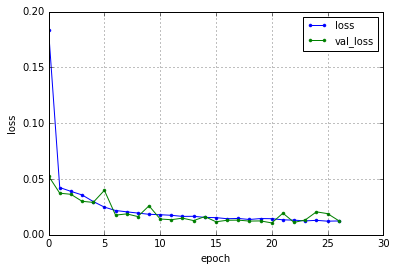

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0414 - val_loss: 0.0220
Epoch 2/50
0s - loss: 0.0185 - val_loss: 0.0157
Epoch 3/50
0s - loss: 0.0140 - val_loss: 0.0126
Epoch 4/50
0s - loss: 0.0118 - val_loss: 0.0111
Epoch 5/50
0s - loss: 0.0104 - val_loss: 0.0099
Epoch 6/50
0s - loss: 0.0094 - val_loss: 0.0099
Epoch 7/50
0s - loss: 0.0084 - val_loss: 0.0083
Epoch 8/50
0s - loss: 0.0078 - val_loss: 0.0073
Epoch 9/50
0s - loss: 0.0072 - val_loss: 0.0072
Epoch 10/50
0s - loss: 0.0067 - val_loss: 0.0077
Epoch 11/50
0s - loss: 0.0064 - val_loss: 0.0061
Epoch 12/50
0s - loss: 0.0061 - val_loss: 0.0060
Epoch 13/50
0s - loss: 0.0058 - val_loss: 0.0056
Epoch 14/50
0s - loss: 0.0056 - val_loss: 0.0057
Epoch 15/50
0s - loss: 0.0054 - val_loss: 0.0054
Epoch 16/50
0s - loss: 0.0053 - val_loss: 0.0054
Epoch 17/50
0s - loss: 0.0051 - val_loss: 0.0049
Epoch 18/50
0s - loss: 0.0050 - val_loss: 0.0049
Epoch 19/50
0s - loss: 0.0048 - val_loss: 0.0048
Epoch 20/50
0s

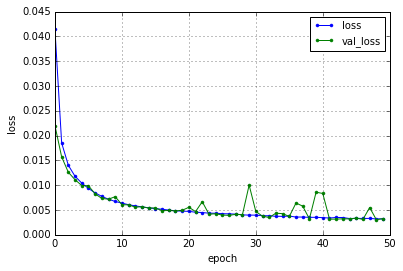

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0523 - val_loss: 0.0259
Epoch 2/50
0s - loss: 0.0216 - val_loss: 0.0185
Epoch 3/50
0s - loss: 0.0158 - val_loss: 0.0141
Epoch 4/50
0s - loss: 0.0130 - val_loss: 0.0124
Epoch 5/50
0s - loss: 0.0111 - val_loss: 0.0102
Epoch 6/50
0s - loss: 0.0101 - val_loss: 0.0091
Epoch 7/50
0s - loss: 0.0087 - val_loss: 0.0080
Epoch 8/50
0s - loss: 0.0077 - val_loss: 0.0082
Epoch 9/50
0s - loss: 0.0070 - val_loss: 0.0063
Epoch 10/50
0s - loss: 0.0063 - val_loss: 0.0073
Epoch 11/50
0s - loss: 0.0057 - val_loss: 0.0067
Epoch 12/50
0s - loss: 0.0054 - val_loss: 0.0051
Epoch 13/50
0s - loss: 0.0050 - val_loss: 0.0046
Epoch 14/50
0s - loss: 0.0045 - val_loss: 0.0044
Epoch 15/50
0s - loss: 0.0043 - val_loss: 0.0040
Epoch 16/50
0s - loss: 0.0042 - val_loss: 0.0059
Epoch 17/50
0s - loss: 0.0039 - val_loss: 0.0044
Epoch 18/50
0s - loss: 0.0039 - val_loss: 0.0040
Epoch 19/50
0s - loss: 0.0040 - val_loss: 0.0047
Epoch 20/50
0s

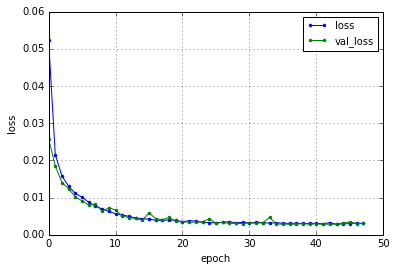

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0951 - val_loss: 0.0365
Epoch 2/50
0s - loss: 0.0337 - val_loss: 0.0304
Epoch 3/50
0s - loss: 0.0269 - val_loss: 0.0256
Epoch 4/50
0s - loss: 0.0211 - val_loss: 0.0186
Epoch 5/50
0s - loss: 0.0167 - val_loss: 0.0144
Epoch 6/50
0s - loss: 0.0135 - val_loss: 0.0119
Epoch 7/50
1s - loss: 0.0114 - val_loss: 0.0127
Epoch 8/50
0s - loss: 0.0099 - val_loss: 0.0102
Epoch 9/50
0s - loss: 0.0086 - val_loss: 0.0073
Epoch 10/50
1s - loss: 0.0073 - val_loss: 0.0074
Epoch 11/50
0s - loss: 0.0062 - val_loss: 0.0053
Epoch 12/50
0s - loss: 0.0058 - val_loss: 0.0048
Epoch 13/50
0s - loss: 0.0054 - val_loss: 0.0046
Epoch 14/50
0s - loss: 0.0047 - val_loss: 0.0050
Epoch 15/50
0s - loss: 0.0042 - val_loss: 0.0038
Epoch 16/50
0s - loss: 0.0042 - val_loss: 0.0036
Epoch 17/50
0s - loss: 0.0034 - val_loss: 0.0051
Epoch 18/50
0s - loss: 0.0035 - val_loss: 0.0031
Epoch 19/50
0s - loss: 0.0030 - val_loss: 0.0039
Epoch 20/50
0s

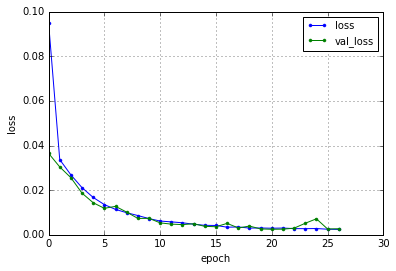

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0179 - val_loss: 0.0097
Epoch 2/50
0s - loss: 0.0073 - val_loss: 0.0060
Epoch 3/50
0s - loss: 0.0053 - val_loss: 0.0047
Epoch 4/50
0s - loss: 0.0044 - val_loss: 0.0043
Epoch 5/50
0s - loss: 0.0038 - val_loss: 0.0035
Epoch 6/50
0s - loss: 0.0033 - val_loss: 0.0029
Epoch 7/50
0s - loss: 0.0030 - val_loss: 0.0027
Epoch 8/50
0s - loss: 0.0026 - val_loss: 0.0036
Epoch 9/50
0s - loss: 0.0026 - val_loss: 0.0024
Epoch 10/50
0s - loss: 0.0022 - val_loss: 0.0022
Epoch 11/50
0s - loss: 0.0021 - val_loss: 0.0020
Epoch 12/50
0s - loss: 0.0022 - val_loss: 0.0020
Epoch 13/50
0s - loss: 0.0020 - val_loss: 0.0018
Epoch 14/50
0s - loss: 0.0020 - val_loss: 0.0018
Epoch 15/50
0s - loss: 0.0019 - val_loss: 0.0017
Epoch 16/50
0s - loss: 0.0018 - val_loss: 0.0016
Epoch 17/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 18/50
0s - loss: 0.0018 - val_loss: 0.0016
Epoch 19/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 20/50
0s

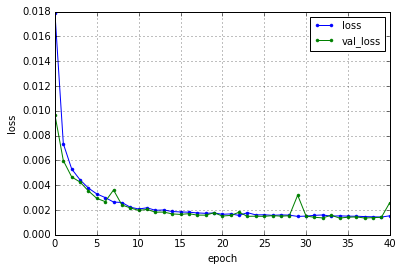

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0601 - val_loss: 0.0227
Epoch 2/50
0s - loss: 0.0190 - val_loss: 0.0153
Epoch 3/50
0s - loss: 0.0139 - val_loss: 0.0125
Epoch 4/50
1s - loss: 0.0112 - val_loss: 0.0098
Epoch 5/50
0s - loss: 0.0094 - val_loss: 0.0094
Epoch 6/50
0s - loss: 0.0083 - val_loss: 0.0096
Epoch 7/50
1s - loss: 0.0074 - val_loss: 0.0065
Epoch 8/50
0s - loss: 0.0067 - val_loss: 0.0102
Epoch 9/50
0s - loss: 0.0063 - val_loss: 0.0054
Epoch 10/50
0s - loss: 0.0058 - val_loss: 0.0052
Epoch 11/50
0s - loss: 0.0054 - val_loss: 0.0062
Epoch 12/50
0s - loss: 0.0051 - val_loss: 0.0061
Epoch 13/50
0s - loss: 0.0056 - val_loss: 0.0055
Epoch 14/50
0s - loss: 0.0048 - val_loss: 0.0051
Epoch 15/50
0s - loss: 0.0043 - val_loss: 0.0039
Epoch 16/50
0s - loss: 0.0043 - val_loss: 0.0042
Epoch 17/50
0s - loss: 0.0042 - val_loss: 0.0038
Epoch 18/50
0s - loss: 0.0040 - val_loss: 0.0037
Epoch 19/50
0s - loss: 0.0039 - val_loss: 0.0034
Epoch 20/50
0s

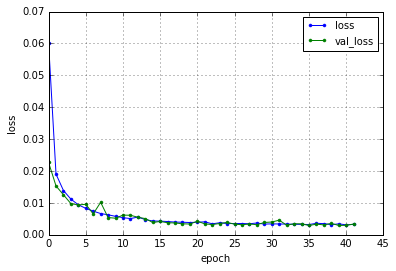

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.1176 - val_loss: 0.0369
Epoch 2/50
0s - loss: 0.0331 - val_loss: 0.0267
Epoch 3/50
0s - loss: 0.0216 - val_loss: 0.0183
Epoch 4/50
0s - loss: 0.0160 - val_loss: 0.0161
Epoch 5/50
0s - loss: 0.0128 - val_loss: 0.0111
Epoch 6/50
1s - loss: 0.0110 - val_loss: 0.0119
Epoch 7/50
0s - loss: 0.0099 - val_loss: 0.0087
Epoch 8/50
0s - loss: 0.0084 - val_loss: 0.0073
Epoch 9/50
0s - loss: 0.0078 - val_loss: 0.0064
Epoch 10/50
0s - loss: 0.0068 - val_loss: 0.0063
Epoch 11/50
0s - loss: 0.0062 - val_loss: 0.0062
Epoch 12/50
0s - loss: 0.0060 - val_loss: 0.0107
Epoch 13/50
0s - loss: 0.0053 - val_loss: 0.0075
Epoch 14/50
0s - loss: 0.0049 - val_loss: 0.0072
Epoch 15/50
0s - loss: 0.0047 - val_loss: 0.0045
Epoch 16/50
0s - loss: 0.0043 - val_loss: 0.0040
Epoch 17/50
0s - loss: 0.0040 - val_loss: 0.0046
Epoch 18/50
0s - loss: 0.0040 - val_loss: 0.0037
Epoch 19/50
0s - loss: 0.0036 - val_loss: 0.0038
Epoch 20/50
0s

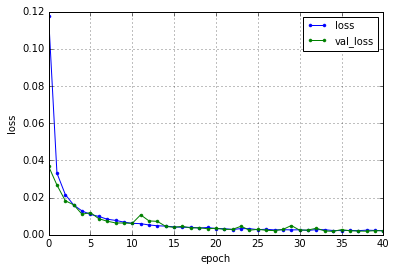

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0202 - val_loss: 0.0080
Epoch 2/50
0s - loss: 0.0069 - val_loss: 0.0056
Epoch 3/50
0s - loss: 0.0050 - val_loss: 0.0039
Epoch 4/50
0s - loss: 0.0039 - val_loss: 0.0054
Epoch 5/50
0s - loss: 0.0034 - val_loss: 0.0037
Epoch 6/50
0s - loss: 0.0031 - val_loss: 0.0034
Epoch 7/50
0s - loss: 0.0026 - val_loss: 0.0029
Epoch 8/50
0s - loss: 0.0028 - val_loss: 0.0031
Epoch 9/50
0s - loss: 0.0026 - val_loss: 0.0021
Epoch 10/50
0s - loss: 0.0022 - val_loss: 0.0020
Epoch 11/50
0s - loss: 0.0028 - val_loss: 0.0025
Epoch 12/50
0s - loss: 0.0022 - val_loss: 0.0018
Epoch 13/50
0s - loss: 0.0021 - val_loss: 0.0022
Epoch 14/50
0s - loss: 0.0021 - val_loss: 0.0052
Epoch 15/50
0s - loss: 0.0028 - val_loss: 0.0018
Epoch 16/50
0s - loss: 0.0019 - val_loss: 0.0017
Epoch 17/50
0s - loss: 0.0022 - val_loss: 0.0032
Epoch 18/50
0s - loss: 0.0020 - val_loss: 0.0021
Epoch 19/50
0s - loss: 0.0019 - val_loss: 0.0032
Epoch 20/50
0s

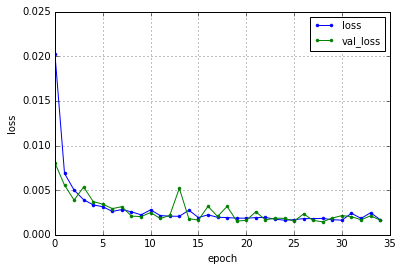

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0455 - val_loss: 0.0279
Epoch 2/50
0s - loss: 0.0223 - val_loss: 0.0204
Epoch 3/50
0s - loss: 0.0185 - val_loss: 0.0169
Epoch 4/50
0s - loss: 0.0166 - val_loss: 0.0143
Epoch 5/50
0s - loss: 0.0147 - val_loss: 0.0130
Epoch 6/50
0s - loss: 0.0131 - val_loss: 0.0124
Epoch 7/50
0s - loss: 0.0124 - val_loss: 0.0112
Epoch 8/50
0s - loss: 0.0115 - val_loss: 0.0147
Epoch 9/50
0s - loss: 0.0109 - val_loss: 0.0111
Epoch 10/50
0s - loss: 0.0101 - val_loss: 0.0096
Epoch 11/50
0s - loss: 0.0098 - val_loss: 0.0099
Epoch 12/50
0s - loss: 0.0097 - val_loss: 0.0089
Epoch 13/50
0s - loss: 0.0089 - val_loss: 0.0085
Epoch 14/50
0s - loss: 0.0089 - val_loss: 0.0103
Epoch 15/50
0s - loss: 0.0083 - val_loss: 0.0131
Epoch 16/50
0s - loss: 0.0084 - val_loss: 0.0077
Epoch 17/50
0s - loss: 0.0080 - val_loss: 0.0099
Epoch 18/50
0s - loss: 0.0079 - val_loss: 0.0115
Epoch 19/50
0s - loss: 0.0078 - val_loss: 0.0083
Epoch 20/50
0s

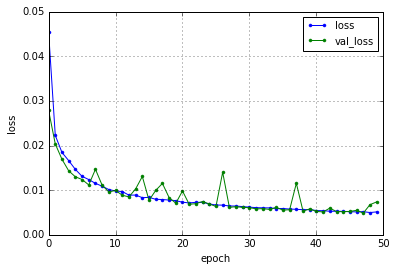

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0719 - val_loss: 0.0382
Epoch 2/50
0s - loss: 0.0372 - val_loss: 0.0394
Epoch 3/50
0s - loss: 0.0307 - val_loss: 0.0255
Epoch 4/50
0s - loss: 0.0252 - val_loss: 0.0208
Epoch 5/50
0s - loss: 0.0219 - val_loss: 0.0372
Epoch 6/50
0s - loss: 0.0186 - val_loss: 0.0181
Epoch 7/50
0s - loss: 0.0173 - val_loss: 0.0192
Epoch 8/50
0s - loss: 0.0159 - val_loss: 0.0137
Epoch 9/50
0s - loss: 0.0143 - val_loss: 0.0154
Epoch 10/50
0s - loss: 0.0143 - val_loss: 0.0146
Epoch 11/50
0s - loss: 0.0129 - val_loss: 0.0126
Epoch 12/50
0s - loss: 0.0122 - val_loss: 0.0109
Epoch 13/50
0s - loss: 0.0116 - val_loss: 0.0122
Epoch 14/50
0s - loss: 0.0110 - val_loss: 0.0104
Epoch 15/50
0s - loss: 0.0107 - val_loss: 0.0101
Epoch 16/50
0s - loss: 0.0105 - val_loss: 0.0089
Epoch 17/50
0s - loss: 0.0095 - val_loss: 0.0124
Epoch 18/50
0s - loss: 0.0096 - val_loss: 0.0117
Epoch 19/50
0s - loss: 0.0094 - val_loss: 0.0106
Epoch 20/50
0s

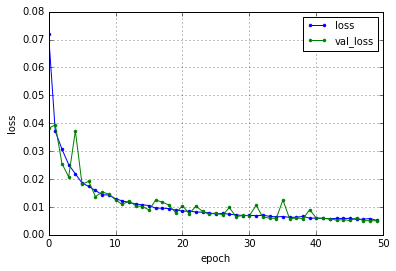

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0137 - val_loss: 0.0090
Epoch 2/50
0s - loss: 0.0070 - val_loss: 0.0062
Epoch 3/50
0s - loss: 0.0056 - val_loss: 0.0047
Epoch 4/50
0s - loss: 0.0049 - val_loss: 0.0044
Epoch 5/50
0s - loss: 0.0043 - val_loss: 0.0043
Epoch 6/50
0s - loss: 0.0042 - val_loss: 0.0041
Epoch 7/50
0s - loss: 0.0038 - val_loss: 0.0035
Epoch 8/50
0s - loss: 0.0038 - val_loss: 0.0034
Epoch 9/50
0s - loss: 0.0034 - val_loss: 0.0033
Epoch 10/50
0s - loss: 0.0033 - val_loss: 0.0031
Epoch 11/50
0s - loss: 0.0032 - val_loss: 0.0029
Epoch 12/50
0s - loss: 0.0031 - val_loss: 0.0041
Epoch 13/50
0s - loss: 0.0029 - val_loss: 0.0027
Epoch 14/50
0s - loss: 0.0029 - val_loss: 0.0029
Epoch 15/50
0s - loss: 0.0028 - val_loss: 0.0026
Epoch 16/50
0s - loss: 0.0027 - val_loss: 0.0056
Epoch 17/50
0s - loss: 0.0027 - val_loss: 0.0028
Epoch 18/50
0s - loss: 0.0025 - val_loss: 0.0027
Epoch 19/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 20/50
0s

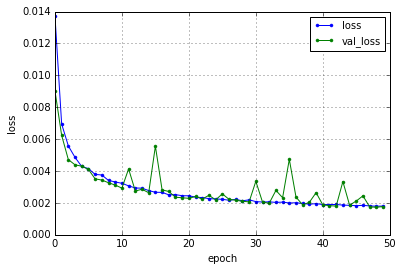

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0501 - val_loss: 0.0220
Epoch 2/50
0s - loss: 0.0217 - val_loss: 0.0224
Epoch 3/50
0s - loss: 0.0188 - val_loss: 0.0196
Epoch 4/50
0s - loss: 0.0166 - val_loss: 0.0115
Epoch 5/50
0s - loss: 0.0155 - val_loss: 0.0460
Epoch 6/50
0s - loss: 0.0147 - val_loss: 0.0109
Epoch 7/50
0s - loss: 0.0143 - val_loss: 0.0106
Epoch 8/50
0s - loss: 0.0134 - val_loss: 0.0348
Epoch 9/50
0s - loss: 0.0131 - val_loss: 0.0102
Epoch 10/50
0s - loss: 0.0127 - val_loss: 0.0109
Epoch 11/50
0s - loss: 0.0122 - val_loss: 0.0092
Epoch 12/50
0s - loss: 0.0121 - val_loss: 0.0321
Epoch 13/50
0s - loss: 0.0117 - val_loss: 0.0148
Epoch 14/50
0s - loss: 0.0115 - val_loss: 0.0084
Epoch 15/50
0s - loss: 0.0114 - val_loss: 0.0084
Epoch 16/50
0s - loss: 0.0110 - val_loss: 0.0077
Epoch 17/50
0s - loss: 0.0111 - val_loss: 0.0088
Epoch 18/50
0s - loss: 0.0107 - val_loss: 0.0078
Epoch 19/50
0s - loss: 0.0107 - val_loss: 0.0087
Epoch 20/50
0s

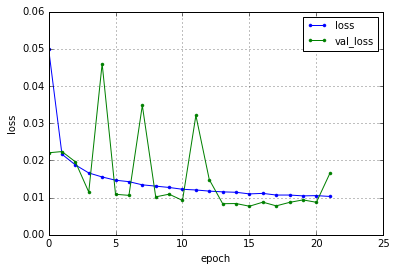

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.1007 - val_loss: 0.0386
Epoch 2/50
0s - loss: 0.0350 - val_loss: 0.0541
Epoch 3/50
0s - loss: 0.0278 - val_loss: 0.0224
Epoch 4/50
0s - loss: 0.0253 - val_loss: 0.0262
Epoch 5/50
0s - loss: 0.0240 - val_loss: 0.0229
Epoch 6/50
0s - loss: 0.0227 - val_loss: 0.0282
Epoch 7/50
0s - loss: 0.0222 - val_loss: 0.0298
Epoch 8/50
0s - loss: 0.0214 - val_loss: 0.0183
Epoch 9/50
0s - loss: 0.0207 - val_loss: 0.0328
Epoch 10/50
0s - loss: 0.0203 - val_loss: 0.0310
Epoch 11/50
0s - loss: 0.0199 - val_loss: 0.0499
Epoch 12/50
0s - loss: 0.0195 - val_loss: 0.0233
Epoch 13/50
0s - loss: 0.0190 - val_loss: 0.0876
Epoch 14/50
0s - loss: 0.0191 - val_loss: 0.0123
Epoch 15/50
0s - loss: 0.0181 - val_loss: 0.0185
Epoch 16/50
0s - loss: 0.0181 - val_loss: 0.0485
Epoch 17/50
0s - loss: 0.0177 - val_loss: 0.0424
Epoch 18/50
0s - loss: 0.0178 - val_loss: 0.0117
Epoch 19/50
0s - loss: 0.0173 - val_loss: 0.0276
Epoch 20/50
0s

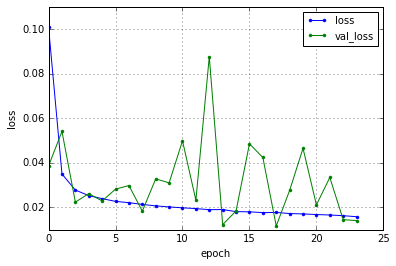

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0177 - val_loss: 0.0079
Epoch 2/50
0s - loss: 0.0074 - val_loss: 0.0051
Epoch 3/50
0s - loss: 0.0062 - val_loss: 0.0084
Epoch 4/50
0s - loss: 0.0059 - val_loss: 0.0079
Epoch 5/50
0s - loss: 0.0056 - val_loss: 0.0047
Epoch 6/50
0s - loss: 0.0052 - val_loss: 0.0301
Epoch 7/50
0s - loss: 0.0051 - val_loss: 0.0089
Epoch 8/50
0s - loss: 0.0050 - val_loss: 0.0240
Epoch 9/50
0s - loss: 0.0050 - val_loss: 0.0039
Epoch 10/50
0s - loss: 0.0048 - val_loss: 0.0033
Epoch 11/50
0s - loss: 0.0047 - val_loss: 0.0050
Epoch 12/50
0s - loss: 0.0047 - val_loss: 0.0042
Epoch 13/50
0s - loss: 0.0047 - val_loss: 0.0030
Epoch 14/50
0s - loss: 0.0046 - val_loss: 0.0028
Epoch 15/50
0s - loss: 0.0046 - val_loss: 0.0029
Epoch 16/50
0s - loss: 0.0044 - val_loss: 0.0190
Epoch 17/50
0s - loss: 0.0045 - val_loss: 0.0056
Epoch 18/50
0s - loss: 0.0045 - val_loss: 0.0071
Epoch 19/50
0s - loss: 0.0045 - val_loss: 0.0105
Epoch 20/50
0s

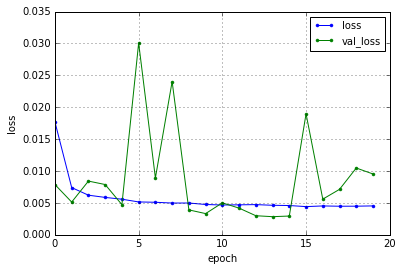

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0468 - val_loss: 0.0273
Epoch 2/50
0s - loss: 0.0233 - val_loss: 0.0148
Epoch 3/50
0s - loss: 0.0186 - val_loss: 0.0156
Epoch 4/50
0s - loss: 0.0159 - val_loss: 0.0384
Epoch 5/50
0s - loss: 0.0144 - val_loss: 0.0141
Epoch 6/50
0s - loss: 0.0131 - val_loss: 0.0280
Epoch 7/50
0s - loss: 0.0125 - val_loss: 0.0098
Epoch 8/50
0s - loss: 0.0108 - val_loss: 0.0074
Epoch 9/50
0s - loss: 0.0107 - val_loss: 0.0086
Epoch 10/50
0s - loss: 0.0102 - val_loss: 0.0073
Epoch 11/50
0s - loss: 0.0097 - val_loss: 0.0226
Epoch 12/50
0s - loss: 0.0094 - val_loss: 0.0080
Epoch 13/50
0s - loss: 0.0093 - val_loss: 0.0068
Epoch 14/50
0s - loss: 0.0088 - val_loss: 0.0072
Epoch 15/50
0s - loss: 0.0085 - val_loss: 0.0060
Epoch 16/50
0s - loss: 0.0085 - val_loss: 0.0113
Epoch 17/50
0s - loss: 0.0082 - val_loss: 0.0066
Epoch 18/50
0s - loss: 0.0082 - val_loss: 0.0198
Epoch 19/50
0s - loss: 0.0081 - val_loss: 0.0150
Epoch 20/50
0s

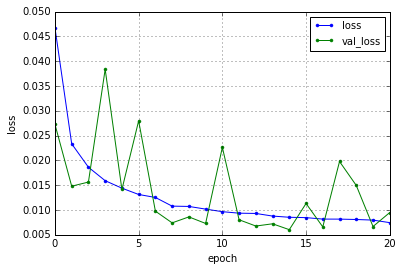

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0961 - val_loss: 0.0445
Epoch 2/50
0s - loss: 0.0423 - val_loss: 0.0372
Epoch 3/50
0s - loss: 0.0310 - val_loss: 0.0236
Epoch 4/50
0s - loss: 0.0264 - val_loss: 0.0247
Epoch 5/50
0s - loss: 0.0259 - val_loss: 0.0374
Epoch 6/50
0s - loss: 0.0231 - val_loss: 0.0258
Epoch 7/50
0s - loss: 0.0224 - val_loss: 0.0199
Epoch 8/50
0s - loss: 0.0185 - val_loss: 0.0141
Epoch 9/50
0s - loss: 0.0171 - val_loss: 0.0289
Epoch 10/50
0s - loss: 0.0167 - val_loss: 0.0139
Epoch 11/50
0s - loss: 0.0152 - val_loss: 0.0202
Epoch 12/50
0s - loss: 0.0139 - val_loss: 0.0152
Epoch 13/50
0s - loss: 0.0131 - val_loss: 0.0106
Epoch 14/50
0s - loss: 0.0121 - val_loss: 0.0215
Epoch 15/50
0s - loss: 0.0121 - val_loss: 0.0082
Epoch 16/50
0s - loss: 0.0112 - val_loss: 0.0143
Epoch 17/50
0s - loss: 0.0111 - val_loss: 0.0078
Epoch 18/50
0s - loss: 0.0109 - val_loss: 0.0102
Epoch 19/50
0s - loss: 0.0106 - val_loss: 0.0073
Epoch 20/50
0s

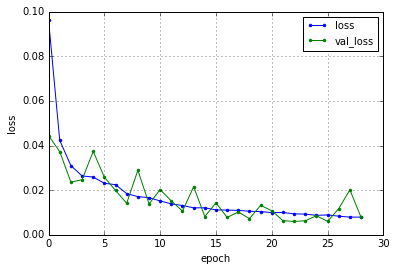

hiden node = 16
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0175 - val_loss: 0.0082
Epoch 2/50
0s - loss: 0.0078 - val_loss: 0.0066
Epoch 3/50
0s - loss: 0.0068 - val_loss: 0.0064
Epoch 4/50
0s - loss: 0.0057 - val_loss: 0.0040
Epoch 5/50
0s - loss: 0.0057 - val_loss: 0.0540
Epoch 6/50
0s - loss: 0.0058 - val_loss: 0.0039
Epoch 7/50
0s - loss: 0.0046 - val_loss: 0.0039
Epoch 8/50
0s - loss: 0.0047 - val_loss: 0.0029
Epoch 9/50
0s - loss: 0.0046 - val_loss: 0.0105
Epoch 10/50
0s - loss: 0.0044 - val_loss: 0.0066
Epoch 11/50
0s - loss: 0.0045 - val_loss: 0.0028
Epoch 12/50
0s - loss: 0.0044 - val_loss: 0.0035
Epoch 13/50
0s - loss: 0.0038 - val_loss: 0.0035
Epoch 14/50
0s - loss: 0.0040 - val_loss: 0.0063
Epoch 15/50
0s - loss: 0.0037 - val_loss: 0.0026
Epoch 16/50
0s - loss: 0.0036 - val_loss: 0.0031
Epoch 17/50
0s - loss: 0.0036 - val_loss: 0.0025
Epoch 18/50
0s - loss: 0.0034 - val_loss: 0.0033
Epoch 19/50
0s - loss: 0.0036 - val_loss: 0.0022
Epoch 20/50
0s

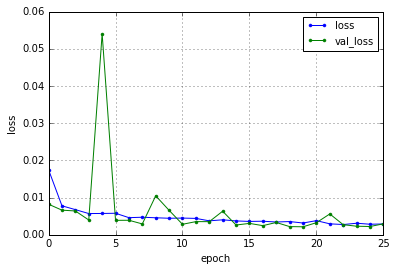

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =7929
SourceData's aborting data = 22
window shape is (7929, 1024, 3)
(7929, 1024, 3)
hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.3060 - val_loss: 0.2989
Epoch 2/50
0s - loss: 0.2936 - val_loss: 0.2881
Epoch 3/50
0s - loss: 0.2820 - val_loss: 0.2756
Epoch 4/50
0s - loss: 0.2689 - val_loss: 0.2621
Epoch 5/50
0s - loss: 0.2553 - val_loss: 0.2485
Epoch 6/50
0s - loss: 0.2419 - val_loss: 0.2354
Epoch 7/50
0s - loss: 0.2291 - val_loss: 0.2228
Epoch 8/50
0s - loss: 0.2168 - val_loss: 0.2109
Epoch 9/50
0s - loss: 0.2053 - val_loss: 0.1998
Epoch 10/50
0s - loss: 0.1946 - val_loss: 0.1894
Epoch 11/50
0s - loss: 0.1846 - val_loss: 0.1799
Epoch 12/50
0s - loss: 0.1755 - val_loss: 0.1711
Epoch 13/50
0s - loss: 0.1670 - val_loss: 0.1630
Epoch 14/50
0s - loss: 0.1593 - val_loss: 0.1557
Epoch 15/50
0s - loss: 0.1522 - val_loss: 0.1489
Epoch 16/50
0s - 

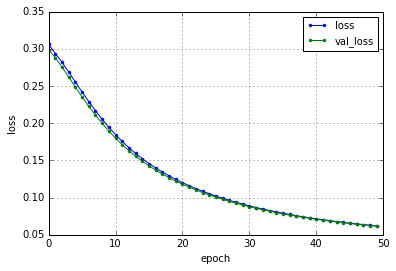

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.7338 - val_loss: 0.6980
Epoch 2/50
0s - loss: 0.6615 - val_loss: 0.6243
Epoch 3/50
0s - loss: 0.5884 - val_loss: 0.5534
Epoch 4/50
0s - loss: 0.5215 - val_loss: 0.4908
Epoch 5/50
0s - loss: 0.4631 - val_loss: 0.4364
Epoch 6/50
0s - loss: 0.4124 - val_loss: 0.3894
Epoch 7/50
0s - loss: 0.3687 - val_loss: 0.3487
Epoch 8/50
1s - loss: 0.3309 - val_loss: 0.3137
Epoch 9/50
1s - loss: 0.2982 - val_loss: 0.2834
Epoch 10/50
1s - loss: 0.2700 - val_loss: 0.2571
Epoch 11/50
1s - loss: 0.2455 - val_loss: 0.2344
Epoch 12/50
1s - loss: 0.2243 - val_loss: 0.2145
Epoch 13/50
1s - loss: 0.2057 - val_loss: 0.1972
Epoch 14/50
0s - loss: 0.1894 - val_loss: 0.1819
Epoch 15/50
0s - loss: 0.1751 - val_loss: 0.1685
Epoch 16/50
0s - loss: 0.1625 - val_loss: 0.1566
Epoch 17/50
0s - loss: 0.1513 - val_loss: 0.1461
Epoch 18/50
0s - loss: 0.1414 - val_loss: 0.1368
Epoch 19/50
0s - loss: 0.1327 - val_loss: 0.1286
Epoch 20/50
0s

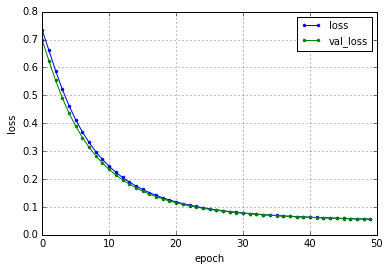

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0844 - val_loss: 0.0835
Epoch 2/50
0s - loss: 0.0829 - val_loss: 0.0824
Epoch 3/50
0s - loss: 0.0820 - val_loss: 0.0817
Epoch 4/50
0s - loss: 0.0814 - val_loss: 0.0811
Epoch 5/50
0s - loss: 0.0808 - val_loss: 0.0805
Epoch 6/50
0s - loss: 0.0803 - val_loss: 0.0800
Epoch 7/50
0s - loss: 0.0797 - val_loss: 0.0794
Epoch 8/50
0s - loss: 0.0791 - val_loss: 0.0788
Epoch 9/50
0s - loss: 0.0784 - val_loss: 0.0781
Epoch 10/50
0s - loss: 0.0777 - val_loss: 0.0773
Epoch 11/50
0s - loss: 0.0769 - val_loss: 0.0765
Epoch 12/50
0s - loss: 0.0761 - val_loss: 0.0757
Epoch 13/50
0s - loss: 0.0752 - val_loss: 0.0747
Epoch 14/50
0s - loss: 0.0743 - val_loss: 0.0738
Epoch 15/50
0s - loss: 0.0733 - val_loss: 0.0728
Epoch 16/50
0s - loss: 0.0723 - val_loss: 0.0717
Epoch 17/50
0s - loss: 0.0712 - val_loss: 0.0707
Epoch 18/50
0s - loss: 0.0701 - val_loss: 0.0696
Epoch 19/50
1s - loss: 0.0690 - val_loss: 0.0685
Epoch 20/50
0s

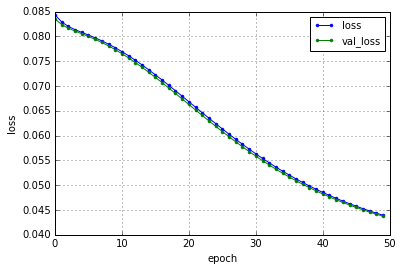

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.1105 - val_loss: 0.0472
Epoch 2/50
0s - loss: 0.0412 - val_loss: 0.0396
Epoch 3/50
0s - loss: 0.0347 - val_loss: 0.0345
Epoch 4/50
0s - loss: 0.0314 - val_loss: 0.0290
Epoch 5/50
0s - loss: 0.0295 - val_loss: 0.0340
Epoch 6/50
0s - loss: 0.0281 - val_loss: 0.0307
Epoch 7/50
0s - loss: 0.0264 - val_loss: 0.0268
Epoch 8/50
0s - loss: 0.0255 - val_loss: 0.0240
Epoch 9/50
0s - loss: 0.0245 - val_loss: 0.0232
Epoch 10/50
0s - loss: 0.0238 - val_loss: 0.0221
Epoch 11/50
0s - loss: 0.0231 - val_loss: 0.0210
Epoch 12/50
0s - loss: 0.0223 - val_loss: 0.0202
Epoch 13/50
0s - loss: 0.0218 - val_loss: 0.0244
Epoch 14/50
0s - loss: 0.0215 - val_loss: 0.0199
Epoch 15/50
0s - loss: 0.0214 - val_loss: 0.0243
Epoch 16/50
0s - loss: 0.0212 - val_loss: 0.0183
Epoch 17/50
0s - loss: 0.0201 - val_loss: 0.0187
Epoch 18/50
0s - loss: 0.0202 - val_loss: 0.0177
Epoch 19/50
0s - loss: 0.0191 - val_loss: 0.0212
Epoch 20/50
0s

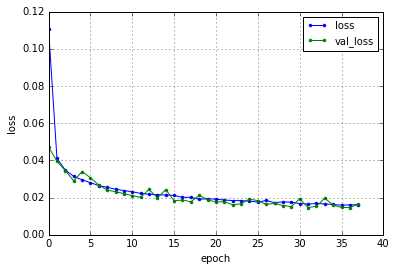

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.1930 - val_loss: 0.0605
Epoch 2/50
0s - loss: 0.0497 - val_loss: 0.0452
Epoch 3/50
0s - loss: 0.0452 - val_loss: 0.0452
Epoch 4/50
0s - loss: 0.0438 - val_loss: 0.0468
Epoch 5/50
0s - loss: 0.0422 - val_loss: 0.0389
Epoch 6/50
0s - loss: 0.0409 - val_loss: 0.0420
Epoch 7/50
0s - loss: 0.0397 - val_loss: 0.0384
Epoch 8/50
0s - loss: 0.0382 - val_loss: 0.0338
Epoch 9/50
0s - loss: 0.0362 - val_loss: 0.0316
Epoch 10/50
0s - loss: 0.0345 - val_loss: 0.0315
Epoch 11/50
0s - loss: 0.0332 - val_loss: 0.0280
Epoch 12/50
0s - loss: 0.0320 - val_loss: 0.0276
Epoch 13/50
0s - loss: 0.0304 - val_loss: 0.0512
Epoch 14/50
0s - loss: 0.0302 - val_loss: 0.0263
Epoch 15/50
0s - loss: 0.0284 - val_loss: 0.0267
Epoch 16/50
0s - loss: 0.0287 - val_loss: 0.0269
Epoch 17/50
0s - loss: 0.0274 - val_loss: 0.0332
Epoch 18/50
0s - loss: 0.0271 - val_loss: 0.0224
Epoch 19/50
0s - loss: 0.0271 - val_loss: 0.0229
Epoch 20/50
0s

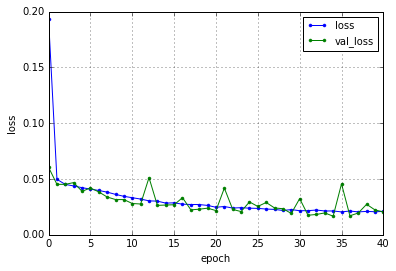

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0539 - val_loss: 0.0343
Epoch 2/50
0s - loss: 0.0295 - val_loss: 0.0257
Epoch 3/50
0s - loss: 0.0231 - val_loss: 0.0210
Epoch 4/50
0s - loss: 0.0196 - val_loss: 0.0184
Epoch 5/50
0s - loss: 0.0175 - val_loss: 0.0167
Epoch 6/50
0s - loss: 0.0159 - val_loss: 0.0152
Epoch 7/50
0s - loss: 0.0147 - val_loss: 0.0156
Epoch 8/50
0s - loss: 0.0137 - val_loss: 0.0132
Epoch 9/50
0s - loss: 0.0130 - val_loss: 0.0128
Epoch 10/50
0s - loss: 0.0123 - val_loss: 0.0122
Epoch 11/50
0s - loss: 0.0118 - val_loss: 0.0113
Epoch 12/50
0s - loss: 0.0113 - val_loss: 0.0108
Epoch 13/50
0s - loss: 0.0109 - val_loss: 0.0104
Epoch 14/50
0s - loss: 0.0105 - val_loss: 0.0103
Epoch 15/50
0s - loss: 0.0102 - val_loss: 0.0101
Epoch 16/50
1s - loss: 0.0099 - val_loss: 0.0094
Epoch 17/50
0s - loss: 0.0096 - val_loss: 0.0095
Epoch 18/50
0s - loss: 0.0094 - val_loss: 0.0102
Epoch 19/50
0s - loss: 0.0091 - val_loss: 0.0087
Epoch 20/50
0s

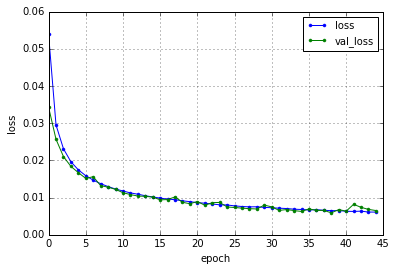

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0583 - val_loss: 0.0311
Epoch 2/50
0s - loss: 0.0273 - val_loss: 0.0256
Epoch 3/50
0s - loss: 0.0217 - val_loss: 0.0196
Epoch 4/50
0s - loss: 0.0182 - val_loss: 0.0168
Epoch 5/50
0s - loss: 0.0161 - val_loss: 0.0143
Epoch 6/50
0s - loss: 0.0137 - val_loss: 0.0139
Epoch 7/50
0s - loss: 0.0126 - val_loss: 0.0111
Epoch 8/50
0s - loss: 0.0113 - val_loss: 0.0102
Epoch 9/50
0s - loss: 0.0103 - val_loss: 0.0091
Epoch 10/50
0s - loss: 0.0095 - val_loss: 0.0084
Epoch 11/50
0s - loss: 0.0087 - val_loss: 0.0094
Epoch 12/50
0s - loss: 0.0083 - val_loss: 0.0093
Epoch 13/50
0s - loss: 0.0077 - val_loss: 0.0072
Epoch 14/50
0s - loss: 0.0079 - val_loss: 0.0071
Epoch 15/50
0s - loss: 0.0075 - val_loss: 0.0068
Epoch 16/50
0s - loss: 0.0069 - val_loss: 0.0071
Epoch 17/50
0s - loss: 0.0071 - val_loss: 0.0066
Epoch 18/50
0s - loss: 0.0069 - val_loss: 0.0065
Epoch 19/50
0s - loss: 0.0065 - val_loss: 0.0064
Epoch 20/50
0s

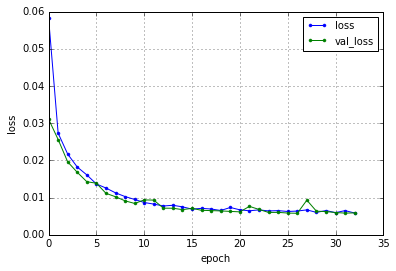

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0976 - val_loss: 0.0428
Epoch 2/50
0s - loss: 0.0409 - val_loss: 0.0384
Epoch 3/50
0s - loss: 0.0362 - val_loss: 0.0333
Epoch 4/50
0s - loss: 0.0310 - val_loss: 0.0271
Epoch 5/50
0s - loss: 0.0242 - val_loss: 0.0240
Epoch 6/50
0s - loss: 0.0202 - val_loss: 0.0179
Epoch 7/50
0s - loss: 0.0172 - val_loss: 0.0160
Epoch 8/50
0s - loss: 0.0151 - val_loss: 0.0131
Epoch 9/50
0s - loss: 0.0130 - val_loss: 0.0112
Epoch 10/50
1s - loss: 0.0116 - val_loss: 0.0104
Epoch 11/50
0s - loss: 0.0106 - val_loss: 0.0091
Epoch 12/50
0s - loss: 0.0092 - val_loss: 0.0095
Epoch 13/50
0s - loss: 0.0085 - val_loss: 0.0074
Epoch 14/50
0s - loss: 0.0079 - val_loss: 0.0093
Epoch 15/50
0s - loss: 0.0072 - val_loss: 0.0062
Epoch 16/50
0s - loss: 0.0070 - val_loss: 0.0060
Epoch 17/50
0s - loss: 0.0067 - val_loss: 0.0057
Epoch 18/50
0s - loss: 0.0063 - val_loss: 0.0054
Epoch 19/50
0s - loss: 0.0062 - val_loss: 0.0061
Epoch 20/50
0s

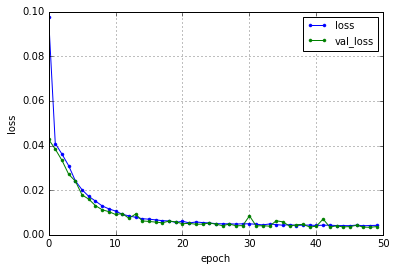

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0242 - val_loss: 0.0132
Epoch 2/50
0s - loss: 0.0114 - val_loss: 0.0112
Epoch 3/50
0s - loss: 0.0085 - val_loss: 0.0073
Epoch 4/50
0s - loss: 0.0067 - val_loss: 0.0061
Epoch 5/50
0s - loss: 0.0059 - val_loss: 0.0053
Epoch 6/50
0s - loss: 0.0050 - val_loss: 0.0049
Epoch 7/50
0s - loss: 0.0046 - val_loss: 0.0041
Epoch 8/50
0s - loss: 0.0042 - val_loss: 0.0045
Epoch 9/50
0s - loss: 0.0040 - val_loss: 0.0037
Epoch 10/50
0s - loss: 0.0040 - val_loss: 0.0043
Epoch 11/50
0s - loss: 0.0037 - val_loss: 0.0060
Epoch 12/50
0s - loss: 0.0035 - val_loss: 0.0039
Epoch 13/50
0s - loss: 0.0035 - val_loss: 0.0031
Epoch 14/50
0s - loss: 0.0033 - val_loss: 0.0036
Epoch 15/50
0s - loss: 0.0033 - val_loss: 0.0031
Epoch 16/50
0s - loss: 0.0032 - val_loss: 0.0030
Epoch 17/50
0s - loss: 0.0031 - val_loss: 0.0044
Epoch 18/50
0s - loss: 0.0035 - val_loss: 0.0030
Epoch 19/50
0s - loss: 0.0033 - val_loss: 0.0029
Epoch 20/50
0s

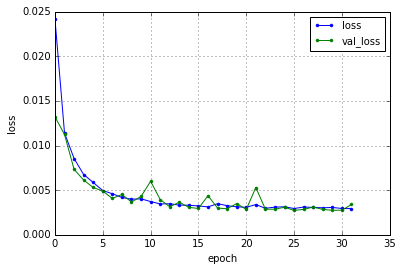

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0634 - val_loss: 0.0299
Epoch 2/50
0s - loss: 0.0262 - val_loss: 0.0230
Epoch 3/50
0s - loss: 0.0194 - val_loss: 0.0179
Epoch 4/50
0s - loss: 0.0162 - val_loss: 0.0141
Epoch 5/50
0s - loss: 0.0137 - val_loss: 0.0126
Epoch 6/50
0s - loss: 0.0131 - val_loss: 0.0110
Epoch 7/50
0s - loss: 0.0118 - val_loss: 0.0163
Epoch 8/50
0s - loss: 0.0104 - val_loss: 0.0104
Epoch 9/50
0s - loss: 0.0100 - val_loss: 0.0089
Epoch 10/50
0s - loss: 0.0095 - val_loss: 0.0084
Epoch 11/50
0s - loss: 0.0094 - val_loss: 0.0305
Epoch 12/50
0s - loss: 0.0096 - val_loss: 0.0077
Epoch 13/50
0s - loss: 0.0082 - val_loss: 0.0072
Epoch 14/50
0s - loss: 0.0075 - val_loss: 0.0070
Epoch 15/50
0s - loss: 0.0083 - val_loss: 0.0069
Epoch 16/50
0s - loss: 0.0076 - val_loss: 0.0092
Epoch 17/50
0s - loss: 0.0074 - val_loss: 0.0072
Epoch 18/50
0s - loss: 0.0095 - val_loss: 0.0070
Epoch 19/50
0s - loss: 0.0070 - val_loss: 0.0073
Epoch 20/50
0s

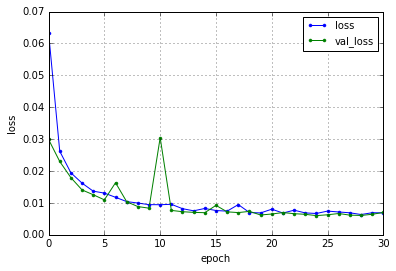

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.1192 - val_loss: 0.0428
Epoch 2/50
0s - loss: 0.0399 - val_loss: 0.0373
Epoch 3/50
0s - loss: 0.0337 - val_loss: 0.0276
Epoch 4/50
0s - loss: 0.0257 - val_loss: 0.0221
Epoch 5/50
0s - loss: 0.0207 - val_loss: 0.0197
Epoch 6/50
0s - loss: 0.0174 - val_loss: 0.0150
Epoch 7/50
0s - loss: 0.0157 - val_loss: 0.0148
Epoch 8/50
0s - loss: 0.0139 - val_loss: 0.0122
Epoch 9/50
0s - loss: 0.0122 - val_loss: 0.0132
Epoch 10/50
0s - loss: 0.0109 - val_loss: 0.0102
Epoch 11/50
0s - loss: 0.0102 - val_loss: 0.0083
Epoch 12/50
0s - loss: 0.0098 - val_loss: 0.0088
Epoch 13/50
0s - loss: 0.0096 - val_loss: 0.0075
Epoch 14/50
0s - loss: 0.0082 - val_loss: 0.0104
Epoch 15/50
1s - loss: 0.0081 - val_loss: 0.0066
Epoch 16/50
1s - loss: 0.0075 - val_loss: 0.0083
Epoch 17/50
1s - loss: 0.0070 - val_loss: 0.0061
Epoch 18/50
0s - loss: 0.0068 - val_loss: 0.0060
Epoch 19/50
0s - loss: 0.0073 - val_loss: 0.0086
Epoch 20/50
0s

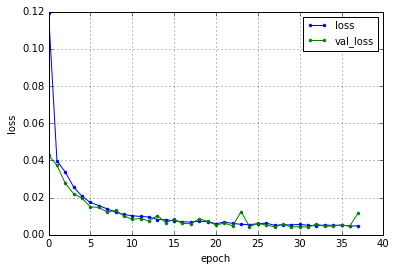

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0233 - val_loss: 0.0116
Epoch 2/50
0s - loss: 0.0097 - val_loss: 0.0075
Epoch 3/50
0s - loss: 0.0072 - val_loss: 0.0068
Epoch 4/50
0s - loss: 0.0059 - val_loss: 0.0050
Epoch 5/50
0s - loss: 0.0057 - val_loss: 0.0057
Epoch 6/50
0s - loss: 0.0048 - val_loss: 0.0041
Epoch 7/50
0s - loss: 0.0050 - val_loss: 0.0070
Epoch 8/50
0s - loss: 0.0043 - val_loss: 0.0040
Epoch 9/50
0s - loss: 0.0042 - val_loss: 0.0037
Epoch 10/50
0s - loss: 0.0040 - val_loss: 0.0071
Epoch 11/50
0s - loss: 0.0048 - val_loss: 0.0034
Epoch 12/50
0s - loss: 0.0039 - val_loss: 0.0037
Epoch 13/50
0s - loss: 0.0043 - val_loss: 0.0037
Epoch 14/50
0s - loss: 0.0037 - val_loss: 0.0034
Epoch 15/50
0s - loss: 0.0037 - val_loss: 0.0037
Epoch 16/50
1s - loss: 0.0039 - val_loss: 0.0035
Epoch 17/50
1s - loss: 0.0037 - val_loss: 0.0032
Epoch 18/50
0s - loss: 0.0043 - val_loss: 0.0043
Epoch 19/50
0s - loss: 0.0041 - val_loss: 0.0033
Epoch 20/50
0s

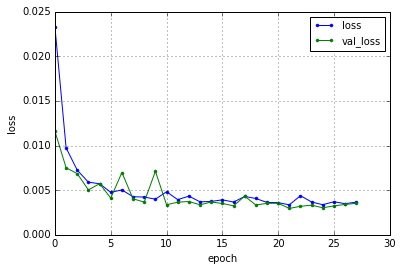

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0516 - val_loss: 0.0301
Epoch 2/50
0s - loss: 0.0284 - val_loss: 0.0272
Epoch 3/50
0s - loss: 0.0238 - val_loss: 0.0204
Epoch 4/50
0s - loss: 0.0215 - val_loss: 0.0187
Epoch 5/50
0s - loss: 0.0196 - val_loss: 0.0176
Epoch 6/50
1s - loss: 0.0184 - val_loss: 0.0163
Epoch 7/50
1s - loss: 0.0173 - val_loss: 0.0152
Epoch 8/50
0s - loss: 0.0163 - val_loss: 0.0148
Epoch 9/50
0s - loss: 0.0155 - val_loss: 0.0140
Epoch 10/50
0s - loss: 0.0150 - val_loss: 0.0134
Epoch 11/50
0s - loss: 0.0141 - val_loss: 0.0138
Epoch 12/50
0s - loss: 0.0141 - val_loss: 0.0126
Epoch 13/50
0s - loss: 0.0132 - val_loss: 0.0265
Epoch 14/50
0s - loss: 0.0130 - val_loss: 0.0125
Epoch 15/50
0s - loss: 0.0126 - val_loss: 0.0119
Epoch 16/50
0s - loss: 0.0123 - val_loss: 0.0119
Epoch 17/50
0s - loss: 0.0123 - val_loss: 0.0151
Epoch 18/50
0s - loss: 0.0115 - val_loss: 0.0111
Epoch 19/50
0s - loss: 0.0115 - val_loss: 0.0104
Epoch 20/50
0s

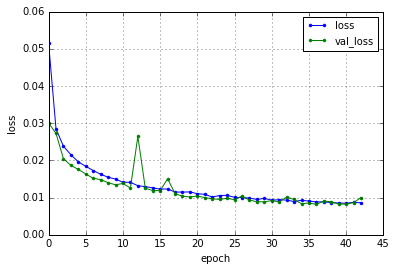

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0935 - val_loss: 0.0472
Epoch 2/50
0s - loss: 0.0461 - val_loss: 0.0399
Epoch 3/50
0s - loss: 0.0419 - val_loss: 0.0357
Epoch 4/50
0s - loss: 0.0373 - val_loss: 0.0317
Epoch 5/50
0s - loss: 0.0326 - val_loss: 0.0281
Epoch 6/50
1s - loss: 0.0298 - val_loss: 0.0250
Epoch 7/50
0s - loss: 0.0271 - val_loss: 0.0285
Epoch 8/50
1s - loss: 0.0251 - val_loss: 0.0263
Epoch 9/50
0s - loss: 0.0241 - val_loss: 0.0283
Epoch 10/50
1s - loss: 0.0226 - val_loss: 0.0318
Epoch 11/50
0s - loss: 0.0216 - val_loss: 0.0223
Epoch 12/50
0s - loss: 0.0203 - val_loss: 0.0215
Epoch 13/50
0s - loss: 0.0203 - val_loss: 0.0180
Epoch 14/50
0s - loss: 0.0186 - val_loss: 0.0168
Epoch 15/50
0s - loss: 0.0182 - val_loss: 0.0166
Epoch 16/50
0s - loss: 0.0175 - val_loss: 0.0154
Epoch 17/50
0s - loss: 0.0172 - val_loss: 0.0165
Epoch 18/50
0s - loss: 0.0163 - val_loss: 0.0242
Epoch 19/50
0s - loss: 0.0163 - val_loss: 0.0204
Epoch 20/50
1s

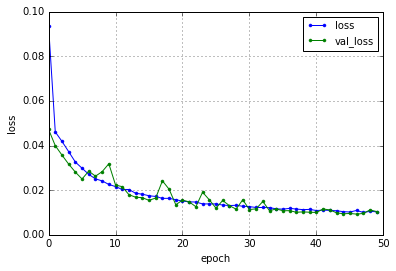

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0206 - val_loss: 0.0118
Epoch 2/50
0s - loss: 0.0114 - val_loss: 0.0092
Epoch 3/50
0s - loss: 0.0088 - val_loss: 0.0080
Epoch 4/50
0s - loss: 0.0082 - val_loss: 0.0068
Epoch 5/50
0s - loss: 0.0070 - val_loss: 0.0073
Epoch 6/50
0s - loss: 0.0067 - val_loss: 0.0060
Epoch 7/50
1s - loss: 0.0062 - val_loss: 0.0057
Epoch 8/50
0s - loss: 0.0059 - val_loss: 0.0053
Epoch 9/50
0s - loss: 0.0056 - val_loss: 0.0052
Epoch 10/50
0s - loss: 0.0052 - val_loss: 0.0048
Epoch 11/50
0s - loss: 0.0051 - val_loss: 0.0060
Epoch 12/50
0s - loss: 0.0052 - val_loss: 0.0051
Epoch 13/50
0s - loss: 0.0049 - val_loss: 0.0046
Epoch 14/50
0s - loss: 0.0047 - val_loss: 0.0044
Epoch 15/50
0s - loss: 0.0048 - val_loss: 0.0043
Epoch 16/50
0s - loss: 0.0045 - val_loss: 0.0045
Epoch 17/50
0s - loss: 0.0045 - val_loss: 0.0046
Epoch 18/50
0s - loss: 0.0044 - val_loss: 0.0049
Epoch 19/50
0s - loss: 0.0043 - val_loss: 0.0040
Epoch 20/50
0s

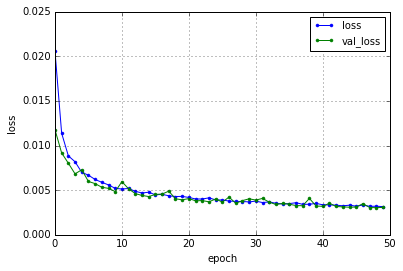

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
1s - loss: 0.0606 - val_loss: 0.0411
Epoch 2/50
0s - loss: 0.0320 - val_loss: 0.0254
Epoch 3/50
0s - loss: 0.0287 - val_loss: 0.0222
Epoch 4/50
0s - loss: 0.0267 - val_loss: 0.0545
Epoch 5/50
0s - loss: 0.0250 - val_loss: 0.0330
Epoch 6/50
0s - loss: 0.0246 - val_loss: 0.0274
Epoch 7/50
0s - loss: 0.0237 - val_loss: 0.0233
Epoch 8/50
1s - loss: 0.0223 - val_loss: 0.0206
Epoch 9/50
0s - loss: 0.0218 - val_loss: 0.0162
Epoch 10/50
0s - loss: 0.0213 - val_loss: 0.0190
Epoch 11/50
1s - loss: 0.0207 - val_loss: 0.0177
Epoch 12/50
1s - loss: 0.0205 - val_loss: 0.0228
Epoch 13/50
1s - loss: 0.0201 - val_loss: 0.0169
Epoch 14/50
0s - loss: 0.0196 - val_loss: 0.0142
Epoch 15/50
1s - loss: 0.0191 - val_loss: 0.0296
Epoch 16/50
1s - loss: 0.0191 - val_loss: 0.0147
Epoch 17/50
0s - loss: 0.0188 - val_loss: 0.0140
Epoch 18/50
0s - loss: 0.0186 - val_loss: 0.0125
Epoch 19/50
0s - loss: 0.0185 - val_loss: 0.0133
Epoch 20/50
0s

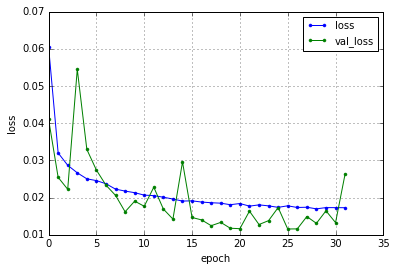

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.1147 - val_loss: 0.0457
Epoch 2/50
0s - loss: 0.0535 - val_loss: 0.0402
Epoch 3/50
0s - loss: 0.0490 - val_loss: 0.0593
Epoch 4/50
0s - loss: 0.0434 - val_loss: 0.0311
Epoch 5/50
0s - loss: 0.0400 - val_loss: 0.0310
Epoch 6/50
0s - loss: 0.0369 - val_loss: 0.0272
Epoch 7/50
0s - loss: 0.0353 - val_loss: 0.0467
Epoch 8/50
0s - loss: 0.0347 - val_loss: 0.0322
Epoch 9/50
0s - loss: 0.0339 - val_loss: 0.0320
Epoch 10/50
0s - loss: 0.0334 - val_loss: 0.0402
Epoch 11/50
0s - loss: 0.0326 - val_loss: 0.0388
Epoch 12/50
0s - loss: 0.0316 - val_loss: 0.0316


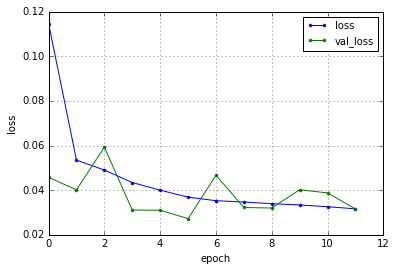

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0223 - val_loss: 0.0161
Epoch 2/50
0s - loss: 0.0122 - val_loss: 0.0082
Epoch 3/50
0s - loss: 0.0106 - val_loss: 0.0086
Epoch 4/50
1s - loss: 0.0099 - val_loss: 0.0068
Epoch 5/50
1s - loss: 0.0092 - val_loss: 0.0075
Epoch 6/50
0s - loss: 0.0090 - val_loss: 0.0115
Epoch 7/50
1s - loss: 0.0089 - val_loss: 0.0066
Epoch 8/50
0s - loss: 0.0088 - val_loss: 0.0057
Epoch 9/50
0s - loss: 0.0086 - val_loss: 0.0057
Epoch 10/50
0s - loss: 0.0084 - val_loss: 0.0058
Epoch 11/50
0s - loss: 0.0085 - val_loss: 0.0058
Epoch 12/50
0s - loss: 0.0082 - val_loss: 0.0058
Epoch 13/50
0s - loss: 0.0084 - val_loss: 0.0083
Epoch 14/50
0s - loss: 0.0082 - val_loss: 0.0175
Epoch 15/50
0s - loss: 0.0082 - val_loss: 0.0091


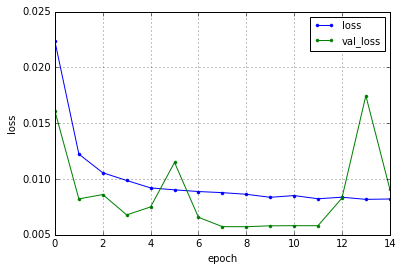

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0622 - val_loss: 0.0376
Epoch 2/50
0s - loss: 0.0333 - val_loss: 0.0252
Epoch 3/50
0s - loss: 0.0300 - val_loss: 0.0249
Epoch 4/50
0s - loss: 0.0267 - val_loss: 0.0226
Epoch 5/50
0s - loss: 0.0240 - val_loss: 0.0174
Epoch 6/50
0s - loss: 0.0222 - val_loss: 0.0150
Epoch 7/50
0s - loss: 0.0218 - val_loss: 0.0174
Epoch 8/50
0s - loss: 0.0201 - val_loss: 0.0150
Epoch 9/50
0s - loss: 0.0191 - val_loss: 0.0140
Epoch 10/50
0s - loss: 0.0192 - val_loss: 0.0152
Epoch 11/50
0s - loss: 0.0182 - val_loss: 0.0222
Epoch 12/50
0s - loss: 0.0172 - val_loss: 0.0137
Epoch 13/50
0s - loss: 0.0168 - val_loss: 0.0212
Epoch 14/50
0s - loss: 0.0164 - val_loss: 0.0222
Epoch 15/50
0s - loss: 0.0168 - val_loss: 0.0234
Epoch 16/50
1s - loss: 0.0158 - val_loss: 0.0121
Epoch 17/50
1s - loss: 0.0183 - val_loss: 0.0351
Epoch 18/50
0s - loss: 0.0153 - val_loss: 0.0116
Epoch 19/50
0s - loss: 0.0158 - val_loss: 0.0168
Epoch 20/50
0s

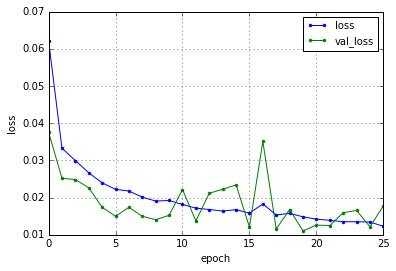

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
1s - loss: 0.1244 - val_loss: 0.0724
Epoch 2/50
0s - loss: 0.0661 - val_loss: 0.0571
Epoch 3/50
0s - loss: 0.0563 - val_loss: 0.0497
Epoch 4/50
0s - loss: 0.0555 - val_loss: 0.0618
Epoch 5/50
1s - loss: 0.0587 - val_loss: 0.0488
Epoch 6/50
1s - loss: 0.0482 - val_loss: 0.0591
Epoch 7/50
1s - loss: 0.0492 - val_loss: 0.0396
Epoch 8/50
0s - loss: 0.0479 - val_loss: 0.0369
Epoch 9/50
1s - loss: 0.0459 - val_loss: 0.0299
Epoch 10/50
1s - loss: 0.0488 - val_loss: 0.0389
Epoch 11/50
1s - loss: 0.0340 - val_loss: 0.0256
Epoch 12/50
0s - loss: 0.0356 - val_loss: 0.0337
Epoch 13/50
1s - loss: 0.0264 - val_loss: 0.0211
Epoch 14/50
0s - loss: 0.0240 - val_loss: 0.0182
Epoch 15/50
0s - loss: 0.0325 - val_loss: 0.0257
Epoch 16/50
1s - loss: 0.0297 - val_loss: 0.0204
Epoch 17/50
0s - loss: 0.0241 - val_loss: 0.0239
Epoch 18/50
0s - loss: 0.0216 - val_loss: 0.0158
Epoch 19/50
0s - loss: 0.0211 - val_loss: 0.0246
Epoch 20/50
0s

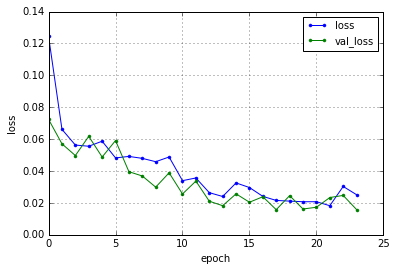

hiden node = 16
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
1s - loss: 0.0231 - val_loss: 0.0152
Epoch 2/50
0s - loss: 0.0135 - val_loss: 0.0206
Epoch 3/50
0s - loss: 0.0111 - val_loss: 0.0103
Epoch 4/50
0s - loss: 0.0114 - val_loss: 0.0074
Epoch 5/50
0s - loss: 0.0096 - val_loss: 0.0089
Epoch 6/50
0s - loss: 0.0093 - val_loss: 0.0061
Epoch 7/50
0s - loss: 0.0094 - val_loss: 0.0142
Epoch 8/50
0s - loss: 0.0093 - val_loss: 0.0064
Epoch 9/50
0s - loss: 0.0088 - val_loss: 0.0058
Epoch 10/50
0s - loss: 0.0082 - val_loss: 0.0149
Epoch 11/50
0s - loss: 0.0083 - val_loss: 0.0063
Epoch 12/50
0s - loss: 0.0080 - val_loss: 0.0063
Epoch 13/50
0s - loss: 0.0086 - val_loss: 0.0202
Epoch 14/50
0s - loss: 0.0080 - val_loss: 0.0051
Epoch 15/50
0s - loss: 0.0079 - val_loss: 0.0093
Epoch 16/50
0s - loss: 0.0073 - val_loss: 0.0173
Epoch 17/50
0s - loss: 0.0069 - val_loss: 0.0100
Epoch 18/50
1s - loss: 0.0072 - val_loss: 0.0081
Epoch 19/50
1s - loss: 0.0070 - val_loss: 0.0052
Epoch 20/50
0s

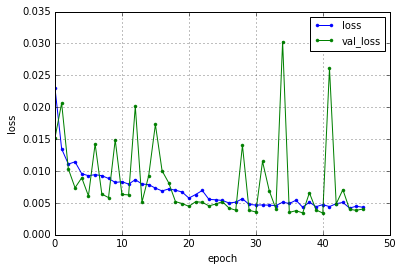

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =7897
SourceData's aborting data = 22
window shape is (7897, 2048, 3)
(7897, 2048, 3)
hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.3061 - val_loss: 0.3031
Epoch 2/50
1s - loss: 0.3009 - val_loss: 0.2987
Epoch 3/50
1s - loss: 0.2963 - val_loss: 0.2937
Epoch 4/50
1s - loss: 0.2909 - val_loss: 0.2879
Epoch 5/50
1s - loss: 0.2846 - val_loss: 0.2813
Epoch 6/50
1s - loss: 0.2778 - val_loss: 0.2742
Epoch 7/50
1s - loss: 0.2705 - val_loss: 0.2668
Epoch 8/50
1s - loss: 0.2632 - val_loss: 0.2594
Epoch 9/50
1s - loss: 0.2558 - val_loss: 0.2522
Epoch 10/50
1s - loss: 0.2486 - val_loss: 0.2451
Epoch 11/50
1s - loss: 0.2417 - val_loss: 0.2383
Epoch 12/50
1s - loss: 0.2350 - val_loss: 0.2317
Epoch 13/50
1s - loss: 0.2286 - val_loss: 0.2254
Epoch 14/50
1s - loss: 0.2224 - val_loss: 0.2194
Epoch 15/50
1s - loss: 0.2165 - val_loss: 0.2136
Epoch 16/50
1s - 

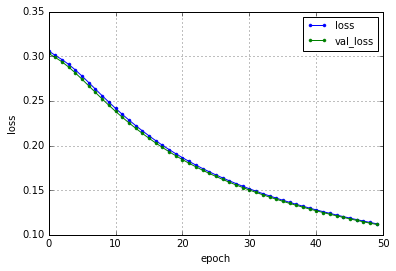

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.7417 - val_loss: 0.7243
Epoch 2/50
1s - loss: 0.7041 - val_loss: 0.6834
Epoch 3/50
1s - loss: 0.6631 - val_loss: 0.6429
Epoch 4/50
1s - loss: 0.6237 - val_loss: 0.6048
Epoch 5/50
1s - loss: 0.5869 - val_loss: 0.5692
Epoch 6/50
1s - loss: 0.5525 - val_loss: 0.5361
Epoch 7/50
1s - loss: 0.5206 - val_loss: 0.5053
Epoch 8/50
1s - loss: 0.4909 - val_loss: 0.4767
Epoch 9/50
1s - loss: 0.4633 - val_loss: 0.4501
Epoch 10/50
1s - loss: 0.4377 - val_loss: 0.4255
Epoch 11/50
1s - loss: 0.4140 - val_loss: 0.4027
Epoch 12/50
1s - loss: 0.3920 - val_loss: 0.3815
Epoch 13/50
1s - loss: 0.3715 - val_loss: 0.3618
Epoch 14/50
1s - loss: 0.3526 - val_loss: 0.3435
Epoch 15/50
1s - loss: 0.3350 - val_loss: 0.3265
Epoch 16/50
1s - loss: 0.3186 - val_loss: 0.3107
Epoch 17/50
1s - loss: 0.3033 - val_loss: 0.2960
Epoch 18/50
1s - loss: 0.2891 - val_loss: 0.2823
Epoch 19/50
1s - loss: 0.2758 - val_loss: 0.2695
Epoch 20/50
1s

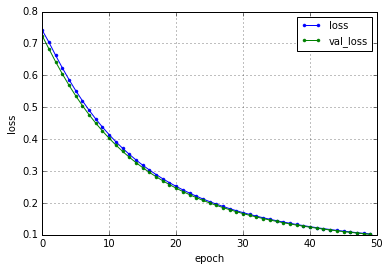

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0833 - val_loss: 0.0829
Epoch 2/50
1s - loss: 0.0826 - val_loss: 0.0824
Epoch 3/50
1s - loss: 0.0822 - val_loss: 0.0821
Epoch 4/50
1s - loss: 0.0820 - val_loss: 0.0818
Epoch 5/50
1s - loss: 0.0817 - val_loss: 0.0816
Epoch 6/50
1s - loss: 0.0815 - val_loss: 0.0814
Epoch 7/50
1s - loss: 0.0813 - val_loss: 0.0812
Epoch 8/50
1s - loss: 0.0811 - val_loss: 0.0810
Epoch 9/50
1s - loss: 0.0808 - val_loss: 0.0807
Epoch 10/50
1s - loss: 0.0806 - val_loss: 0.0805
Epoch 11/50
1s - loss: 0.0803 - val_loss: 0.0802
Epoch 12/50
1s - loss: 0.0801 - val_loss: 0.0799
Epoch 13/50
1s - loss: 0.0798 - val_loss: 0.0796
Epoch 14/50
1s - loss: 0.0794 - val_loss: 0.0793
Epoch 15/50
1s - loss: 0.0791 - val_loss: 0.0789
Epoch 16/50
1s - loss: 0.0787 - val_loss: 0.0786
Epoch 17/50
1s - loss: 0.0784 - val_loss: 0.0782
Epoch 18/50
1s - loss: 0.0780 - val_loss: 0.0778
Epoch 19/50
1s - loss: 0.0776 - val_loss: 0.0773
Epoch 20/50
1s

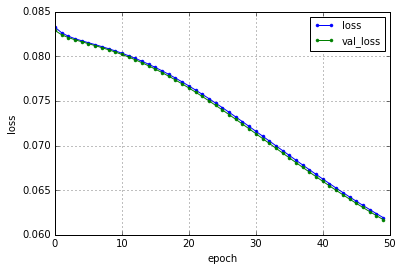

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.1433 - val_loss: 0.0740
Epoch 2/50
1s - loss: 0.0610 - val_loss: 0.0522
Epoch 3/50
1s - loss: 0.0489 - val_loss: 0.0456
Epoch 4/50
1s - loss: 0.0436 - val_loss: 0.0419
Epoch 5/50
1s - loss: 0.0409 - val_loss: 0.0382
Epoch 6/50
1s - loss: 0.0389 - val_loss: 0.0380
Epoch 7/50
1s - loss: 0.0375 - val_loss: 0.0355
Epoch 8/50
1s - loss: 0.0356 - val_loss: 0.0374
Epoch 9/50
1s - loss: 0.0352 - val_loss: 0.0387
Epoch 10/50
1s - loss: 0.0339 - val_loss: 0.0395
Epoch 11/50
1s - loss: 0.0329 - val_loss: 0.0322
Epoch 12/50
1s - loss: 0.0331 - val_loss: 0.0465
Epoch 13/50
1s - loss: 0.0317 - val_loss: 0.0297
Epoch 14/50
1s - loss: 0.0316 - val_loss: 0.0285
Epoch 15/50
1s - loss: 0.0306 - val_loss: 0.0282
Epoch 16/50
1s - loss: 0.0306 - val_loss: 0.0287
Epoch 17/50
1s - loss: 0.0296 - val_loss: 0.0310
Epoch 18/50
1s - loss: 0.0299 - val_loss: 0.0270
Epoch 19/50
1s - loss: 0.0288 - val_loss: 0.0261
Epoch 20/50
1s

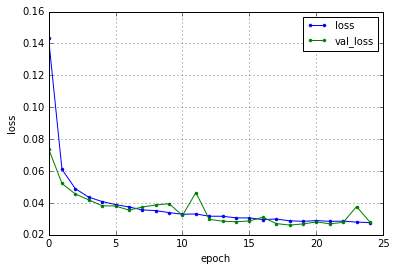

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.2338 - val_loss: 0.0906
Epoch 2/50
1s - loss: 0.0637 - val_loss: 0.0554
Epoch 3/50
1s - loss: 0.0566 - val_loss: 0.0526
Epoch 4/50
1s - loss: 0.0548 - val_loss: 0.0503
Epoch 5/50
1s - loss: 0.0533 - val_loss: 0.0482
Epoch 6/50
1s - loss: 0.0512 - val_loss: 0.0475
Epoch 7/50
1s - loss: 0.0510 - val_loss: 0.0593
Epoch 8/50
1s - loss: 0.0485 - val_loss: 0.0491
Epoch 9/50
1s - loss: 0.0491 - val_loss: 0.0441
Epoch 10/50
1s - loss: 0.0484 - val_loss: 0.0591
Epoch 11/50
1s - loss: 0.0477 - val_loss: 0.0430
Epoch 12/50
1s - loss: 0.0465 - val_loss: 0.0443
Epoch 13/50
1s - loss: 0.0463 - val_loss: 0.0644
Epoch 14/50
1s - loss: 0.0465 - val_loss: 0.0422
Epoch 15/50
1s - loss: 0.0452 - val_loss: 0.0410
Epoch 16/50
1s - loss: 0.0448 - val_loss: 0.0437
Epoch 17/50
1s - loss: 0.0442 - val_loss: 0.0398
Epoch 18/50
1s - loss: 0.0438 - val_loss: 0.0513
Epoch 19/50
1s - loss: 0.0430 - val_loss: 0.0435
Epoch 20/50
1s

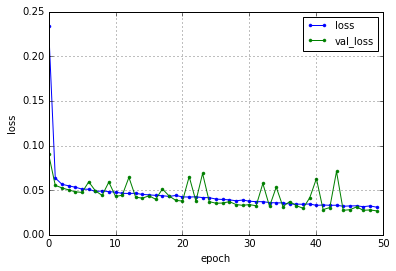

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0640 - val_loss: 0.0490
Epoch 2/50
1s - loss: 0.0441 - val_loss: 0.0402
Epoch 3/50
1s - loss: 0.0372 - val_loss: 0.0344
Epoch 4/50
1s - loss: 0.0323 - val_loss: 0.0303
Epoch 5/50
1s - loss: 0.0287 - val_loss: 0.0271
Epoch 6/50
1s - loss: 0.0259 - val_loss: 0.0252
Epoch 7/50
1s - loss: 0.0239 - val_loss: 0.0230
Epoch 8/50
1s - loss: 0.0224 - val_loss: 0.0217
Epoch 9/50
1s - loss: 0.0211 - val_loss: 0.0205
Epoch 10/50
1s - loss: 0.0202 - val_loss: 0.0197
Epoch 11/50
1s - loss: 0.0194 - val_loss: 0.0190
Epoch 12/50
1s - loss: 0.0187 - val_loss: 0.0183
Epoch 13/50
1s - loss: 0.0182 - val_loss: 0.0177
Epoch 14/50
1s - loss: 0.0176 - val_loss: 0.0171
Epoch 15/50
1s - loss: 0.0171 - val_loss: 0.0167
Epoch 16/50
1s - loss: 0.0166 - val_loss: 0.0161
Epoch 17/50
1s - loss: 0.0164 - val_loss: 0.0159
Epoch 18/50
1s - loss: 0.0159 - val_loss: 0.0157
Epoch 19/50
1s - loss: 0.0156 - val_loss: 0.0150
Epoch 20/50
1s

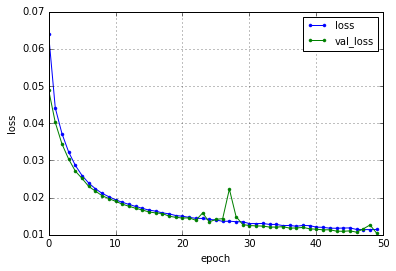

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0683 - val_loss: 0.0374
Epoch 2/50
1s - loss: 0.0337 - val_loss: 0.0297
Epoch 3/50
1s - loss: 0.0282 - val_loss: 0.0275
Epoch 4/50
1s - loss: 0.0248 - val_loss: 0.0229
Epoch 5/50
1s - loss: 0.0225 - val_loss: 0.0214
Epoch 6/50
1s - loss: 0.0202 - val_loss: 0.0193
Epoch 7/50
1s - loss: 0.0185 - val_loss: 0.0170
Epoch 8/50
1s - loss: 0.0172 - val_loss: 0.0180
Epoch 9/50
1s - loss: 0.0161 - val_loss: 0.0151
Epoch 10/50
1s - loss: 0.0152 - val_loss: 0.0167
Epoch 11/50
1s - loss: 0.0147 - val_loss: 0.0135
Epoch 12/50
1s - loss: 0.0139 - val_loss: 0.0132
Epoch 13/50
1s - loss: 0.0136 - val_loss: 0.0132
Epoch 14/50
1s - loss: 0.0136 - val_loss: 0.0161
Epoch 15/50
1s - loss: 0.0133 - val_loss: 0.0133
Epoch 16/50
1s - loss: 0.0133 - val_loss: 0.0136
Epoch 17/50
1s - loss: 0.0132 - val_loss: 0.0126
Epoch 18/50
1s - loss: 0.0130 - val_loss: 0.0122
Epoch 19/50
1s - loss: 0.0130 - val_loss: 0.0119
Epoch 20/50
1s

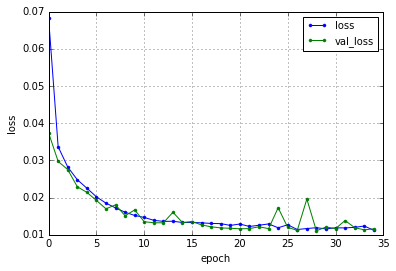

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.1138 - val_loss: 0.0561
Epoch 2/50
1s - loss: 0.0491 - val_loss: 0.0452
Epoch 3/50
1s - loss: 0.0428 - val_loss: 0.0403
Epoch 4/50
1s - loss: 0.0390 - val_loss: 0.0371
Epoch 5/50
1s - loss: 0.0336 - val_loss: 0.0332
Epoch 6/50
1s - loss: 0.0280 - val_loss: 0.0243
Epoch 7/50
1s - loss: 0.0250 - val_loss: 0.0228
Epoch 8/50
1s - loss: 0.0225 - val_loss: 0.0196
Epoch 9/50
1s - loss: 0.0201 - val_loss: 0.0186
Epoch 10/50
1s - loss: 0.0189 - val_loss: 0.0248
Epoch 11/50
1s - loss: 0.0181 - val_loss: 0.0164
Epoch 12/50
1s - loss: 0.0152 - val_loss: 0.0138
Epoch 13/50
1s - loss: 0.0151 - val_loss: 0.0130
Epoch 14/50
1s - loss: 0.0145 - val_loss: 0.0127
Epoch 15/50
1s - loss: 0.0139 - val_loss: 0.0179
Epoch 16/50
1s - loss: 0.0138 - val_loss: 0.0152
Epoch 17/50
1s - loss: 0.0130 - val_loss: 0.0123
Epoch 18/50
1s - loss: 0.0128 - val_loss: 0.0110
Epoch 19/50
1s - loss: 0.0112 - val_loss: 0.0137
Epoch 20/50
1s

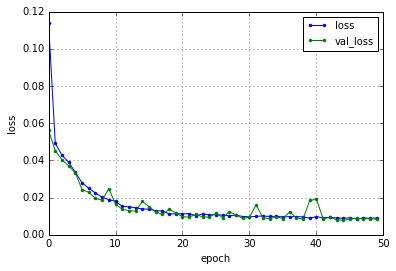

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0294 - val_loss: 0.0182
Epoch 2/50
1s - loss: 0.0155 - val_loss: 0.0130
Epoch 3/50
1s - loss: 0.0123 - val_loss: 0.0112
Epoch 4/50
1s - loss: 0.0103 - val_loss: 0.0093
Epoch 5/50
1s - loss: 0.0093 - val_loss: 0.0096
Epoch 6/50
1s - loss: 0.0085 - val_loss: 0.0077
Epoch 7/50
1s - loss: 0.0079 - val_loss: 0.0072
Epoch 8/50
1s - loss: 0.0074 - val_loss: 0.0071
Epoch 9/50
1s - loss: 0.0070 - val_loss: 0.0065
Epoch 10/50
1s - loss: 0.0069 - val_loss: 0.0065
Epoch 11/50
1s - loss: 0.0070 - val_loss: 0.0067
Epoch 12/50
1s - loss: 0.0066 - val_loss: 0.0061
Epoch 13/50
1s - loss: 0.0065 - val_loss: 0.0062
Epoch 14/50
1s - loss: 0.0064 - val_loss: 0.0081
Epoch 15/50
1s - loss: 0.0071 - val_loss: 0.0060
Epoch 16/50
1s - loss: 0.0063 - val_loss: 0.0064
Epoch 17/50
1s - loss: 0.0064 - val_loss: 0.0073
Epoch 18/50
1s - loss: 0.0062 - val_loss: 0.0063
Epoch 19/50
1s - loss: 0.0063 - val_loss: 0.0063
Epoch 20/50
1s

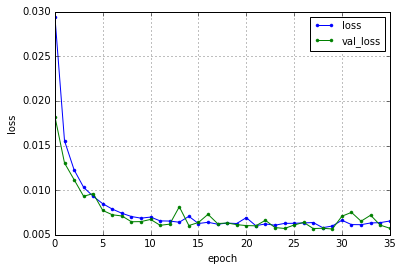

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0713 - val_loss: 0.0352
Epoch 2/50
1s - loss: 0.0334 - val_loss: 0.0267
Epoch 3/50
1s - loss: 0.0279 - val_loss: 0.0313
Epoch 4/50
1s - loss: 0.0241 - val_loss: 0.0219
Epoch 5/50
1s - loss: 0.0223 - val_loss: 0.0188
Epoch 6/50
1s - loss: 0.0199 - val_loss: 0.0183
Epoch 7/50
1s - loss: 0.0198 - val_loss: 0.0184
Epoch 8/50
1s - loss: 0.0174 - val_loss: 0.0166
Epoch 9/50
1s - loss: 0.0182 - val_loss: 0.0208
Epoch 10/50
1s - loss: 0.0166 - val_loss: 0.0147
Epoch 11/50
1s - loss: 0.0160 - val_loss: 0.0141
Epoch 12/50
1s - loss: 0.0155 - val_loss: 0.0138
Epoch 13/50
1s - loss: 0.0153 - val_loss: 0.0135
Epoch 14/50
1s - loss: 0.0158 - val_loss: 0.0140
Epoch 15/50
1s - loss: 0.0154 - val_loss: 0.0163
Epoch 16/50
1s - loss: 0.0142 - val_loss: 0.0204
Epoch 17/50
1s - loss: 0.0153 - val_loss: 0.0139
Epoch 18/50
1s - loss: 0.0148 - val_loss: 0.0148
Epoch 19/50
1s - loss: 0.0147 - val_loss: 0.0159


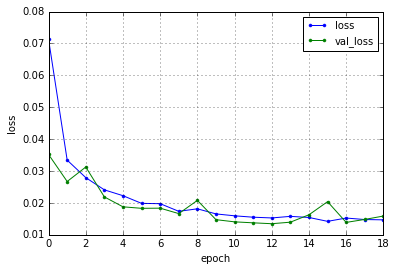

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.1376 - val_loss: 0.0573
Epoch 2/50
1s - loss: 0.0544 - val_loss: 0.0516
Epoch 3/50
1s - loss: 0.0450 - val_loss: 0.0478
Epoch 4/50
1s - loss: 0.0404 - val_loss: 0.0334
Epoch 5/50
1s - loss: 0.0335 - val_loss: 0.0354
Epoch 6/50
1s - loss: 0.0331 - val_loss: 0.0309
Epoch 7/50
1s - loss: 0.0325 - val_loss: 0.0299
Epoch 8/50
1s - loss: 0.0263 - val_loss: 0.0274
Epoch 9/50
1s - loss: 0.0266 - val_loss: 0.0249
Epoch 10/50
1s - loss: 0.0236 - val_loss: 0.0234
Epoch 11/50
1s - loss: 0.0231 - val_loss: 0.0197
Epoch 12/50
1s - loss: 0.0221 - val_loss: 0.0194
Epoch 13/50
1s - loss: 0.0208 - val_loss: 0.0176
Epoch 14/50
1s - loss: 0.0202 - val_loss: 0.0171
Epoch 15/50
1s - loss: 0.0185 - val_loss: 0.0179
Epoch 16/50
1s - loss: 0.0170 - val_loss: 0.0250
Epoch 17/50
1s - loss: 0.0181 - val_loss: 0.0163
Epoch 18/50
1s - loss: 0.0166 - val_loss: 0.0149
Epoch 19/50
1s - loss: 0.0168 - val_loss: 0.0179
Epoch 20/50
1s

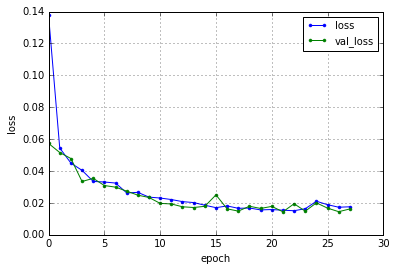

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0277 - val_loss: 0.0153
Epoch 2/50
1s - loss: 0.0146 - val_loss: 0.0133
Epoch 3/50
1s - loss: 0.0118 - val_loss: 0.0098
Epoch 4/50
1s - loss: 0.0112 - val_loss: 0.0097
Epoch 5/50
1s - loss: 0.0099 - val_loss: 0.0084
Epoch 6/50
1s - loss: 0.0104 - val_loss: 0.0178
Epoch 7/50
1s - loss: 0.0094 - val_loss: 0.0079
Epoch 8/50
1s - loss: 0.0082 - val_loss: 0.0071
Epoch 9/50
1s - loss: 0.0086 - val_loss: 0.0071
Epoch 10/50
1s - loss: 0.0078 - val_loss: 0.0071
Epoch 11/50
1s - loss: 0.0082 - val_loss: 0.0073
Epoch 12/50
1s - loss: 0.0090 - val_loss: 0.0073
Epoch 13/50
1s - loss: 0.0079 - val_loss: 0.0070
Epoch 14/50
1s - loss: 0.0078 - val_loss: 0.0067
Epoch 15/50
1s - loss: 0.0081 - val_loss: 0.0077
Epoch 16/50
1s - loss: 0.0087 - val_loss: 0.0079
Epoch 17/50
1s - loss: 0.0077 - val_loss: 0.0082
Epoch 18/50
1s - loss: 0.0073 - val_loss: 0.0077
Epoch 19/50
1s - loss: 0.0074 - val_loss: 0.0068
Epoch 20/50
1s

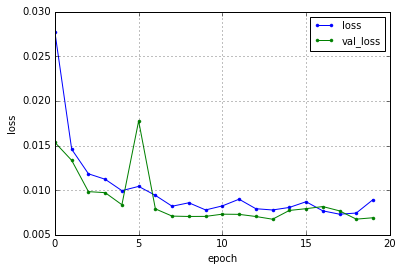

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0741 - val_loss: 0.0477
Epoch 2/50
1s - loss: 0.0407 - val_loss: 0.0328
Epoch 3/50
1s - loss: 0.0338 - val_loss: 0.0407
Epoch 4/50
1s - loss: 0.0312 - val_loss: 0.0276
Epoch 5/50
1s - loss: 0.0284 - val_loss: 0.0247
Epoch 6/50
1s - loss: 0.0261 - val_loss: 0.0257
Epoch 7/50
1s - loss: 0.0252 - val_loss: 0.0305
Epoch 8/50
1s - loss: 0.0242 - val_loss: 0.0243
Epoch 9/50
1s - loss: 0.0232 - val_loss: 0.0227
Epoch 10/50
1s - loss: 0.0225 - val_loss: 0.0206
Epoch 11/50
1s - loss: 0.0219 - val_loss: 0.0211
Epoch 12/50
1s - loss: 0.0210 - val_loss: 0.0227
Epoch 13/50
1s - loss: 0.0203 - val_loss: 0.0194
Epoch 14/50
1s - loss: 0.0197 - val_loss: 0.0182
Epoch 15/50
1s - loss: 0.0190 - val_loss: 0.0214
Epoch 16/50
1s - loss: 0.0190 - val_loss: 0.0199
Epoch 17/50
1s - loss: 0.0184 - val_loss: 0.0183
Epoch 18/50
1s - loss: 0.0184 - val_loss: 0.0167
Epoch 19/50
1s - loss: 0.0182 - val_loss: 0.0172
Epoch 20/50
1s

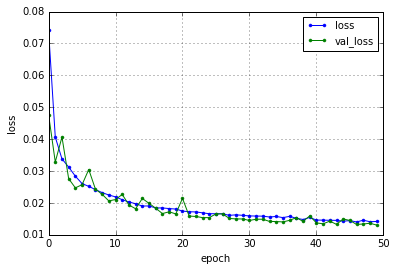

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.1259 - val_loss: 0.0780
Epoch 2/50
1s - loss: 0.0735 - val_loss: 0.0634
Epoch 3/50
1s - loss: 0.0615 - val_loss: 0.0537
Epoch 4/50
1s - loss: 0.0525 - val_loss: 0.0481
Epoch 5/50
1s - loss: 0.0496 - val_loss: 0.0451
Epoch 6/50
1s - loss: 0.0461 - val_loss: 0.0432
Epoch 7/50
1s - loss: 0.0450 - val_loss: 0.0458
Epoch 8/50
1s - loss: 0.0429 - val_loss: 0.0582
Epoch 9/50
1s - loss: 0.0410 - val_loss: 0.0375
Epoch 10/50
1s - loss: 0.0398 - val_loss: 0.0365
Epoch 11/50
1s - loss: 0.0375 - val_loss: 0.0401
Epoch 12/50
1s - loss: 0.0374 - val_loss: 0.0336
Epoch 13/50
1s - loss: 0.0360 - val_loss: 0.0326
Epoch 14/50
1s - loss: 0.0345 - val_loss: 0.0379
Epoch 15/50
1s - loss: 0.0334 - val_loss: 0.0296
Epoch 16/50
1s - loss: 0.0322 - val_loss: 0.0287
Epoch 17/50
1s - loss: 0.0308 - val_loss: 0.0303
Epoch 18/50
1s - loss: 0.0298 - val_loss: 0.0346
Epoch 19/50
1s - loss: 0.0290 - val_loss: 0.0261
Epoch 20/50
1s

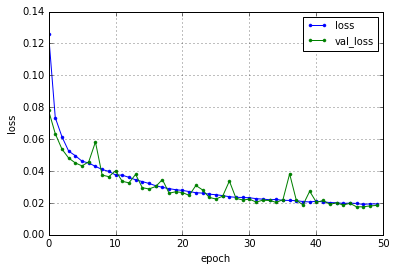

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0279 - val_loss: 0.0280
Epoch 2/50
1s - loss: 0.0170 - val_loss: 0.0155
Epoch 3/50
1s - loss: 0.0146 - val_loss: 0.0122
Epoch 4/50
1s - loss: 0.0123 - val_loss: 0.0107
Epoch 5/50
1s - loss: 0.0115 - val_loss: 0.0105
Epoch 6/50
1s - loss: 0.0108 - val_loss: 0.0093
Epoch 7/50
1s - loss: 0.0100 - val_loss: 0.0121
Epoch 8/50
1s - loss: 0.0094 - val_loss: 0.0086
Epoch 9/50
1s - loss: 0.0097 - val_loss: 0.0085
Epoch 10/50
1s - loss: 0.0087 - val_loss: 0.0103
Epoch 11/50
1s - loss: 0.0087 - val_loss: 0.0081
Epoch 12/50
1s - loss: 0.0086 - val_loss: 0.0089
Epoch 13/50
1s - loss: 0.0084 - val_loss: 0.0074
Epoch 14/50
1s - loss: 0.0079 - val_loss: 0.0074
Epoch 15/50
1s - loss: 0.0080 - val_loss: 0.0071
Epoch 16/50
1s - loss: 0.0078 - val_loss: 0.0072
Epoch 17/50
1s - loss: 0.0076 - val_loss: 0.0094
Epoch 18/50
1s - loss: 0.0075 - val_loss: 0.0088
Epoch 19/50
1s - loss: 0.0076 - val_loss: 0.0072
Epoch 20/50
1s

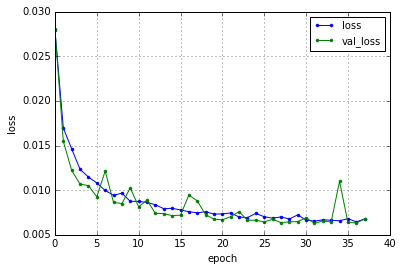

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0749 - val_loss: 0.0435
Epoch 2/50
1s - loss: 0.0455 - val_loss: 0.0440
Epoch 3/50
1s - loss: 0.0414 - val_loss: 0.0446
Epoch 4/50
1s - loss: 0.0401 - val_loss: 0.0427
Epoch 5/50
1s - loss: 0.0386 - val_loss: 0.0338
Epoch 6/50
1s - loss: 0.0374 - val_loss: 0.0309
Epoch 7/50
1s - loss: 0.0365 - val_loss: 0.0262
Epoch 8/50
1s - loss: 0.0351 - val_loss: 0.0352
Epoch 9/50
1s - loss: 0.0347 - val_loss: 0.0362
Epoch 10/50
1s - loss: 0.0348 - val_loss: 0.0254
Epoch 11/50
1s - loss: 0.0337 - val_loss: 0.0284
Epoch 12/50
1s - loss: 0.0331 - val_loss: 0.0509
Epoch 13/50
1s - loss: 0.0326 - val_loss: 0.0250
Epoch 14/50
1s - loss: 0.0323 - val_loss: 0.0276
Epoch 15/50
1s - loss: 0.0325 - val_loss: 0.0272
Epoch 16/50
1s - loss: 0.0317 - val_loss: 0.0272
Epoch 17/50
1s - loss: 0.0310 - val_loss: 0.0231
Epoch 18/50
1s - loss: 0.0313 - val_loss: 0.0291
Epoch 19/50
1s - loss: 0.0311 - val_loss: 0.0261
Epoch 20/50
1s

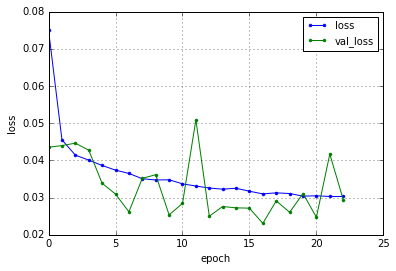

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.1362 - val_loss: 0.0719
Epoch 2/50
1s - loss: 0.0736 - val_loss: 0.0552
Epoch 3/50
1s - loss: 0.0677 - val_loss: 0.0611
Epoch 4/50
1s - loss: 0.0615 - val_loss: 0.0507
Epoch 5/50
1s - loss: 0.0581 - val_loss: 0.0432
Epoch 6/50
1s - loss: 0.0574 - val_loss: 0.0474
Epoch 7/50
1s - loss: 0.0540 - val_loss: 0.0479
Epoch 8/50
1s - loss: 0.0513 - val_loss: 0.0533
Epoch 9/50
1s - loss: 0.0501 - val_loss: 0.0498
Epoch 10/50
1s - loss: 0.0488 - val_loss: 0.0479
Epoch 11/50
1s - loss: 0.0473 - val_loss: 0.0381
Epoch 12/50
1s - loss: 0.0464 - val_loss: 0.0444
Epoch 13/50
1s - loss: 0.0458 - val_loss: 0.0569
Epoch 14/50
1s - loss: 0.0447 - val_loss: 0.0390
Epoch 15/50
1s - loss: 0.0441 - val_loss: 0.0347
Epoch 16/50
1s - loss: 0.0430 - val_loss: 0.0494
Epoch 17/50
1s - loss: 0.0423 - val_loss: 0.0383
Epoch 18/50
1s - loss: 0.0417 - val_loss: 0.0348
Epoch 19/50
1s - loss: 0.0412 - val_loss: 0.0361
Epoch 20/50
1s

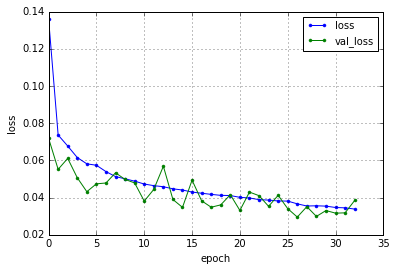

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0292 - val_loss: 0.0193
Epoch 2/50
1s - loss: 0.0184 - val_loss: 0.0250
Epoch 3/50
1s - loss: 0.0169 - val_loss: 0.0136
Epoch 4/50
1s - loss: 0.0155 - val_loss: 0.0436
Epoch 5/50
1s - loss: 0.0156 - val_loss: 0.0187
Epoch 6/50
1s - loss: 0.0152 - val_loss: 0.0137
Epoch 7/50
1s - loss: 0.0151 - val_loss: 0.0133
Epoch 8/50
1s - loss: 0.0151 - val_loss: 0.0126
Epoch 9/50
1s - loss: 0.0150 - val_loss: 0.0165
Epoch 10/50
1s - loss: 0.0147 - val_loss: 0.0107
Epoch 11/50
1s - loss: 0.0147 - val_loss: 0.0153
Epoch 12/50
1s - loss: 0.0146 - val_loss: 0.0247
Epoch 13/50
1s - loss: 0.0145 - val_loss: 0.0279
Epoch 14/50
1s - loss: 0.0146 - val_loss: 0.0120
Epoch 15/50
1s - loss: 0.0147 - val_loss: 0.0214
Epoch 16/50
1s - loss: 0.0146 - val_loss: 0.0105
Epoch 17/50
1s - loss: 0.0145 - val_loss: 0.0176
Epoch 18/50
1s - loss: 0.0145 - val_loss: 0.0282
Epoch 19/50
1s - loss: 0.0146 - val_loss: 0.0169
Epoch 20/50
1s

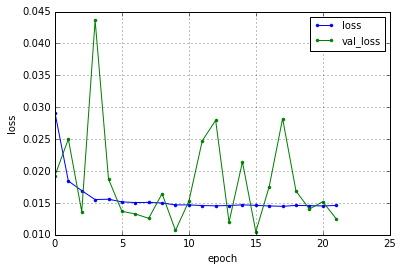

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0818 - val_loss: 0.0516
Epoch 2/50
1s - loss: 0.0599 - val_loss: 0.0610
Epoch 3/50
1s - loss: 0.0510 - val_loss: 0.0564
Epoch 4/50
1s - loss: 0.0495 - val_loss: 0.0571
Epoch 5/50
1s - loss: 0.0480 - val_loss: 0.0469
Epoch 6/50
1s - loss: 0.0443 - val_loss: 0.0474
Epoch 7/50
1s - loss: 0.0384 - val_loss: 0.0316
Epoch 8/50
1s - loss: 0.0470 - val_loss: 0.0489
Epoch 9/50
1s - loss: 0.0472 - val_loss: 0.0431
Epoch 10/50
1s - loss: 0.0428 - val_loss: 0.0361
Epoch 11/50
1s - loss: 0.0394 - val_loss: 0.0601
Epoch 12/50
1s - loss: 0.0501 - val_loss: 0.0474
Epoch 13/50
1s - loss: 0.0429 - val_loss: 0.0347


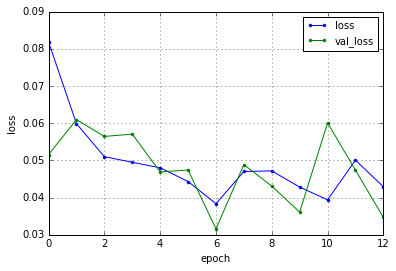

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.1526 - val_loss: 0.0892
Epoch 2/50
1s - loss: 0.0882 - val_loss: 0.0899
Epoch 3/50
1s - loss: 0.0880 - val_loss: 0.0867
Epoch 4/50
1s - loss: 0.0836 - val_loss: 0.0836
Epoch 5/50
1s - loss: 0.0769 - val_loss: 0.0763
Epoch 6/50
1s - loss: 0.0719 - val_loss: 0.0620
Epoch 7/50
1s - loss: 0.0671 - val_loss: 0.0657
Epoch 8/50
1s - loss: 0.0601 - val_loss: 0.0657
Epoch 9/50
1s - loss: 0.0593 - val_loss: 0.0756
Epoch 10/50
1s - loss: 0.0592 - val_loss: 0.0801
Epoch 11/50
1s - loss: 0.0578 - val_loss: 0.0650
Epoch 12/50
1s - loss: 0.0564 - val_loss: 0.0692


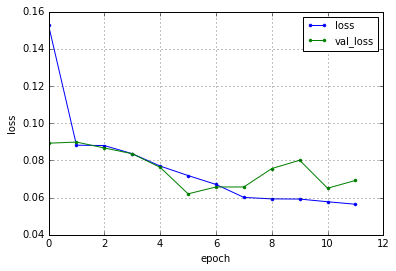

hiden node = 16
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0301 - val_loss: 0.0200
Epoch 2/50
1s - loss: 0.0214 - val_loss: 0.0197
Epoch 3/50
1s - loss: 0.0199 - val_loss: 0.0234
Epoch 4/50
1s - loss: 0.0209 - val_loss: 0.0200
Epoch 5/50
1s - loss: 0.0216 - val_loss: 0.0195
Epoch 6/50
1s - loss: 0.0211 - val_loss: 0.0225
Epoch 7/50
1s - loss: 0.0192 - val_loss: 0.0150
Epoch 8/50
1s - loss: 0.0208 - val_loss: 0.0198
Epoch 9/50
1s - loss: 0.0194 - val_loss: 0.0146
Epoch 10/50
1s - loss: 0.0183 - val_loss: 0.0178
Epoch 11/50
1s - loss: 0.0159 - val_loss: 0.0127
Epoch 12/50
1s - loss: 0.0164 - val_loss: 0.0150
Epoch 13/50
1s - loss: 0.0148 - val_loss: 0.0123
Epoch 14/50
1s - loss: 0.0156 - val_loss: 0.0130
Epoch 15/50
1s - loss: 0.0147 - val_loss: 0.0229
Epoch 16/50
1s - loss: 0.0140 - val_loss: 0.0135
Epoch 17/50
1s - loss: 0.0137 - val_loss: 0.0224
Epoch 18/50
1s - loss: 0.0165 - val_loss: 0.0137
Epoch 19/50
1s - loss: 0.0150 - val_loss: 0.0208


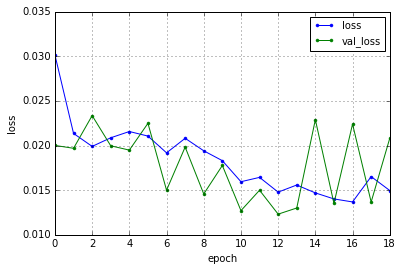

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =7833
SourceData's aborting data = 22
window shape is (7833, 4096, 3)
(7833, 4096, 3)
hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.3064 - val_loss: 0.3047
Epoch 2/50
2s - loss: 0.3034 - val_loss: 0.3019
Epoch 3/50
2s - loss: 0.3004 - val_loss: 0.2988
Epoch 4/50
2s - loss: 0.2971 - val_loss: 0.2954
Epoch 5/50
2s - loss: 0.2935 - val_loss: 0.2917
Epoch 6/50
2s - loss: 0.2898 - val_loss: 0.2879
Epoch 7/50
2s - loss: 0.2860 - val_loss: 0.2840
Epoch 8/50
2s - loss: 0.2821 - val_loss: 0.2801
Epoch 9/50
2s - loss: 0.2781 - val_loss: 0.2762
Epoch 10/50
2s - loss: 0.2742 - val_loss: 0.2723
Epoch 11/50
2s - loss: 0.2703 - val_loss: 0.2684
Epoch 12/50
2s - loss: 0.2665 - val_loss: 0.2646
Epoch 13/50
2s - loss: 0.2628 - val_loss: 0.2609
Epoch 14/50
2s - loss: 0.2591 - val_loss: 0.2573
Epoch 15/50
2s - loss: 0.2555 - val_loss: 0.2537
Epoch 16/50
2s - 

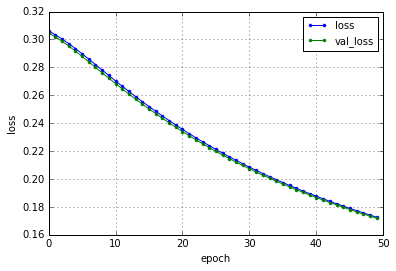

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.7482 - val_loss: 0.7415
Epoch 2/50
2s - loss: 0.7335 - val_loss: 0.7246
Epoch 3/50
2s - loss: 0.7148 - val_loss: 0.7045
Epoch 4/50
2s - loss: 0.6941 - val_loss: 0.6836
Epoch 5/50
2s - loss: 0.6734 - val_loss: 0.6632
Epoch 6/50
2s - loss: 0.6533 - val_loss: 0.6434
Epoch 7/50
2s - loss: 0.6338 - val_loss: 0.6242
Epoch 8/50
2s - loss: 0.6150 - val_loss: 0.6058
Epoch 9/50
2s - loss: 0.5969 - val_loss: 0.5880
Epoch 10/50
2s - loss: 0.5794 - val_loss: 0.5708
Epoch 11/50
2s - loss: 0.5626 - val_loss: 0.5543
Epoch 12/50
2s - loss: 0.5464 - val_loss: 0.5384
Epoch 13/50
2s - loss: 0.5308 - val_loss: 0.5231
Epoch 14/50
2s - loss: 0.5158 - val_loss: 0.5084
Epoch 15/50
2s - loss: 0.5013 - val_loss: 0.4942
Epoch 16/50
2s - loss: 0.4874 - val_loss: 0.4806
Epoch 17/50
2s - loss: 0.4740 - val_loss: 0.4674
Epoch 18/50
2s - loss: 0.4611 - val_loss: 0.4548
Epoch 19/50
2s - loss: 0.4487 - val_loss: 0.4426
Epoch 20/50
2s

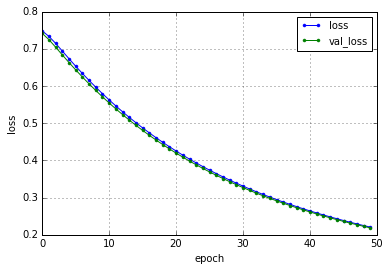

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0833 - val_loss: 0.0833
Epoch 2/50
2s - loss: 0.0832 - val_loss: 0.0831
Epoch 3/50
2s - loss: 0.0830 - val_loss: 0.0830
Epoch 4/50
2s - loss: 0.0829 - val_loss: 0.0829
Epoch 5/50
2s - loss: 0.0828 - val_loss: 0.0828
Epoch 6/50
2s - loss: 0.0827 - val_loss: 0.0827
Epoch 7/50
2s - loss: 0.0826 - val_loss: 0.0826
Epoch 8/50
2s - loss: 0.0826 - val_loss: 0.0825
Epoch 9/50
2s - loss: 0.0825 - val_loss: 0.0825
Epoch 10/50
2s - loss: 0.0824 - val_loss: 0.0824
Epoch 11/50
2s - loss: 0.0823 - val_loss: 0.0823
Epoch 12/50
2s - loss: 0.0823 - val_loss: 0.0822
Epoch 13/50
2s - loss: 0.0822 - val_loss: 0.0822
Epoch 14/50
2s - loss: 0.0821 - val_loss: 0.0821
Epoch 15/50
2s - loss: 0.0820 - val_loss: 0.0820
Epoch 16/50
2s - loss: 0.0820 - val_loss: 0.0819
Epoch 17/50
2s - loss: 0.0819 - val_loss: 0.0818
Epoch 18/50
2s - loss: 0.0818 - val_loss: 0.0817
Epoch 19/50
2s - loss: 0.0817 - val_loss: 0.0816
Epoch 20/50
2s

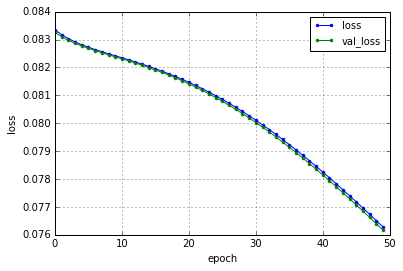

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.1899 - val_loss: 0.1241
Epoch 2/50
2s - loss: 0.1024 - val_loss: 0.0887
Epoch 3/50
2s - loss: 0.0802 - val_loss: 0.0726
Epoch 4/50
2s - loss: 0.0689 - val_loss: 0.0632
Epoch 5/50
2s - loss: 0.0619 - val_loss: 0.0589
Epoch 6/50
2s - loss: 0.0570 - val_loss: 0.0546
Epoch 7/50
2s - loss: 0.0538 - val_loss: 0.0524
Epoch 8/50
2s - loss: 0.0513 - val_loss: 0.0499
Epoch 9/50
2s - loss: 0.0497 - val_loss: 0.0470
Epoch 10/50
2s - loss: 0.0483 - val_loss: 0.0474
Epoch 11/50
2s - loss: 0.0469 - val_loss: 0.0441
Epoch 12/50
2s - loss: 0.0456 - val_loss: 0.0430
Epoch 13/50
2s - loss: 0.0445 - val_loss: 0.0422
Epoch 14/50
2s - loss: 0.0442 - val_loss: 0.0411
Epoch 15/50
2s - loss: 0.0433 - val_loss: 0.0404
Epoch 16/50
2s - loss: 0.0425 - val_loss: 0.0396
Epoch 17/50
2s - loss: 0.0416 - val_loss: 0.0395
Epoch 18/50
2s - loss: 0.0413 - val_loss: 0.0396
Epoch 19/50
2s - loss: 0.0407 - val_loss: 0.0392
Epoch 20/50
2s

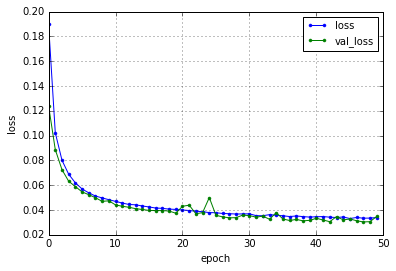

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.3094 - val_loss: 0.1217
Epoch 2/50
2s - loss: 0.0954 - val_loss: 0.0775
Epoch 3/50
2s - loss: 0.0762 - val_loss: 0.0708
Epoch 4/50
2s - loss: 0.0710 - val_loss: 0.0661
Epoch 5/50
2s - loss: 0.0680 - val_loss: 0.0625
Epoch 6/50
2s - loss: 0.0658 - val_loss: 0.0607
Epoch 7/50
2s - loss: 0.0641 - val_loss: 0.0674
Epoch 8/50
2s - loss: 0.0624 - val_loss: 0.0582
Epoch 9/50
2s - loss: 0.0613 - val_loss: 0.0654
Epoch 10/50
2s - loss: 0.0601 - val_loss: 0.0693
Epoch 11/50
2s - loss: 0.0586 - val_loss: 0.0720
Epoch 12/50
2s - loss: 0.0575 - val_loss: 0.0588
Epoch 13/50
2s - loss: 0.0574 - val_loss: 0.0622
Epoch 14/50
2s - loss: 0.0559 - val_loss: 0.0516
Epoch 15/50
2s - loss: 0.0552 - val_loss: 0.0701
Epoch 16/50
2s - loss: 0.0550 - val_loss: 0.0515
Epoch 17/50
2s - loss: 0.0540 - val_loss: 0.0509
Epoch 18/50
2s - loss: 0.0540 - val_loss: 0.0524
Epoch 19/50
2s - loss: 0.0534 - val_loss: 0.0531
Epoch 20/50
2s

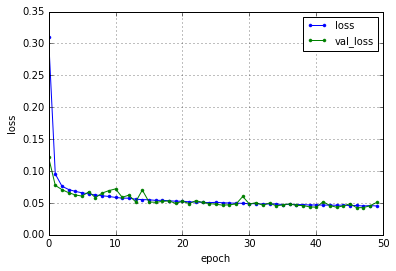

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0756 - val_loss: 0.0659
Epoch 2/50
2s - loss: 0.0606 - val_loss: 0.0565
Epoch 3/50
2s - loss: 0.0537 - val_loss: 0.0511
Epoch 4/50
2s - loss: 0.0490 - val_loss: 0.0470
Epoch 5/50
2s - loss: 0.0453 - val_loss: 0.0438
Epoch 6/50
2s - loss: 0.0424 - val_loss: 0.0411
Epoch 7/50
2s - loss: 0.0399 - val_loss: 0.0388
Epoch 8/50
2s - loss: 0.0377 - val_loss: 0.0367
Epoch 9/50
2s - loss: 0.0358 - val_loss: 0.0350
Epoch 10/50
2s - loss: 0.0341 - val_loss: 0.0333
Epoch 11/50
2s - loss: 0.0326 - val_loss: 0.0318
Epoch 12/50
2s - loss: 0.0312 - val_loss: 0.0305
Epoch 13/50
2s - loss: 0.0300 - val_loss: 0.0293
Epoch 14/50
2s - loss: 0.0289 - val_loss: 0.0284
Epoch 15/50
2s - loss: 0.0279 - val_loss: 0.0274
Epoch 16/50
2s - loss: 0.0271 - val_loss: 0.0266
Epoch 17/50
2s - loss: 0.0263 - val_loss: 0.0258
Epoch 18/50
2s - loss: 0.0256 - val_loss: 0.0252
Epoch 19/50
2s - loss: 0.0250 - val_loss: 0.0245
Epoch 20/50
2s

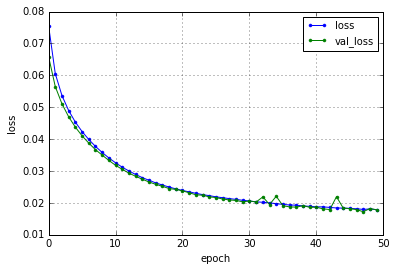

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0771 - val_loss: 0.0451
Epoch 2/50
2s - loss: 0.0405 - val_loss: 0.0358
Epoch 3/50
2s - loss: 0.0339 - val_loss: 0.0307
Epoch 4/50
2s - loss: 0.0309 - val_loss: 0.0285
Epoch 5/50
2s - loss: 0.0275 - val_loss: 0.0279
Epoch 6/50
2s - loss: 0.0265 - val_loss: 0.0264
Epoch 7/50
2s - loss: 0.0248 - val_loss: 0.0229
Epoch 8/50
2s - loss: 0.0238 - val_loss: 0.0225
Epoch 9/50
2s - loss: 0.0241 - val_loss: 0.0223
Epoch 10/50
2s - loss: 0.0219 - val_loss: 0.0219
Epoch 11/50
2s - loss: 0.0218 - val_loss: 0.0206
Epoch 12/50
2s - loss: 0.0223 - val_loss: 0.0201
Epoch 13/50
2s - loss: 0.0216 - val_loss: 0.0232
Epoch 14/50
2s - loss: 0.0216 - val_loss: 0.0219
Epoch 15/50
2s - loss: 0.0211 - val_loss: 0.0222
Epoch 16/50
2s - loss: 0.0214 - val_loss: 0.0208
Epoch 17/50
2s - loss: 0.0211 - val_loss: 0.0221
Epoch 18/50
2s - loss: 0.0217 - val_loss: 0.0234


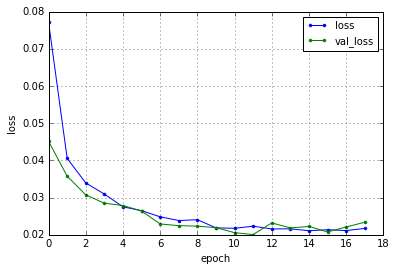

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.1268 - val_loss: 0.0643
Epoch 2/50
2s - loss: 0.0581 - val_loss: 0.0516
Epoch 3/50
2s - loss: 0.0504 - val_loss: 0.0468
Epoch 4/50
2s - loss: 0.0460 - val_loss: 0.0424
Epoch 5/50
2s - loss: 0.0430 - val_loss: 0.0413
Epoch 6/50
2s - loss: 0.0400 - val_loss: 0.0369
Epoch 7/50
2s - loss: 0.0348 - val_loss: 0.0322
Epoch 8/50
2s - loss: 0.0324 - val_loss: 0.0308
Epoch 9/50
2s - loss: 0.0295 - val_loss: 0.0265
Epoch 10/50
2s - loss: 0.0278 - val_loss: 0.0273
Epoch 11/50
2s - loss: 0.0267 - val_loss: 0.0259
Epoch 12/50
2s - loss: 0.0255 - val_loss: 0.0282
Epoch 13/50
2s - loss: 0.0249 - val_loss: 0.0383
Epoch 14/50
2s - loss: 0.0246 - val_loss: 0.0237
Epoch 15/50
2s - loss: 0.0237 - val_loss: 0.0213
Epoch 16/50
2s - loss: 0.0234 - val_loss: 0.0236
Epoch 17/50
2s - loss: 0.0229 - val_loss: 0.0245
Epoch 18/50
2s - loss: 0.0225 - val_loss: 0.0236
Epoch 19/50
2s - loss: 0.0231 - val_loss: 0.0245
Epoch 20/50
2s

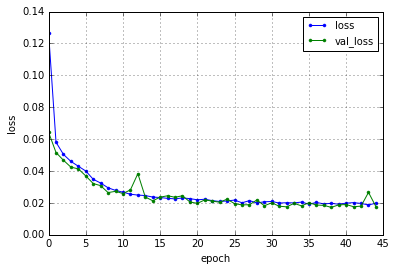

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0339 - val_loss: 0.0213
Epoch 2/50
2s - loss: 0.0190 - val_loss: 0.0165
Epoch 3/50
2s - loss: 0.0156 - val_loss: 0.0159
Epoch 4/50
2s - loss: 0.0144 - val_loss: 0.0130
Epoch 5/50
2s - loss: 0.0137 - val_loss: 0.0124
Epoch 6/50
2s - loss: 0.0128 - val_loss: 0.0117
Epoch 7/50
2s - loss: 0.0127 - val_loss: 0.0117
Epoch 8/50
2s - loss: 0.0121 - val_loss: 0.0120
Epoch 9/50
2s - loss: 0.0124 - val_loss: 0.0114
Epoch 10/50
2s - loss: 0.0119 - val_loss: 0.0135
Epoch 11/50
2s - loss: 0.0124 - val_loss: 0.0119
Epoch 12/50
2s - loss: 0.0121 - val_loss: 0.0117
Epoch 13/50
2s - loss: 0.0119 - val_loss: 0.0111
Epoch 14/50
2s - loss: 0.0118 - val_loss: 0.0122
Epoch 15/50
2s - loss: 0.0118 - val_loss: 0.0126
Epoch 16/50
2s - loss: 0.0114 - val_loss: 0.0111
Epoch 17/50
2s - loss: 0.0120 - val_loss: 0.0122
Epoch 18/50
2s - loss: 0.0116 - val_loss: 0.0109
Epoch 19/50
2s - loss: 0.0115 - val_loss: 0.0113
Epoch 20/50
2s

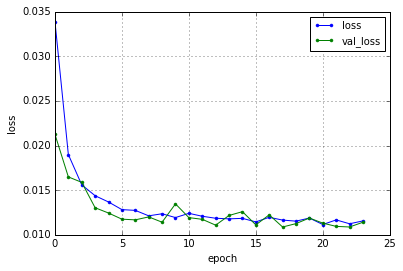

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0862 - val_loss: 0.0590
Epoch 2/50
2s - loss: 0.0493 - val_loss: 0.0578
Epoch 3/50
2s - loss: 0.0437 - val_loss: 0.0470
Epoch 4/50
2s - loss: 0.0416 - val_loss: 0.0434
Epoch 5/50
2s - loss: 0.0367 - val_loss: 0.0331
Epoch 6/50
2s - loss: 0.0347 - val_loss: 0.0374
Epoch 7/50
2s - loss: 0.0359 - val_loss: 0.0320
Epoch 8/50
2s - loss: 0.0358 - val_loss: 0.0367
Epoch 9/50
2s - loss: 0.0349 - val_loss: 0.0318
Epoch 10/50
2s - loss: 0.0324 - val_loss: 0.0289
Epoch 11/50
2s - loss: 0.0306 - val_loss: 0.0407
Epoch 12/50
2s - loss: 0.0314 - val_loss: 0.0286
Epoch 13/50
2s - loss: 0.0292 - val_loss: 0.0272
Epoch 14/50
2s - loss: 0.0285 - val_loss: 0.0256
Epoch 15/50
2s - loss: 0.0281 - val_loss: 0.0265
Epoch 16/50
2s - loss: 0.0286 - val_loss: 0.0311
Epoch 17/50
2s - loss: 0.0279 - val_loss: 0.0277
Epoch 18/50
2s - loss: 0.0302 - val_loss: 0.0329
Epoch 19/50
2s - loss: 0.0304 - val_loss: 0.0270
Epoch 20/50
2s

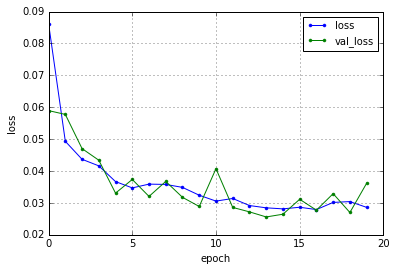

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.1618 - val_loss: 0.0891
Epoch 2/50
2s - loss: 0.0797 - val_loss: 0.0703
Epoch 3/50
2s - loss: 0.0685 - val_loss: 0.0634
Epoch 4/50
2s - loss: 0.0652 - val_loss: 0.0617
Epoch 5/50
2s - loss: 0.0616 - val_loss: 0.0605
Epoch 6/50
2s - loss: 0.0595 - val_loss: 0.0566
Epoch 7/50
2s - loss: 0.0582 - val_loss: 0.0564
Epoch 8/50
2s - loss: 0.0575 - val_loss: 0.0523
Epoch 9/50
2s - loss: 0.0569 - val_loss: 0.0527
Epoch 10/50
2s - loss: 0.0536 - val_loss: 0.0523
Epoch 11/50
2s - loss: 0.0541 - val_loss: 0.0514
Epoch 12/50
2s - loss: 0.0526 - val_loss: 0.0515
Epoch 13/50
2s - loss: 0.0538 - val_loss: 0.0531
Epoch 14/50
2s - loss: 0.0525 - val_loss: 0.0509
Epoch 15/50
2s - loss: 0.0533 - val_loss: 0.0504
Epoch 16/50
2s - loss: 0.0501 - val_loss: 0.0519
Epoch 17/50
2s - loss: 0.0513 - val_loss: 0.0461
Epoch 18/50
2s - loss: 0.0488 - val_loss: 0.0484
Epoch 19/50
2s - loss: 0.0487 - val_loss: 0.0446
Epoch 20/50
2s

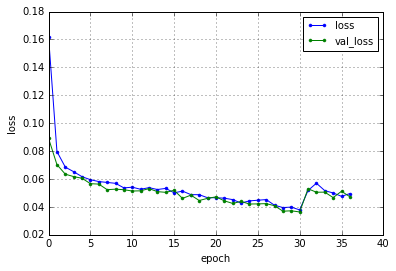

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0369 - val_loss: 0.0258
Epoch 2/50
2s - loss: 0.0248 - val_loss: 0.0229
Epoch 3/50
2s - loss: 0.0222 - val_loss: 0.0202
Epoch 4/50
2s - loss: 0.0209 - val_loss: 0.0185
Epoch 5/50
2s - loss: 0.0181 - val_loss: 0.0159
Epoch 6/50
2s - loss: 0.0208 - val_loss: 0.0222
Epoch 7/50
2s - loss: 0.0175 - val_loss: 0.0170
Epoch 8/50
2s - loss: 0.0166 - val_loss: 0.0188
Epoch 9/50
2s - loss: 0.0172 - val_loss: 0.0180
Epoch 10/50
2s - loss: 0.0175 - val_loss: 0.0155
Epoch 11/50
2s - loss: 0.0171 - val_loss: 0.0170
Epoch 12/50
2s - loss: 0.0186 - val_loss: 0.0150
Epoch 13/50
2s - loss: 0.0157 - val_loss: 0.0257
Epoch 14/50
2s - loss: 0.0191 - val_loss: 0.0164
Epoch 15/50
2s - loss: 0.0175 - val_loss: 0.0141
Epoch 16/50
2s - loss: 0.0170 - val_loss: 0.0153
Epoch 17/50
2s - loss: 0.0152 - val_loss: 0.0142
Epoch 18/50
2s - loss: 0.0167 - val_loss: 0.0155
Epoch 19/50
2s - loss: 0.0157 - val_loss: 0.0142
Epoch 20/50
2s

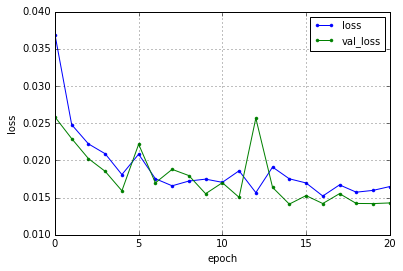

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0869 - val_loss: 0.0623
Epoch 2/50
2s - loss: 0.0579 - val_loss: 0.0645
Epoch 3/50
2s - loss: 0.0499 - val_loss: 0.0448
Epoch 4/50
2s - loss: 0.0456 - val_loss: 0.0419
Epoch 5/50
2s - loss: 0.0430 - val_loss: 0.0400
Epoch 6/50
2s - loss: 0.0401 - val_loss: 0.0399
Epoch 7/50
2s - loss: 0.0392 - val_loss: 0.0378
Epoch 8/50
2s - loss: 0.0371 - val_loss: 0.0359
Epoch 9/50
2s - loss: 0.0361 - val_loss: 0.0368
Epoch 10/50
2s - loss: 0.0357 - val_loss: 0.0340
Epoch 11/50
2s - loss: 0.0346 - val_loss: 0.0337
Epoch 12/50
2s - loss: 0.0330 - val_loss: 0.0304
Epoch 13/50
2s - loss: 0.0319 - val_loss: 0.0475
Epoch 14/50
2s - loss: 0.0313 - val_loss: 0.0358
Epoch 15/50
2s - loss: 0.0311 - val_loss: 0.0297
Epoch 16/50
2s - loss: 0.0302 - val_loss: 0.0294
Epoch 17/50
2s - loss: 0.0299 - val_loss: 0.0277
Epoch 18/50
2s - loss: 0.0293 - val_loss: 0.0269
Epoch 19/50
2s - loss: 0.0289 - val_loss: 0.0278
Epoch 20/50
2s

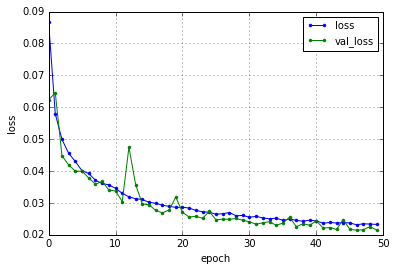

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.1317 - val_loss: 0.1168
Epoch 2/50
2s - loss: 0.0876 - val_loss: 0.0819
Epoch 3/50
2s - loss: 0.0779 - val_loss: 0.0755
Epoch 4/50
2s - loss: 0.0711 - val_loss: 0.0690
Epoch 5/50
2s - loss: 0.0659 - val_loss: 0.0705
Epoch 6/50
2s - loss: 0.0635 - val_loss: 0.0616
Epoch 7/50
2s - loss: 0.0613 - val_loss: 0.0599
Epoch 8/50
2s - loss: 0.0598 - val_loss: 0.0619
Epoch 9/50
2s - loss: 0.0581 - val_loss: 0.0565
Epoch 10/50
2s - loss: 0.0570 - val_loss: 0.0553
Epoch 11/50
2s - loss: 0.0558 - val_loss: 0.0538
Epoch 12/50
2s - loss: 0.0543 - val_loss: 0.0533
Epoch 13/50
2s - loss: 0.0526 - val_loss: 0.0518
Epoch 14/50
2s - loss: 0.0517 - val_loss: 0.0513
Epoch 15/50
2s - loss: 0.0508 - val_loss: 0.0518
Epoch 16/50
2s - loss: 0.0502 - val_loss: 0.0497
Epoch 17/50
2s - loss: 0.0496 - val_loss: 0.0485
Epoch 18/50
2s - loss: 0.0493 - val_loss: 0.0483
Epoch 19/50
2s - loss: 0.0488 - val_loss: 0.0474
Epoch 20/50
2s

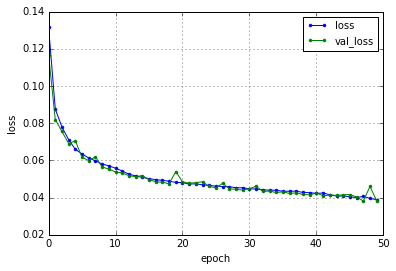

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0355 - val_loss: 0.0285
Epoch 2/50
2s - loss: 0.0265 - val_loss: 0.0241
Epoch 3/50
2s - loss: 0.0229 - val_loss: 0.0210
Epoch 4/50
2s - loss: 0.0205 - val_loss: 0.0181
Epoch 5/50
2s - loss: 0.0193 - val_loss: 0.0171
Epoch 6/50
2s - loss: 0.0181 - val_loss: 0.0163
Epoch 7/50
2s - loss: 0.0165 - val_loss: 0.0156
Epoch 8/50
2s - loss: 0.0165 - val_loss: 0.0143
Epoch 9/50
2s - loss: 0.0157 - val_loss: 0.0172
Epoch 10/50
2s - loss: 0.0150 - val_loss: 0.0145
Epoch 11/50
2s - loss: 0.0147 - val_loss: 0.0137
Epoch 12/50
2s - loss: 0.0144 - val_loss: 0.0131
Epoch 13/50
2s - loss: 0.0139 - val_loss: 0.0130
Epoch 14/50
2s - loss: 0.0141 - val_loss: 0.0129
Epoch 15/50
2s - loss: 0.0136 - val_loss: 0.0124
Epoch 16/50
2s - loss: 0.0134 - val_loss: 0.0125
Epoch 17/50
2s - loss: 0.0134 - val_loss: 0.0120
Epoch 18/50
2s - loss: 0.0127 - val_loss: 0.0179
Epoch 19/50
2s - loss: 0.0132 - val_loss: 0.0126
Epoch 20/50
2s

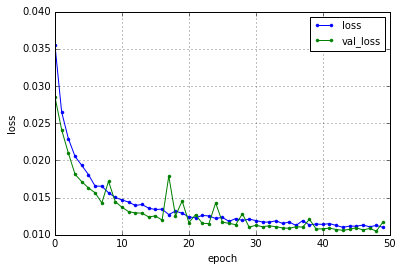

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0911 - val_loss: 0.0564
Epoch 2/50
2s - loss: 0.0617 - val_loss: 0.0718
Epoch 3/50
2s - loss: 0.0565 - val_loss: 0.0504
Epoch 4/50
2s - loss: 0.0556 - val_loss: 0.0687
Epoch 5/50
2s - loss: 0.0535 - val_loss: 0.0480
Epoch 6/50
2s - loss: 0.0510 - val_loss: 0.0430
Epoch 7/50
2s - loss: 0.0515 - val_loss: 0.0456
Epoch 8/50
2s - loss: 0.0495 - val_loss: 0.0439
Epoch 9/50
2s - loss: 0.0500 - val_loss: 0.0464
Epoch 10/50
2s - loss: 0.0480 - val_loss: 0.0440
Epoch 11/50
2s - loss: 0.0467 - val_loss: 0.0411
Epoch 12/50
2s - loss: 0.0458 - val_loss: 0.0437
Epoch 13/50
2s - loss: 0.0447 - val_loss: 0.0780
Epoch 14/50
2s - loss: 0.0443 - val_loss: 0.0514
Epoch 15/50
2s - loss: 0.0441 - val_loss: 0.0393
Epoch 16/50
2s - loss: 0.0438 - val_loss: 0.0402
Epoch 17/50
2s - loss: 0.0427 - val_loss: 0.0477
Epoch 18/50
2s - loss: 0.0425 - val_loss: 0.0453
Epoch 19/50
2s - loss: 0.0423 - val_loss: 0.0375
Epoch 20/50
2s

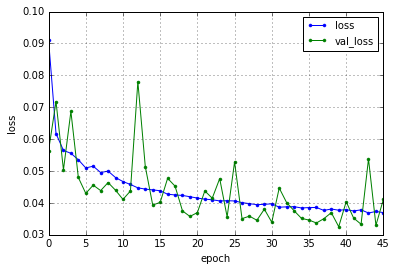

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.1640 - val_loss: 0.0932
Epoch 2/50
2s - loss: 0.0989 - val_loss: 0.0920
Epoch 3/50
2s - loss: 0.0850 - val_loss: 0.0746
Epoch 4/50
2s - loss: 0.0746 - val_loss: 0.0599
Epoch 5/50
2s - loss: 0.0656 - val_loss: 0.0607
Epoch 6/50
2s - loss: 0.0623 - val_loss: 0.0557
Epoch 7/50
2s - loss: 0.0608 - val_loss: 0.0551
Epoch 8/50
2s - loss: 0.0589 - val_loss: 0.0856
Epoch 9/50
2s - loss: 0.0581 - val_loss: 0.0515
Epoch 10/50
2s - loss: 0.0564 - val_loss: 0.0600
Epoch 11/50
2s - loss: 0.0554 - val_loss: 0.0512
Epoch 12/50
2s - loss: 0.0549 - val_loss: 0.0491
Epoch 13/50
2s - loss: 0.0537 - val_loss: 0.0533
Epoch 14/50
2s - loss: 0.0534 - val_loss: 0.0530
Epoch 15/50
2s - loss: 0.0527 - val_loss: 0.0467
Epoch 16/50
2s - loss: 0.0521 - val_loss: 0.0504
Epoch 17/50
2s - loss: 0.0516 - val_loss: 0.0517
Epoch 18/50
2s - loss: 0.0508 - val_loss: 0.0582
Epoch 19/50
2s - loss: 0.0507 - val_loss: 0.0530
Epoch 20/50
2s

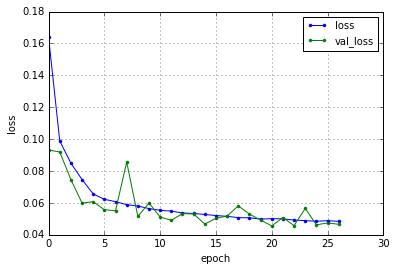

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0359 - val_loss: 0.0275
Epoch 2/50
2s - loss: 0.0260 - val_loss: 0.0301
Epoch 3/50
2s - loss: 0.0247 - val_loss: 0.0218
Epoch 4/50
2s - loss: 0.0241 - val_loss: 0.0244
Epoch 5/50
2s - loss: 0.0239 - val_loss: 0.0236
Epoch 6/50
2s - loss: 0.0236 - val_loss: 0.0267
Epoch 7/50
2s - loss: 0.0234 - val_loss: 0.0214
Epoch 8/50
2s - loss: 0.0234 - val_loss: 0.0219
Epoch 9/50
2s - loss: 0.0236 - val_loss: 0.0249
Epoch 10/50
2s - loss: 0.0232 - val_loss: 0.0235
Epoch 11/50
2s - loss: 0.0233 - val_loss: 0.0221
Epoch 12/50
2s - loss: 0.0233 - val_loss: 0.0193
Epoch 13/50
2s - loss: 0.0232 - val_loss: 0.0218
Epoch 14/50
2s - loss: 0.0229 - val_loss: 0.0254
Epoch 15/50
2s - loss: 0.0233 - val_loss: 0.0238
Epoch 16/50
2s - loss: 0.0229 - val_loss: 0.0332
Epoch 17/50
2s - loss: 0.0230 - val_loss: 0.0189
Epoch 18/50
2s - loss: 0.0231 - val_loss: 0.0251
Epoch 19/50
2s - loss: 0.0232 - val_loss: 0.0246
Epoch 20/50
2s

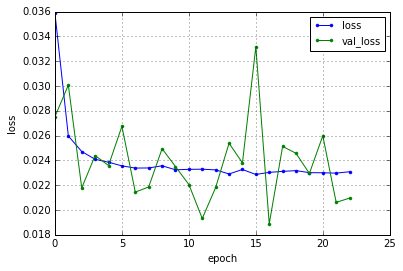

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.1062 - val_loss: 0.0705
Epoch 2/50
2s - loss: 0.0667 - val_loss: 0.0592
Epoch 3/50
2s - loss: 0.0652 - val_loss: 0.0560
Epoch 4/50
2s - loss: 0.0586 - val_loss: 0.0588
Epoch 5/50
2s - loss: 0.0584 - val_loss: 0.0551
Epoch 6/50
2s - loss: 0.0579 - val_loss: 0.0539
Epoch 7/50
2s - loss: 0.0556 - val_loss: 0.0537
Epoch 8/50
2s - loss: 0.0526 - val_loss: 0.0549
Epoch 9/50
2s - loss: 0.0511 - val_loss: 0.0489
Epoch 10/50
2s - loss: 0.0496 - val_loss: 0.0549
Epoch 11/50
2s - loss: 0.0478 - val_loss: 0.0450
Epoch 12/50
2s - loss: 0.0453 - val_loss: 0.0444
Epoch 13/50
2s - loss: 0.0441 - val_loss: 0.0432
Epoch 14/50
2s - loss: 0.0464 - val_loss: 0.0549
Epoch 15/50
2s - loss: 0.0465 - val_loss: 0.0461
Epoch 16/50
2s - loss: 0.0439 - val_loss: 0.0447
Epoch 17/50
2s - loss: 0.0418 - val_loss: 0.0382
Epoch 18/50
2s - loss: 0.0438 - val_loss: 0.0433
Epoch 19/50
2s - loss: 0.0430 - val_loss: 0.0401
Epoch 20/50
2s

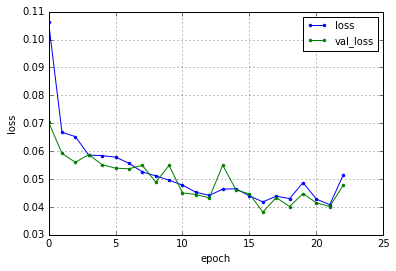

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.1560 - val_loss: 0.1011
Epoch 2/50
2s - loss: 0.1007 - val_loss: 0.0951
Epoch 3/50
2s - loss: 0.0985 - val_loss: 0.0957
Epoch 4/50
2s - loss: 0.0903 - val_loss: 0.0849
Epoch 5/50
2s - loss: 0.0841 - val_loss: 0.0772
Epoch 6/50
2s - loss: 0.0802 - val_loss: 0.0778
Epoch 7/50
2s - loss: 0.0761 - val_loss: 0.0771
Epoch 8/50
2s - loss: 0.0755 - val_loss: 0.0740
Epoch 9/50
2s - loss: 0.0695 - val_loss: 0.0650
Epoch 10/50
2s - loss: 0.0676 - val_loss: 0.0652
Epoch 11/50
2s - loss: 0.0676 - val_loss: 0.0655
Epoch 12/50
2s - loss: 0.0660 - val_loss: 0.0624
Epoch 13/50
2s - loss: 0.0644 - val_loss: 0.0617
Epoch 14/50
2s - loss: 0.0628 - val_loss: 0.0642
Epoch 15/50
2s - loss: 0.0647 - val_loss: 0.0613
Epoch 16/50
2s - loss: 0.0630 - val_loss: 0.0637
Epoch 17/50
2s - loss: 0.0629 - val_loss: 0.0590
Epoch 18/50
2s - loss: 0.0613 - val_loss: 0.0577
Epoch 19/50
2s - loss: 0.0615 - val_loss: 0.0618
Epoch 20/50
2s

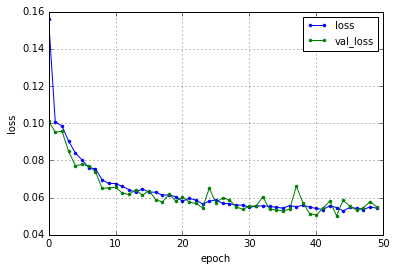

hiden node = 16
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.0380 - val_loss: 0.0306
Epoch 2/50
2s - loss: 0.0309 - val_loss: 0.0303
Epoch 3/50
2s - loss: 0.0307 - val_loss: 0.0303
Epoch 4/50
2s - loss: 0.0304 - val_loss: 0.0305
Epoch 5/50
2s - loss: 0.0299 - val_loss: 0.0308
Epoch 6/50
2s - loss: 0.0299 - val_loss: 0.0298
Epoch 7/50
2s - loss: 0.0295 - val_loss: 0.0295
Epoch 8/50
2s - loss: 0.0297 - val_loss: 0.0289
Epoch 9/50
2s - loss: 0.0290 - val_loss: 0.0288
Epoch 10/50
2s - loss: 0.0289 - val_loss: 0.0280
Epoch 11/50
2s - loss: 0.0293 - val_loss: 0.0278
Epoch 12/50
2s - loss: 0.0293 - val_loss: 0.0289
Epoch 13/50
2s - loss: 0.0294 - val_loss: 0.0282
Epoch 14/50
2s - loss: 0.0292 - val_loss: 0.0295
Epoch 15/50
2s - loss: 0.0294 - val_loss: 0.0295
Epoch 16/50
2s - loss: 0.0292 - val_loss: 0.0283
Epoch 17/50
2s - loss: 0.0285 - val_loss: 0.0298


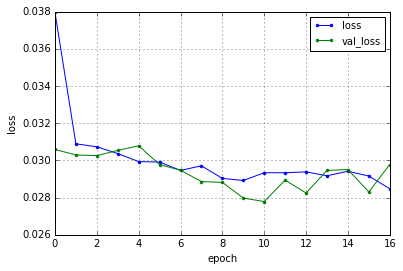

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    ArrayAxis = Axis.split(",")
    w=window.Window()
    for a in ArrayAxis:
        w.SetData(a,dic[a])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    print wind.shape
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

    # define SaveFileName
    for opt,optName in zip(optimizers,optimArray):
        for AxisName,WindowNum in zip(ArrayAxis,range(3)):
            print "hiden node = "+str(encoding_dim)
            CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+optName+'-'+AxisName
            SaveFileNameEncord=DataName+'_encoded'+CommonName
            SaveFileNameDecord=DataName+'_decoded'+CommonName
            SaveFileNameNet=DataName+'_net'+CommonName
            SaveFileNameTrain=DataName+'_train'+CommonName
            SaveFileNameTest=DataName+'_test'+CommonName
            SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

            window_test=wind[:,:,WindowNum]
            window_train=wind[:,:,WindowNum]
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
            shapeNum=wind.shape[1]


            # this is our input placeholder
            input_img = Input(shape=(shapeNum,))
            # "encoded" is the encoded representation of the input
            encoded = Dense(encoding_dim, activation='tanh',)(input_img)
            # "decoded" is the lossy reconstruction of the input
            decoded = Dense(shapeNum, activation='linear')(encoded)

            # this model maps an input to its reconstruction
            autoencoder = Model(input=input_img, output=decoded)

            # this model maps an input to its encoded representation
            encoder = Model(input=input_img, output=encoded)

            # create a placeholder for an encoded (32-dimensional) input
            encoded_input = Input(shape=(encoding_dim,))
            # retrieve the last layer of the autoencoder model
            decoder_layer = autoencoder.layers[-1]
            # create the decoder model
            decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

            #autoencoder.compile(optimizer='adam', loss='mse')
            autoencoder.compile(optimizer=opt(), loss='mse')
            plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

            early_stopping = EarlyStopping(monitor='val_loss', patience=5)
            hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
            time.sleep(0.1)
            encoded_imgs = encoder.predict(window_test)
            decoded_imgs = decoder.predict(encoded_imgs)

            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

            # save model and wights
            json_string = encoder.to_json()
            open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
            encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

            json_string = decoder.to_json()
            open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
            decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

            json_string = autoencoder.to_json()
            open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
            autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

            # plot loss
            loss = hist.history['loss']
            val_loss = hist.history['val_loss']

            nb_epoch = len(loss)
            plt.plot(range(nb_epoch), loss, marker='.', label='loss')
            plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
            plt.legend(loc='best', fontsize=10)
            plt.grid()
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.savefig(SaveFileNameGlaph)
            plt.show()

In [9]:
print window_test.shape

(7833, 4096)
